# Network Buffer for Eugene, Oregon

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [40]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [41]:
#conda activate geo_env


In [42]:
#python -m ipykernel install --user --name geo_env

In [43]:
import geopandas as gpd

In [44]:
import pandas as pd
from functools import reduce

In [45]:
import sys
'geopandas' in sys.modules

True

In [46]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [47]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

In [48]:
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [49]:
#buffer size in meter
#size=804.672 #in m, this input is also required for area conversation

In [50]:
# Import streetlight and strava
ss=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
ss=ss[ss["region"]=="Eugene"]
ss=ss[ss["year"]==2019]
ss=ss.drop_duplicates(subset='site_id')
ss.head()

site_id                                    site_name sensor_type  year  \
301  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
302  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
303  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
304  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
305  P005EUG                      Alder north of 18th Ave   permanent  2019   

     region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
301  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
302  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
303  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
304  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
305  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

      latitude   longitude             comment  
301  44.042515 -123.119532  corrected STL zone  
302  44.043919 -123.015499                 NaN  
303  44.044462 -123.052792                 NaN  
304  44.068013 -123.110896                 NaN  
305  44.040527 -123.080176                 NaN

In [51]:
# Get the count location 
c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Eugene"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
#c1=c1[c1["sensor_type"]=="permanent"]
c1.head(5)
# #print(c1.shape)

site_id  osm_id_sensor
240  P001EUG    123498508.0
241  P002EUG    618082822.0
242  P003EUG    106993273.0
243  P004EUG    107098076.0
244  P005EUG    680124010.0

In [52]:
# Import the non-fill buffer shape file
nf=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene-net-buff-60m-2018_2019.shp")
nf.head(5)

buff_dist  site_id                                           geometry
0       2.0  P001EUG  POLYGON ((1290139.427 264087.632, 1290133.816 ...
1       1.5  P001EUG  POLYGON ((1289968.890 264987.136, 1289966.400 ...
2       1.0  P001EUG  POLYGON ((1290206.802 265649.596, 1290201.673 ...
3      0.75  P001EUG  POLYGON ((1290138.532 266116.249, 1290137.941 ...
4       0.5  P001EUG  POLYGON ((1290882.770 267182.870, 1290883.614 ...

In [53]:
# merge by site_id
ss1=pd.merge(ss,c1, right_on='site_id', left_on='site_id',how='inner')
ss1.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

    latitude   longitude             comment  osm_id_sensor  
0  44.042515 -123.119532  corrected STL zone    123498508.0  
1  44.043919 -123.015499                 NaN    618082822.0  
2  44.044462 -123.052792                 NaN    106993273.0  
3  44.068013 -123.110896                 NaN    107098076.0  
4  44.040527 -123.080176                 NaN    680124010.0

In [54]:
nf1=pd.merge(ss1,nf, left_on='site_id', right_on='site_id',how='inner')
nf1 = gpd.GeoDataFrame(nf1)
nf1.head(5)

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
2             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
3             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor buff_dist  \
0 -123.119532  corrected STL zone    123498508.0       2.0   
1 -123.119532  corrected STL zone    123498508.0       1.5   
2 -123.119532  corrected STL zone    123498508.0       1.0   
3 -123.119532  corrected STL zone    123498508.0      0.75   
4 -123.119532  corrected STL zone    123498508.0       0.5   

                                            geometry  
0  POLYGON ((1290139.427 264087.632, 1290133.816 ...  
1  POLYGON ((1289968.890 264987.136, 1289966.400 ...  
2  POLYGON ((1290206.802 265649.596, 1290201.673 ...  
3  POLYGON ((1290138.532 266116.249, 1290137.941 ...  
4  POLYGON ((1290882.770 267182.870, 1290883.614 ...

In [55]:
emerging_data=ss1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822    985.0
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260    203.0
2  106993273.0  P003EUG   permanent  330.297326  10.383562   4.863014   2766.0
3  107098076.0  P004EUG   permanent  429.732467  19.589041   7.342466   1233.0
4  680124010.0  P005EUG   permanent  410.282143   6.972603   4.479452   2154.0

# Change your Buffer size Here

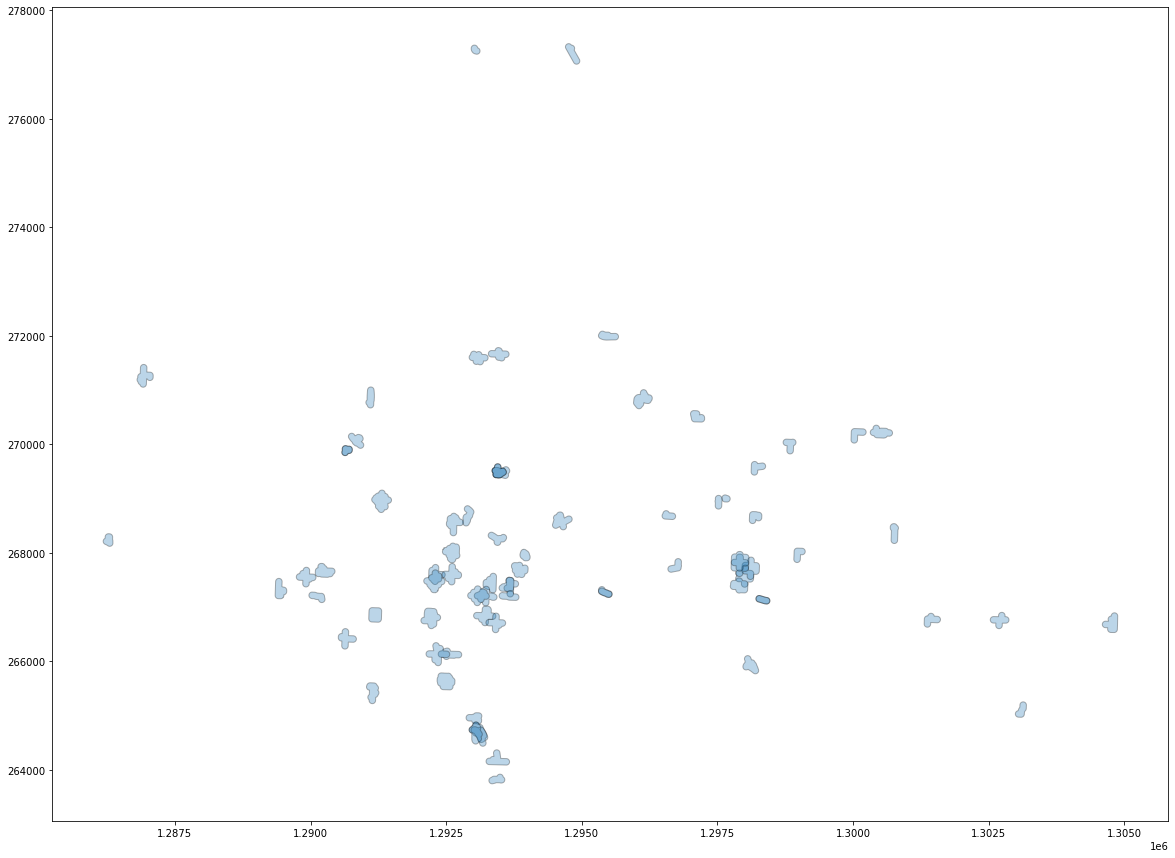

In [56]:
nf2=nf1[nf1['region']=='Eugene']
nf3=nf2[nf1['buff_dist']=='0.1']
ax = nf3.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [57]:
nf3.head()

site_id                                    site_name sensor_type  year  \
6   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
13  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
20  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
27  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
34  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
6   Eugene             2.0  513.408379  12.575342   3.780822    985.0   
13  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
20  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
27  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
34  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

     latitude   longitude             comment  osm_id_sensor buff_dist  \
6   44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
13  44.043919 -123.015499                 NaN    618082822.0       0.1   
20  44.044462 -123.052792                 NaN    106993273.0       0.1   
27  44.068013 -123.110896                 NaN    107098076.0       0.1   
34  44.040527 -123.080176                 NaN    680124010.0       0.1   

                                             geometry  
6   POLYGON ((1290186.182 267251.446, 1290188.228 ...  
13  POLYGON ((1298362.648 267061.927, 1298362.627 ...  
20  POLYGON ((1295524.945 267291.301, 1295530.160 ...  
27  POLYGON ((1290974.271 270014.307, 1290976.905 ...  
34  POLYGON ((1293277.936 266703.683, 1293277.444 ...

# Input the Strava Annual Network shape file here

In [58]:
strava=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene_strava_osm_buffer_3mi.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2839)

epsg:4326


# Input Bike share data here

In [59]:
bs1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene-bike-share-trips-2019.csv")
bs1.head(5)
print(bs1.shape)

(197132, 20)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Input OSM file here

In [60]:
# Input OSM land use shape file here
luse = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [61]:
# Input OSM road shape file here
building = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [62]:
# Input the block group shape file of your study area here
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/OR_blck_grp_2017.shp")

# Input Race csv file here
race=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/education.csv")

# Import school enrollmemt 
scll=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/school Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/Bike_commute_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [63]:
# Input job csv file here
Number_job=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/or_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/tabblock2010_41_pophu.shp")

# Import slope file

In [64]:
eu = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugenc.img')

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [65]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')

In [66]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

<AxesSubplot:>

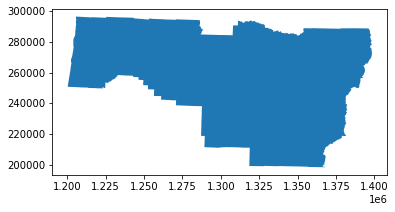

In [67]:
region = "Eugene"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

<AxesSubplot:>

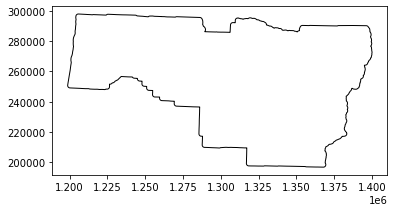

In [68]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

<AxesSubplot:>

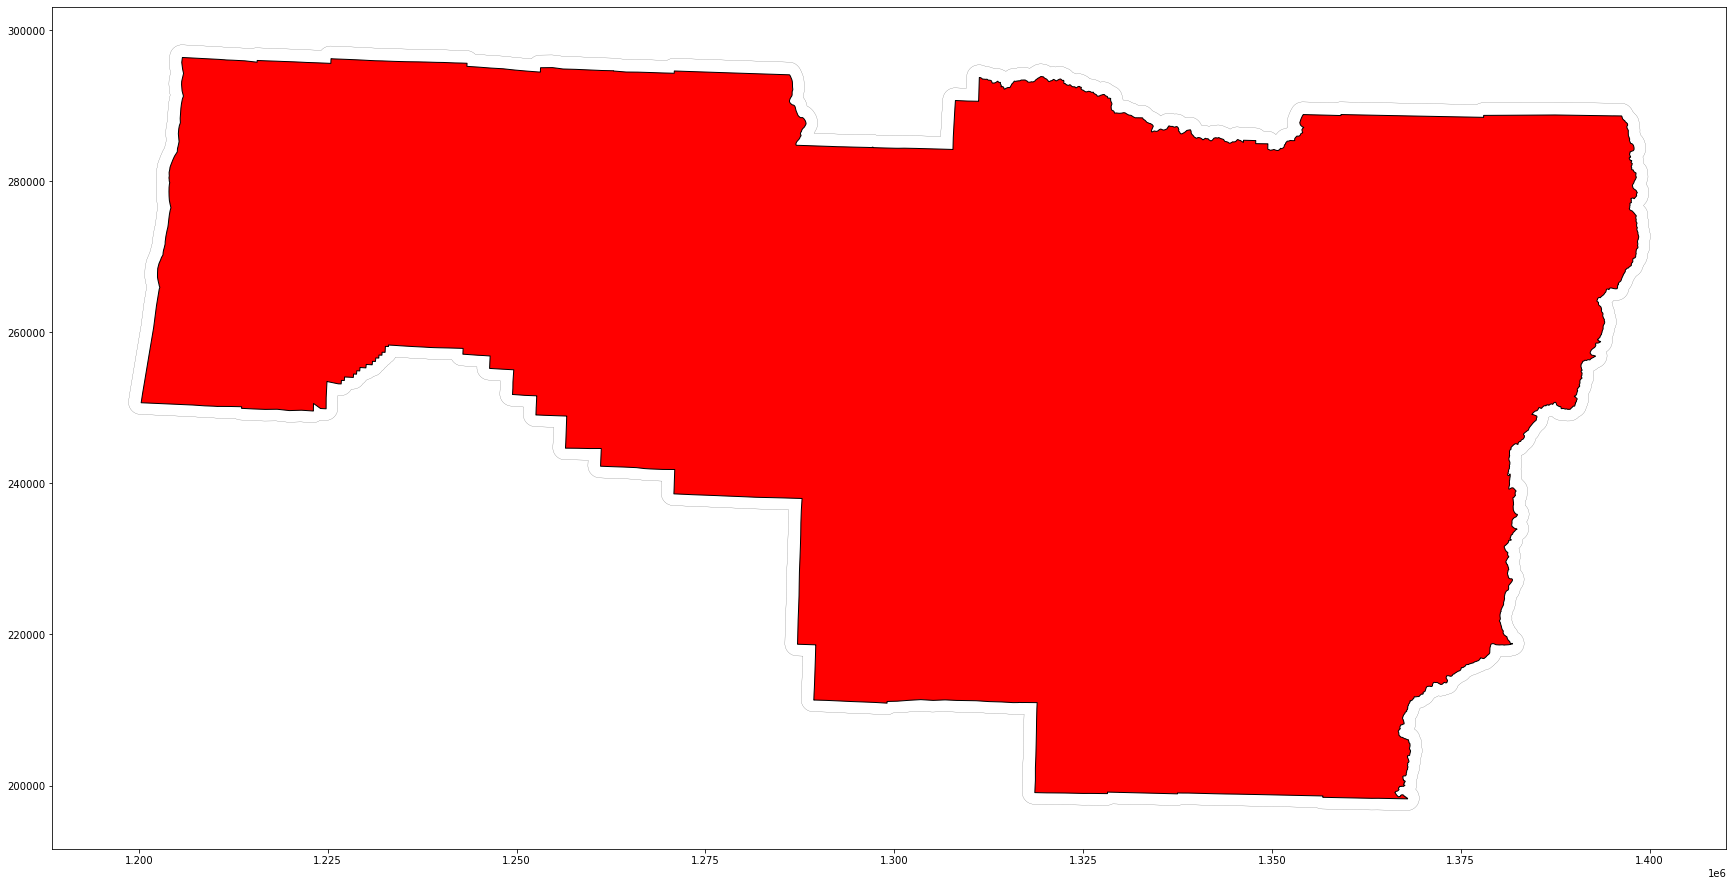

In [69]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the counter location file as gdf

In [70]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
2             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
3             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor buff_dist  \
0 -123.119532  corrected STL zone    123498508.0       2.0   
1 -123.119532  corrected STL zone    123498508.0       1.5   
2 -123.119532  corrected STL zone    123498508.0       1.0   
3 -123.119532  corrected STL zone    123498508.0      0.75   
4 -123.119532  corrected STL zone    123498508.0       0.5   

                      geometry  
0  POINT (-123.11953 44.04252)  
1  POINT (-123.11953 44.04252)  
2  POINT (-123.11953 44.04252)  
3  POINT (-123.11953 44.04252)  
4  POINT (-123.11953 44.04252)

In [71]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=2839)
eco_proj.head()

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
2             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
3             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor buff_dist  \
0 -123.119532  corrected STL zone    123498508.0       2.0   
1 -123.119532  corrected STL zone    123498508.0       1.5   
2 -123.119532  corrected STL zone    123498508.0       1.0   
3 -123.119532  corrected STL zone    123498508.0      0.75   
4 -123.119532  corrected STL zone    123498508.0       0.5   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1290079.275 267211.026)  
2  POINT (1290079.275 267211.026)  
3  POINT (1290079.275 267211.026)  
4  POINT (1290079.275 267211.026)

In [72]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
2             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
3             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor buff_dist  \
0 -123.119532  corrected STL zone    123498508.0       2.0   
1 -123.119532  corrected STL zone    123498508.0       1.5   
2 -123.119532  corrected STL zone    123498508.0       1.0   
3 -123.119532  corrected STL zone    123498508.0      0.75   
4 -123.119532  corrected STL zone    123498508.0       0.5   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1290079.275 267211.026)  
2  POINT (1290079.275 267211.026)  
3  POINT (1290079.275 267211.026)  
4  POINT (1290079.275 267211.026)

# Filter the location by Extended Study area Boundary

In [73]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
1             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
2             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
3             2.0  513.408379  12.575342   3.780822    985.0  44.042515   
4             2.0  513.408379  12.575342   3.780822    985.0  44.042515   

    longitude             comment  osm_id_sensor buff_dist  \
0 -123.119532  corrected STL zone    123498508.0       2.0   
1 -123.119532  corrected STL zone    123498508.0       1.5   
2 -123.119532  corrected STL zone    123498508.0       1.0   
3 -123.119532  corrected STL zone    123498508.0      0.75   
4 -123.119532  corrected STL zone    123498508.0       0.5   

                         geometry  
0  POINT (1290079.275 267211.026)  
1  POINT (1290079.275 267211.026)  
2  POINT (1290079.275 267211.026)  
3  POINT (1290079.275 267211.026)  
4  POINT (1290079.275 267211.026)

In [74]:
count_station=ecoshort.copy()

In [75]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort

site_id                                          site_name sensor_type  \
0    P001EUG                   Fern Ridge Path west of Chambers   permanent   
7    P002EUG                        Millrace Path @ Booth Kelly   permanent   
14   P003EUG        Southbank Path west of Knickerbocker Bridge   permanent   
21   P004EUG           North Bank Path south of Greenway Bridge   permanent   
28   P005EUG                            Alder north of 18th Ave   permanent   
..       ...                                                ...         ...   
504  S120EUG  Willamette St South of 18th Ave incl East Side...  short-term   
511  S121EUG                        Yolanda Ave East of 19th St  short-term   
525  S123EUG        Main St north sidewalk east of Pioneer Pkwy  short-term   
532  S125EUG     Willamette St North of 24th Ave incl Sidewalks  short-term   
539  S127EUG                     Southwood Ln West of Oakway Rd  short-term   

     year  region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0    2019  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
7    2019  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
14   2019  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
21   2019  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
28   2019  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   
..    ...     ...             ...         ...        ...        ...      ...   
504  2019  Eugene             2.0  246.548856   2.465753   1.410959   1341.0   
511  2019  Eugene             1.0   22.126375   3.561644   0.534247    273.0   
525  2019  Eugene             2.0   78.900929   1.315068   0.561644    818.0   
532  2019  Eugene             2.0  182.409439   2.547945   1.082192   2587.0   
539  2019  Eugene             2.0   92.537431   0.328767   0.232877   1013.0   

      latitude   longitude             comment  osm_id_sensor buff_dist  \
0    44.042515 -123.119532  corrected STL zone    123498508.0       2.0   
7    44.043919 -123.015499                 NaN    618082822.0       2.0   
14   44.044462 -123.052792                 NaN    106993273.0       2.0   
21   44.068013 -123.110896                 NaN    107098076.0       2.0   
28   44.040527 -123.080176                 NaN    680124010.0       2.0   
..         ...         ...                 ...            ...       ...   
504  44.039198 -123.092749                 NaN     88379128.0       2.0   
511  44.072399 -122.995862                 NaN     97521582.0       2.0   
525  44.046188 -123.021607                 NaN    435896157.0       2.0   
532  44.033776 -123.090958                 NaN    721761539.0       2.0   
539  44.063436 -123.079023                 NaN    366409020.0       2.0   

                           geometry  
0    POINT (1290079.275 267211.026)  
7    POINT (1298418.325 267111.279)  
14   POINT (1295432.562 267262.083)  
21   POINT (1290859.454 270021.192)  
28   POINT (1293225.340 266892.292)  
..                              ...  
504  POINT (1292213.494 266775.829)  
511  POINT (1300085.791 270227.374)  
525  POINT (1297936.602 267378.037)  
532  POINT (1292338.367 266169.128)  
539  POINT (1293396.138 269433.762)  

[74 rows x 16 columns]

<AxesSubplot:>

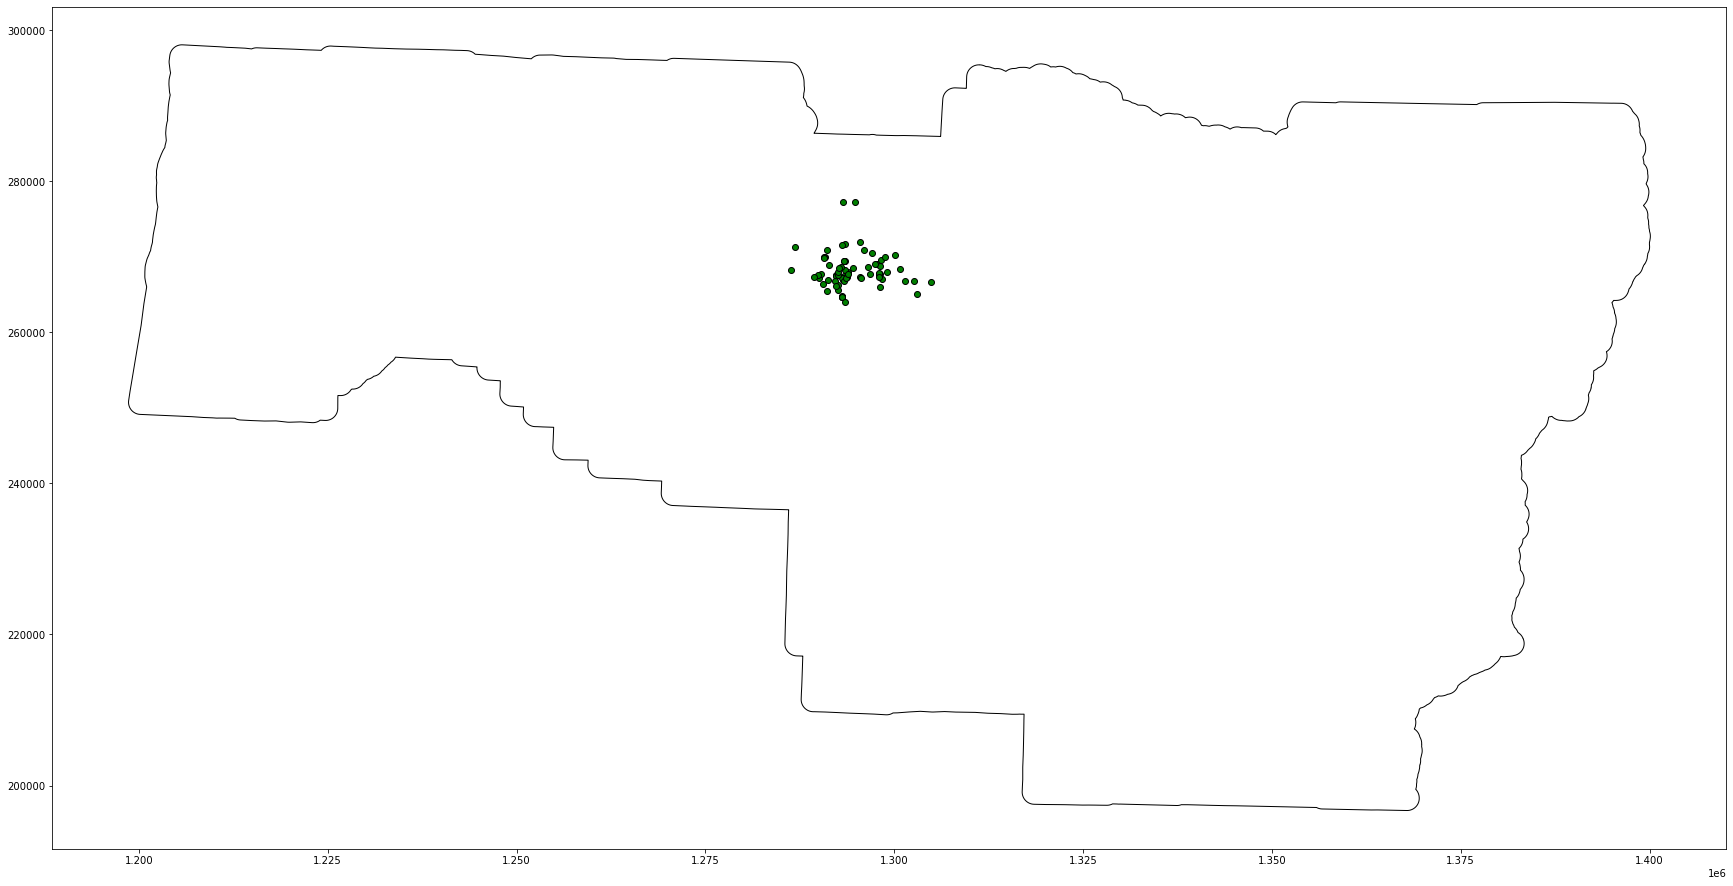

In [76]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [77]:
# Buffer file
gdf1=nf3
gdf1['buffer_area']=gdf1.area*3.86102e-7 # in mile square
gdf1=gdf1[gdf1['buffer_area']>0]
gdf1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


site_id                                       site_name sensor_type  \
6    P001EUG                Fern Ridge Path west of Chambers   permanent   
13   P002EUG                     Millrace Path @ Booth Kelly   permanent   
20   P003EUG     Southbank Path west of Knickerbocker Bridge   permanent   
27   P004EUG        North Bank Path south of Greenway Bridge   permanent   
34   P005EUG                         Alder north of 18th Ave   permanent   
..       ...                                             ...         ...   
517  S121EUG                     Yolanda Ave East of 19th St  short-term   
524  S122EUG                     Yolanda Ave East of 23rd St  short-term   
531  S123EUG     Main St north sidewalk east of Pioneer Pkwy  short-term   
538  S125EUG  Willamette St North of 24th Ave incl Sidewalks  short-term   
545  S127EUG                  Southwood Ln West of Oakway Rd  short-term   

     year  region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
6    2019  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
13   2019  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
20   2019  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
27   2019  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
34   2019  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   
..    ...     ...             ...         ...        ...        ...      ...   
517  2019  Eugene             1.0   22.126375   3.561644   0.534247    273.0   
524  2019  Eugene             3.0    5.077289   0.547945   0.068493     91.0   
531  2019  Eugene             2.0   78.900929   1.315068   0.561644    818.0   
538  2019  Eugene             2.0  182.409439   2.547945   1.082192   2587.0   
545  2019  Eugene             2.0   92.537431   0.328767   0.232877   1013.0   

      latitude   longitude             comment  osm_id_sensor buff_dist  \
6    44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
13   44.043919 -123.015499                 NaN    618082822.0       0.1   
20   44.044462 -123.052792                 NaN    106993273.0       0.1   
27   44.068013 -123.110896                 NaN    107098076.0       0.1   
34   44.040527 -123.080176                 NaN    680124010.0       0.1   
..         ...         ...                 ...            ...       ...   
517  44.072399 -122.995862                 NaN     97521582.0       0.1   
524  44.072392 -122.990277                 NaN     97521582.0       0.1   
531  44.046188 -123.021607                 NaN    435896157.0       0.1   
538  44.033776 -123.090958                 NaN    721761539.0       0.1   
545  44.063436 -123.079023                 NaN    366409020.0       0.1   

                                              geometry  buffer_area  
6    POLYGON ((1290186.182 267251.446, 1290188.228 ...     0.014500  
13   POLYGON ((1298362.648 267061.927, 1298362.627 ...     0.010940  
20   POLYGON ((1295524.945 267291.301, 1295530.160 ...     0.012106  
27   POLYGON ((1290974.271 270014.307, 1290976.905 ...     0.019742  
34   POLYGON ((1293277.936 266703.683, 1293277.444 ...     0.031334  
..                                                 ...          ...  
517  POLYGON ((1300082.464 270067.480, 1300080.849 ...     0.018103  
524  POLYGON ((1300629.325 270143.675, 1300625.810 ...     0.025139  
531  POLYGON ((1298058.365 267316.397, 1298058.113 ...     0.026104  
538  POLYGON ((1292401.502 265942.931, 1292397.866 ...     0.036385  
545  POLYGON ((1293511.378 269552.874, 1293513.847 ...     0.018198  

[77 rows x 17 columns]

In [78]:
#gdf1 = ecoshort.copy()
#gdf1['geometry'] = gdf1['geometry'].buffer(size)
#gdf1

In [79]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [80]:
import contextily as ctx

In [81]:
print(gdf1.crs)

epsg:2839


In [82]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2839 for Eugene
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2839") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

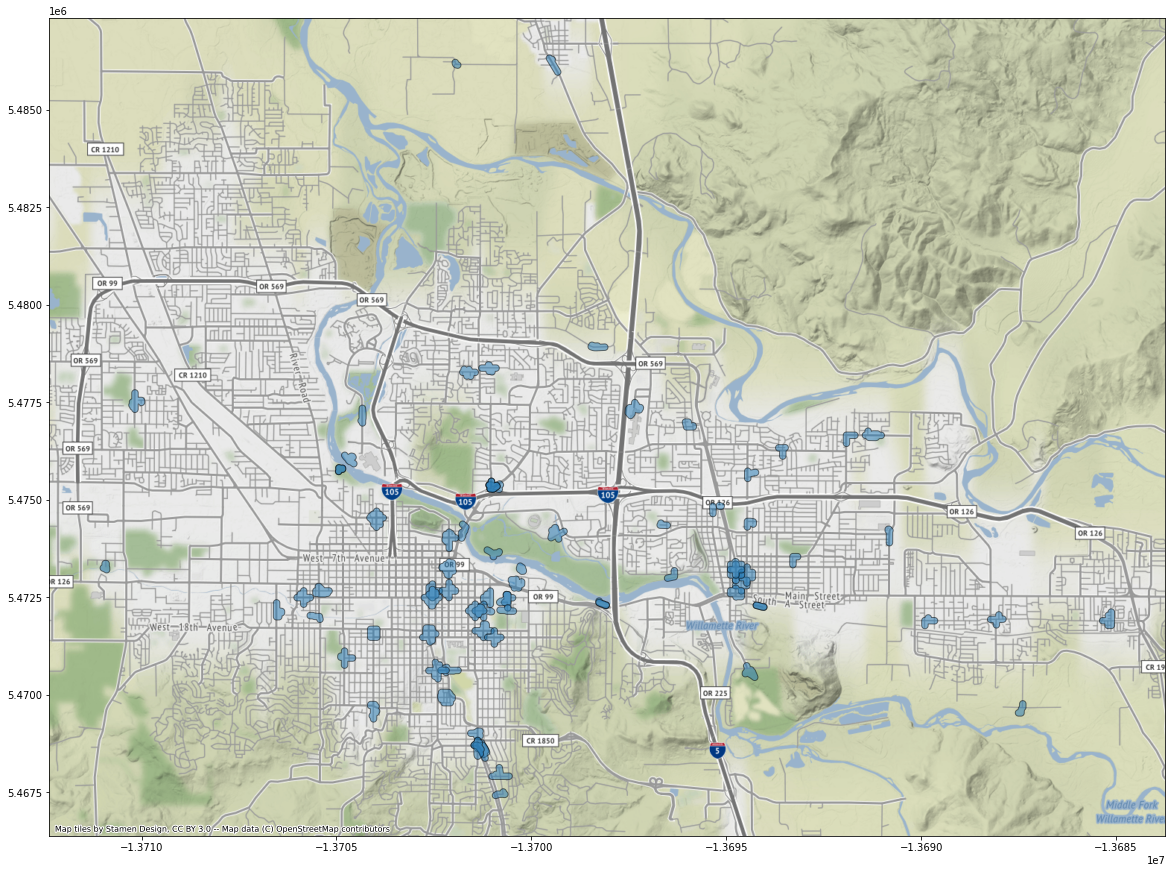

In [83]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

bs_all.head(5)

# BS Origin

In [84]:
bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')
bs3=bs1[bs1['StartLatitude'].notna()]
bs3.shape

(197076, 20)

In [85]:
# Origin
bso = gpd.GeoDataFrame(bs3, geometry=gpd.points_from_xy(bs3.StartLongitude, bs3.StartLatitude))
bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
bso.head(5)

RouteID  StartLatitude  StartLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9      44.045877     -123.078595   
1  3454861ec551bc55a8d4cdcb61faef11      44.045760     -123.078600   
2  c8943fd7a6fc07a422e70dd034c5dc29      44.045472     -123.065293   
3  c6b4535db6b434c320060ddbb92512c4      44.045427     -123.065345   
4  3a65c4f214c50d986e850c3e2d7a1b6f      44.049645     -123.092835   

                      geometry  
0  POINT (-123.07860 44.04588)  
1  POINT (-123.07860 44.04576)  
2  POINT (-123.06529 44.04547)  
3  POINT (-123.06534 44.04543)  
4  POINT (-123.09283 44.04964)

In [86]:
# set the co-ordinate system first
bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bso1_proj = bso1.to_crs(epsg=2839)
bso1_proj.head(5)

RouteID  StartLatitude  StartLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9      44.045877     -123.078595   
1  3454861ec551bc55a8d4cdcb61faef11      44.045760     -123.078600   
2  c8943fd7a6fc07a422e70dd034c5dc29      44.045472     -123.065293   
3  c6b4535db6b434c320060ddbb92512c4      44.045427     -123.065345   
4  3a65c4f214c50d986e850c3e2d7a1b6f      44.049645     -123.092835   

                         geometry  
0  POINT (1293370.316 267482.513)  
1  POINT (1293369.516 267469.568)  
2  POINT (1294434.504 267404.798)  
3  POINT (1294430.209 267399.928)  
4  POINT (1292242.552 267936.260)

In [87]:
# Clip the data using GeoPandas clip
bso1_clip = gpd.clip(bso1_proj, gdf1)
bso1_clip.head(5)

RouteID  StartLatitude  StartLongitude  \
0   9ff020b390a0f80eeebf7d6d10f034a9      44.045877     -123.078595   
1   3454861ec551bc55a8d4cdcb61faef11      44.045760     -123.078600   
9   643f5fbe0964f94645b8d1332296dc72      44.045962     -123.078443   
10  54aebb37e5e71542b8b447a36e807526      44.049825     -123.087840   
12  4ab6ea89f543931c0f4fdfa15d69c875      44.046488     -123.092507   

                          geometry  
0   POINT (1293370.316 267482.513)  
1   POINT (1293369.516 267469.568)  
9   POINT (1293382.759 267491.579)  
10  POINT (1292643.279 267943.872)  
12  POINT (1292257.993 267584.862)

In [88]:
int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_bso.head(5)

site_id                                    site_name sensor_type  year  \
0  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
1  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   
2  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
1  Eugene             3.0  144.877612   2.301370   0.767123   2105.0   
2  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
4  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   

    latitude   longitude comment  osm_id_sensor buff_dist  buffer_area  \
0  44.044462 -123.052792     NaN    106993273.0       0.1     0.012106   
1  44.044164 -123.050040     NaN    439237025.0       0.1     0.010951   
2  44.068013 -123.110896     NaN    107098076.0       0.1     0.019742   
3  44.068013 -123.110896     NaN    107098076.0       0.1     0.019742   
4  44.068013 -123.110896     NaN    107098076.0       0.1     0.019742   

                            RouteID  StartLatitude  StartLongitude  \
0  2e859ea86f7c834a7a08d9aff9ddf38f      44.044382     -123.052652   
1  2e859ea86f7c834a7a08d9aff9ddf38f      44.044382     -123.052652   
2  4695c663779ff1694970ddbb374a468f      44.068697     -123.112000   
3  63a6f7e733767a080f3c38ce363f65c2      44.068725     -123.111993   
4  99925a86e2bc613564b56210521fbd1e      44.068750     -123.112038   

                         geometry  
0  POINT (1295443.512 267252.787)  
1  POINT (1295443.512 267252.787)  
2  POINT (1290773.418 270099.879)  
3  POINT (1290774.053 270103.008)  
4  POINT (1290770.536 270105.897)

<AxesSubplot:>

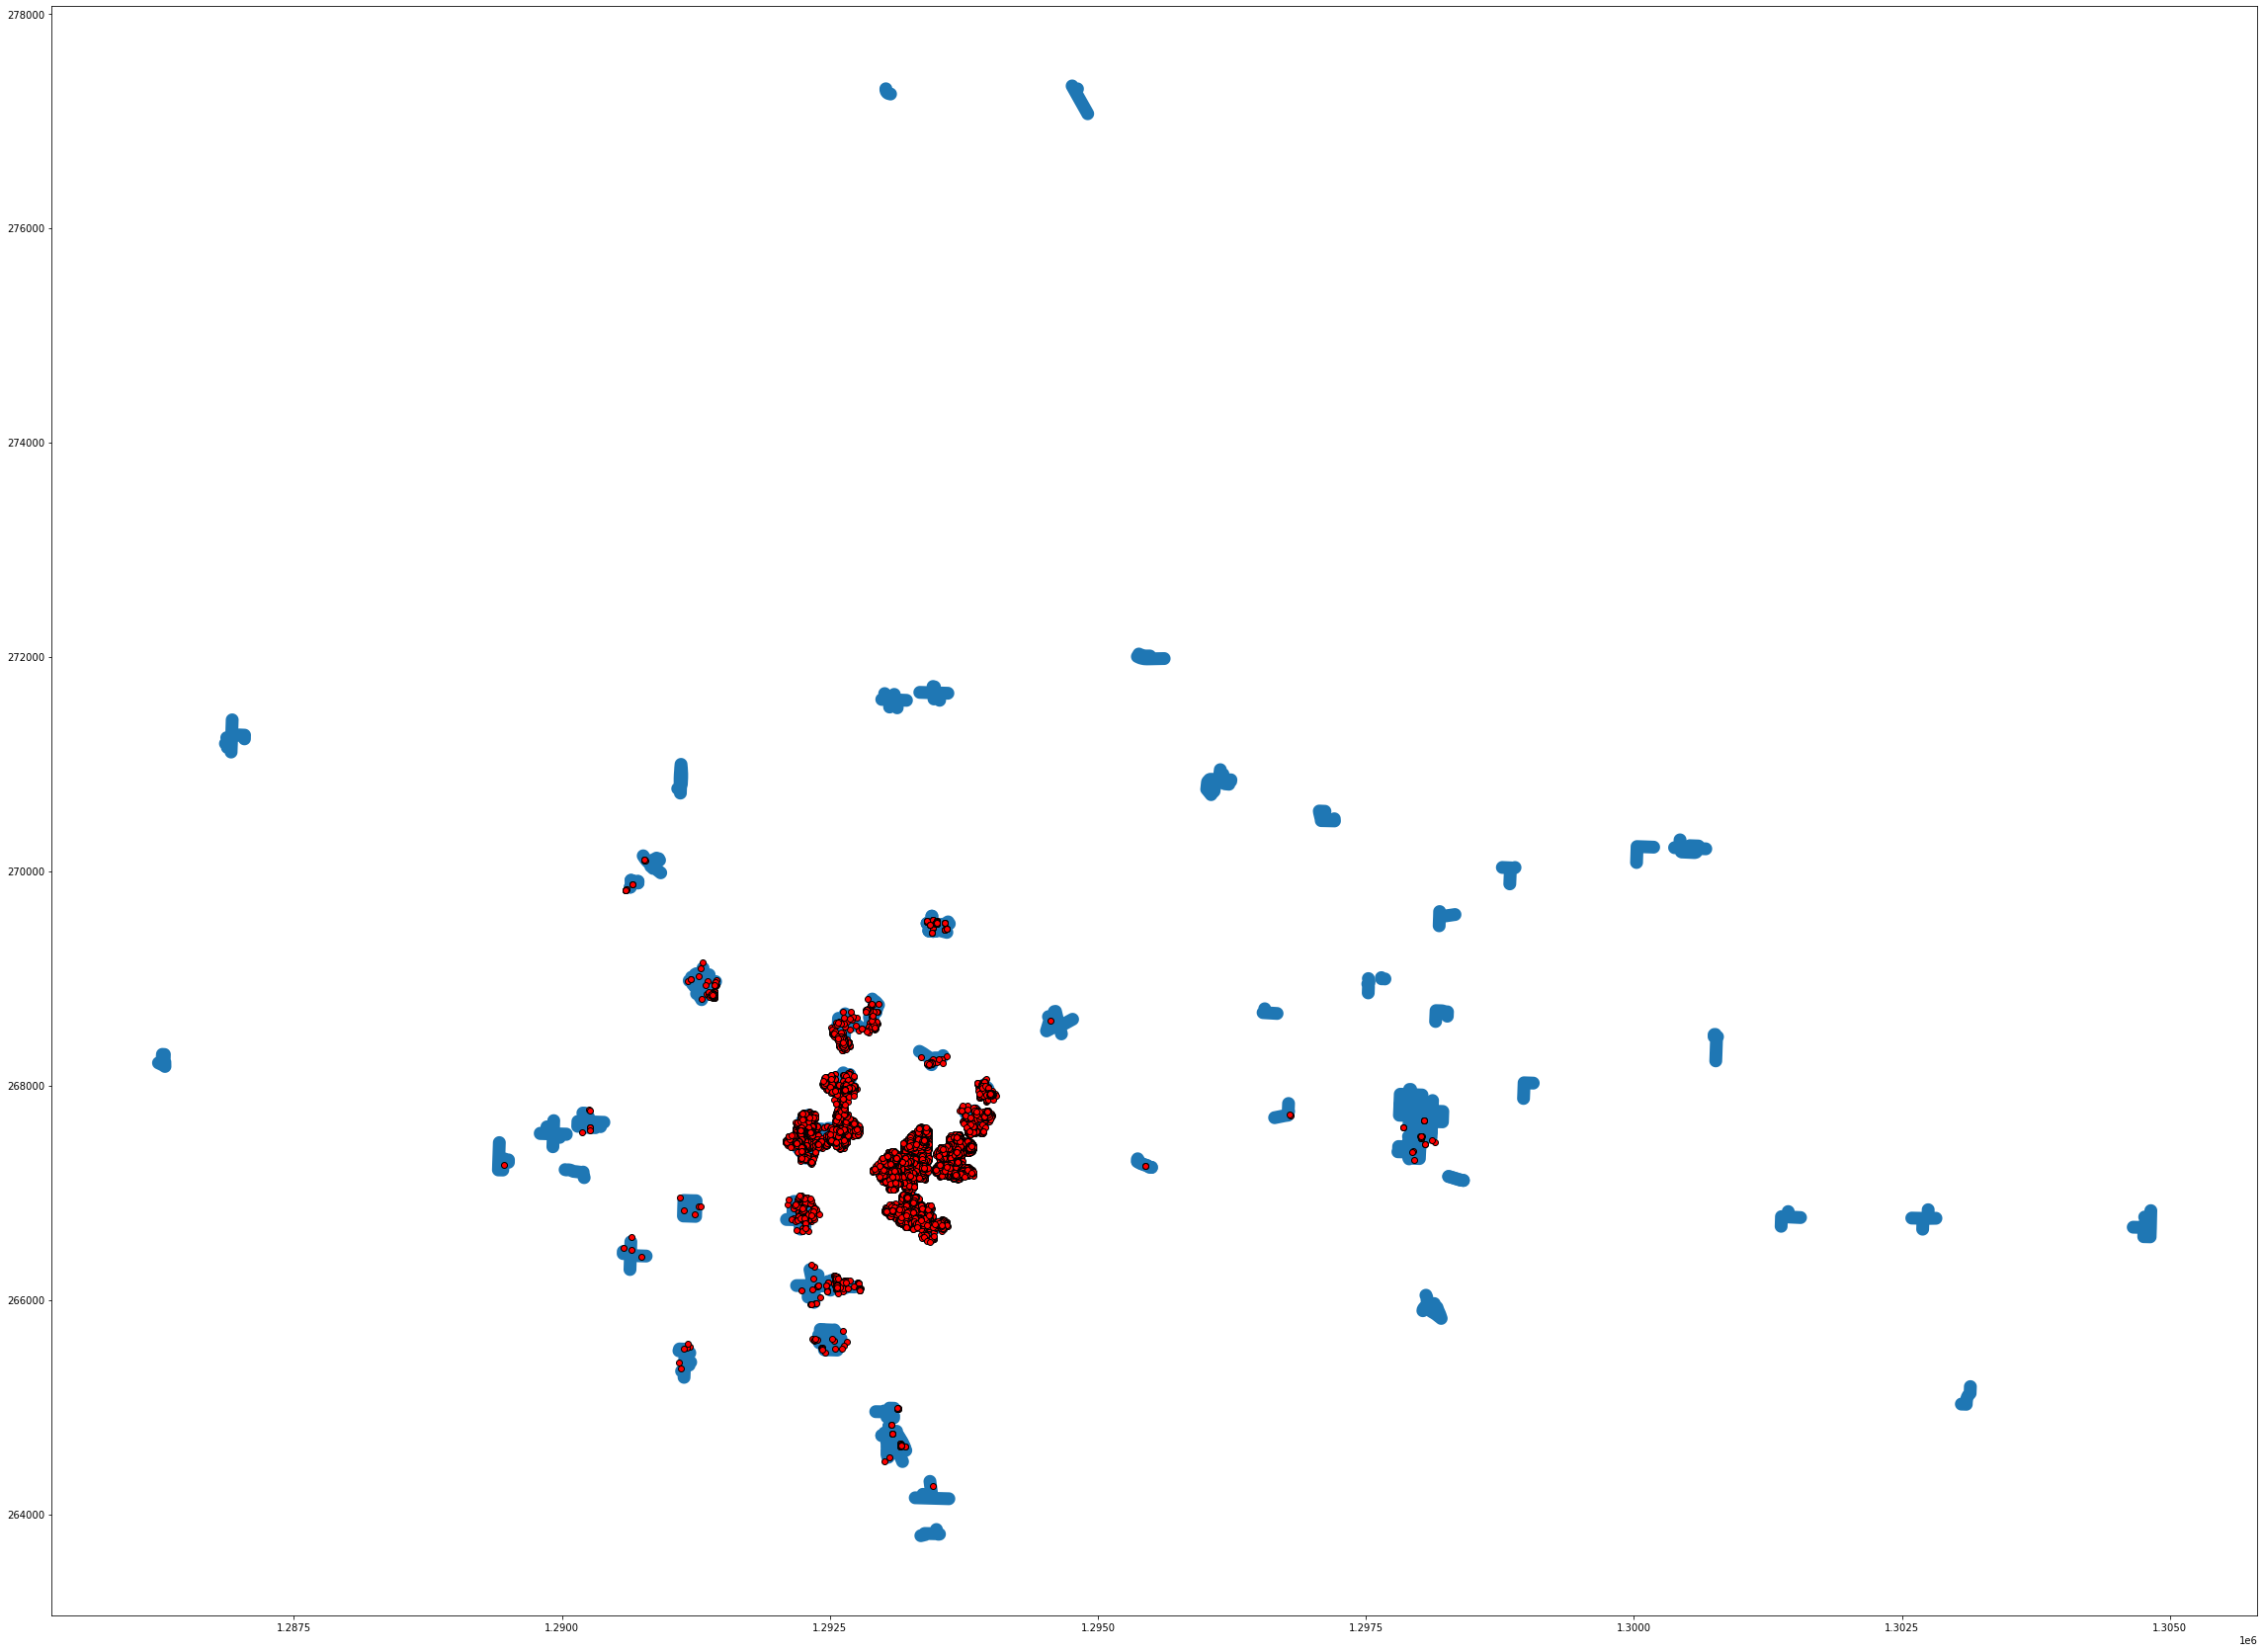

In [89]:
#int_bso.geometry.plot()
ax = gdf1.plot(figsize=(40, 30))
int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [90]:
output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_origin.columns=["osm_id","Bike Share Origin"]
output_origin.head()

osm_id  Bike Share Origin
0  5453222.0                  1
1  5482102.0                845
2  5489866.0                  2
3  5489898.0                 20
4  5490152.0                766

In [91]:
# If there is no data, then run this to gnerate zero
#d = {'osm_id': [], 'Bike Share Origin': []}
#output_origin = pd.DataFrame(data=d)
#output_origin

# BS destination

In [92]:
# Destination
bsd = gpd.GeoDataFrame(
    bs3, geometry=gpd.points_from_xy(bs3.EndLongitude, bs3.EndLatitude))
bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
bsd.head(5)

RouteID  EndLatitude  EndLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9    44.045448   -123.089619   
1  3454861ec551bc55a8d4cdcb61faef11    44.045448   -123.089619   
2  c8943fd7a6fc07a422e70dd034c5dc29    44.045893   -123.078577   
3  c6b4535db6b434c320060ddbb92512c4    44.045943   -123.078555   
4  3a65c4f214c50d986e850c3e2d7a1b6f    44.045405   -123.065292   

                      geometry  
0  POINT (-123.08962 44.04545)  
1  POINT (-123.08962 44.04545)  
2  POINT (-123.07858 44.04589)  
3  POINT (-123.07855 44.04594)  
4  POINT (-123.06529 44.04541)

In [93]:
# set the co-ordinate system first
bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
bsd1_proj = bsd1.to_crs(epsg=2839)
bsd1_proj.head(5)

RouteID  EndLatitude  EndLongitude  \
0  9ff020b390a0f80eeebf7d6d10f034a9    44.045448   -123.089619   
1  3454861ec551bc55a8d4cdcb61faef11    44.045448   -123.089619   
2  c8943fd7a6fc07a422e70dd034c5dc29    44.045893   -123.078577   
3  c6b4535db6b434c320060ddbb92512c4    44.045943   -123.078555   
4  3a65c4f214c50d986e850c3e2d7a1b6f    44.045405   -123.065292   

                         geometry  
0  POINT (1292485.764 267462.108)  
1  POINT (1292485.764 267462.108)  
2  POINT (1293371.839 267484.318)  
3  POINT (1293373.748 267489.818)  
4  POINT (1294434.405 267397.390)

In [94]:
# Clip the data using GeoPandas clip
bsd1_clip = gpd.clip(bsd1_proj, gdf1)
bsd1_clip.head(5)

RouteID  EndLatitude  EndLongitude  \
2   c8943fd7a6fc07a422e70dd034c5dc29    44.045893   -123.078577   
3   c6b4535db6b434c320060ddbb92512c4    44.045943   -123.078555   
18  5f1a57ef3977598ec388cff92dd8abd6    44.046383   -123.092832   
21  9b07e0cabffee39187f87084d264608d    44.046437   -123.092815   
29  ea4d33e585a63cc628f3743bd7be5046    44.038838   -123.078487   

                          geometry  
2   POINT (1293371.839 267484.318)  
3   POINT (1293373.748 267489.818)  
18  POINT (1292231.598 267574.006)  
21  POINT (1292233.119 267579.889)  
29  POINT (1293354.917 266700.556)

In [95]:
int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_bsd.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   
4  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  144.877612   2.301370   0.767123   2105.0   
4  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   

    latitude   longitude             comment  osm_id_sensor buff_dist  \
0  44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
1  44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
2  44.044462 -123.052792                 NaN    106993273.0       0.1   
3  44.044164 -123.050040                 NaN    439237025.0       0.1   
4  44.068013 -123.110896                 NaN    107098076.0       0.1   

   buffer_area                           RouteID  EndLatitude  EndLongitude  \
0     0.014500  7d677f5dc36832a279d6cb091d4b850d    44.041650   -123.118523   
1     0.014500  89c388468bc97adcd71b4fa1ac2697d1    44.041648   -123.118528   
2     0.012106  05ab98d406df145ff2fe41a5901db9a9    44.044397   -123.052633   
3     0.010951  05ab98d406df145ff2fe41a5901db9a9    44.044397   -123.052633   
4     0.019742  d577c063518e2f6892483f17f4b0d99c    44.068673   -123.111958   

                         geometry  
0  POINT (1290157.108 267112.376)  
1  POINT (1290156.702 267112.203)  
2  POINT (1295445.037 267254.408)  
3  POINT (1295445.037 267254.408)  
4  POINT (1290776.676 270097.182)

<AxesSubplot:>

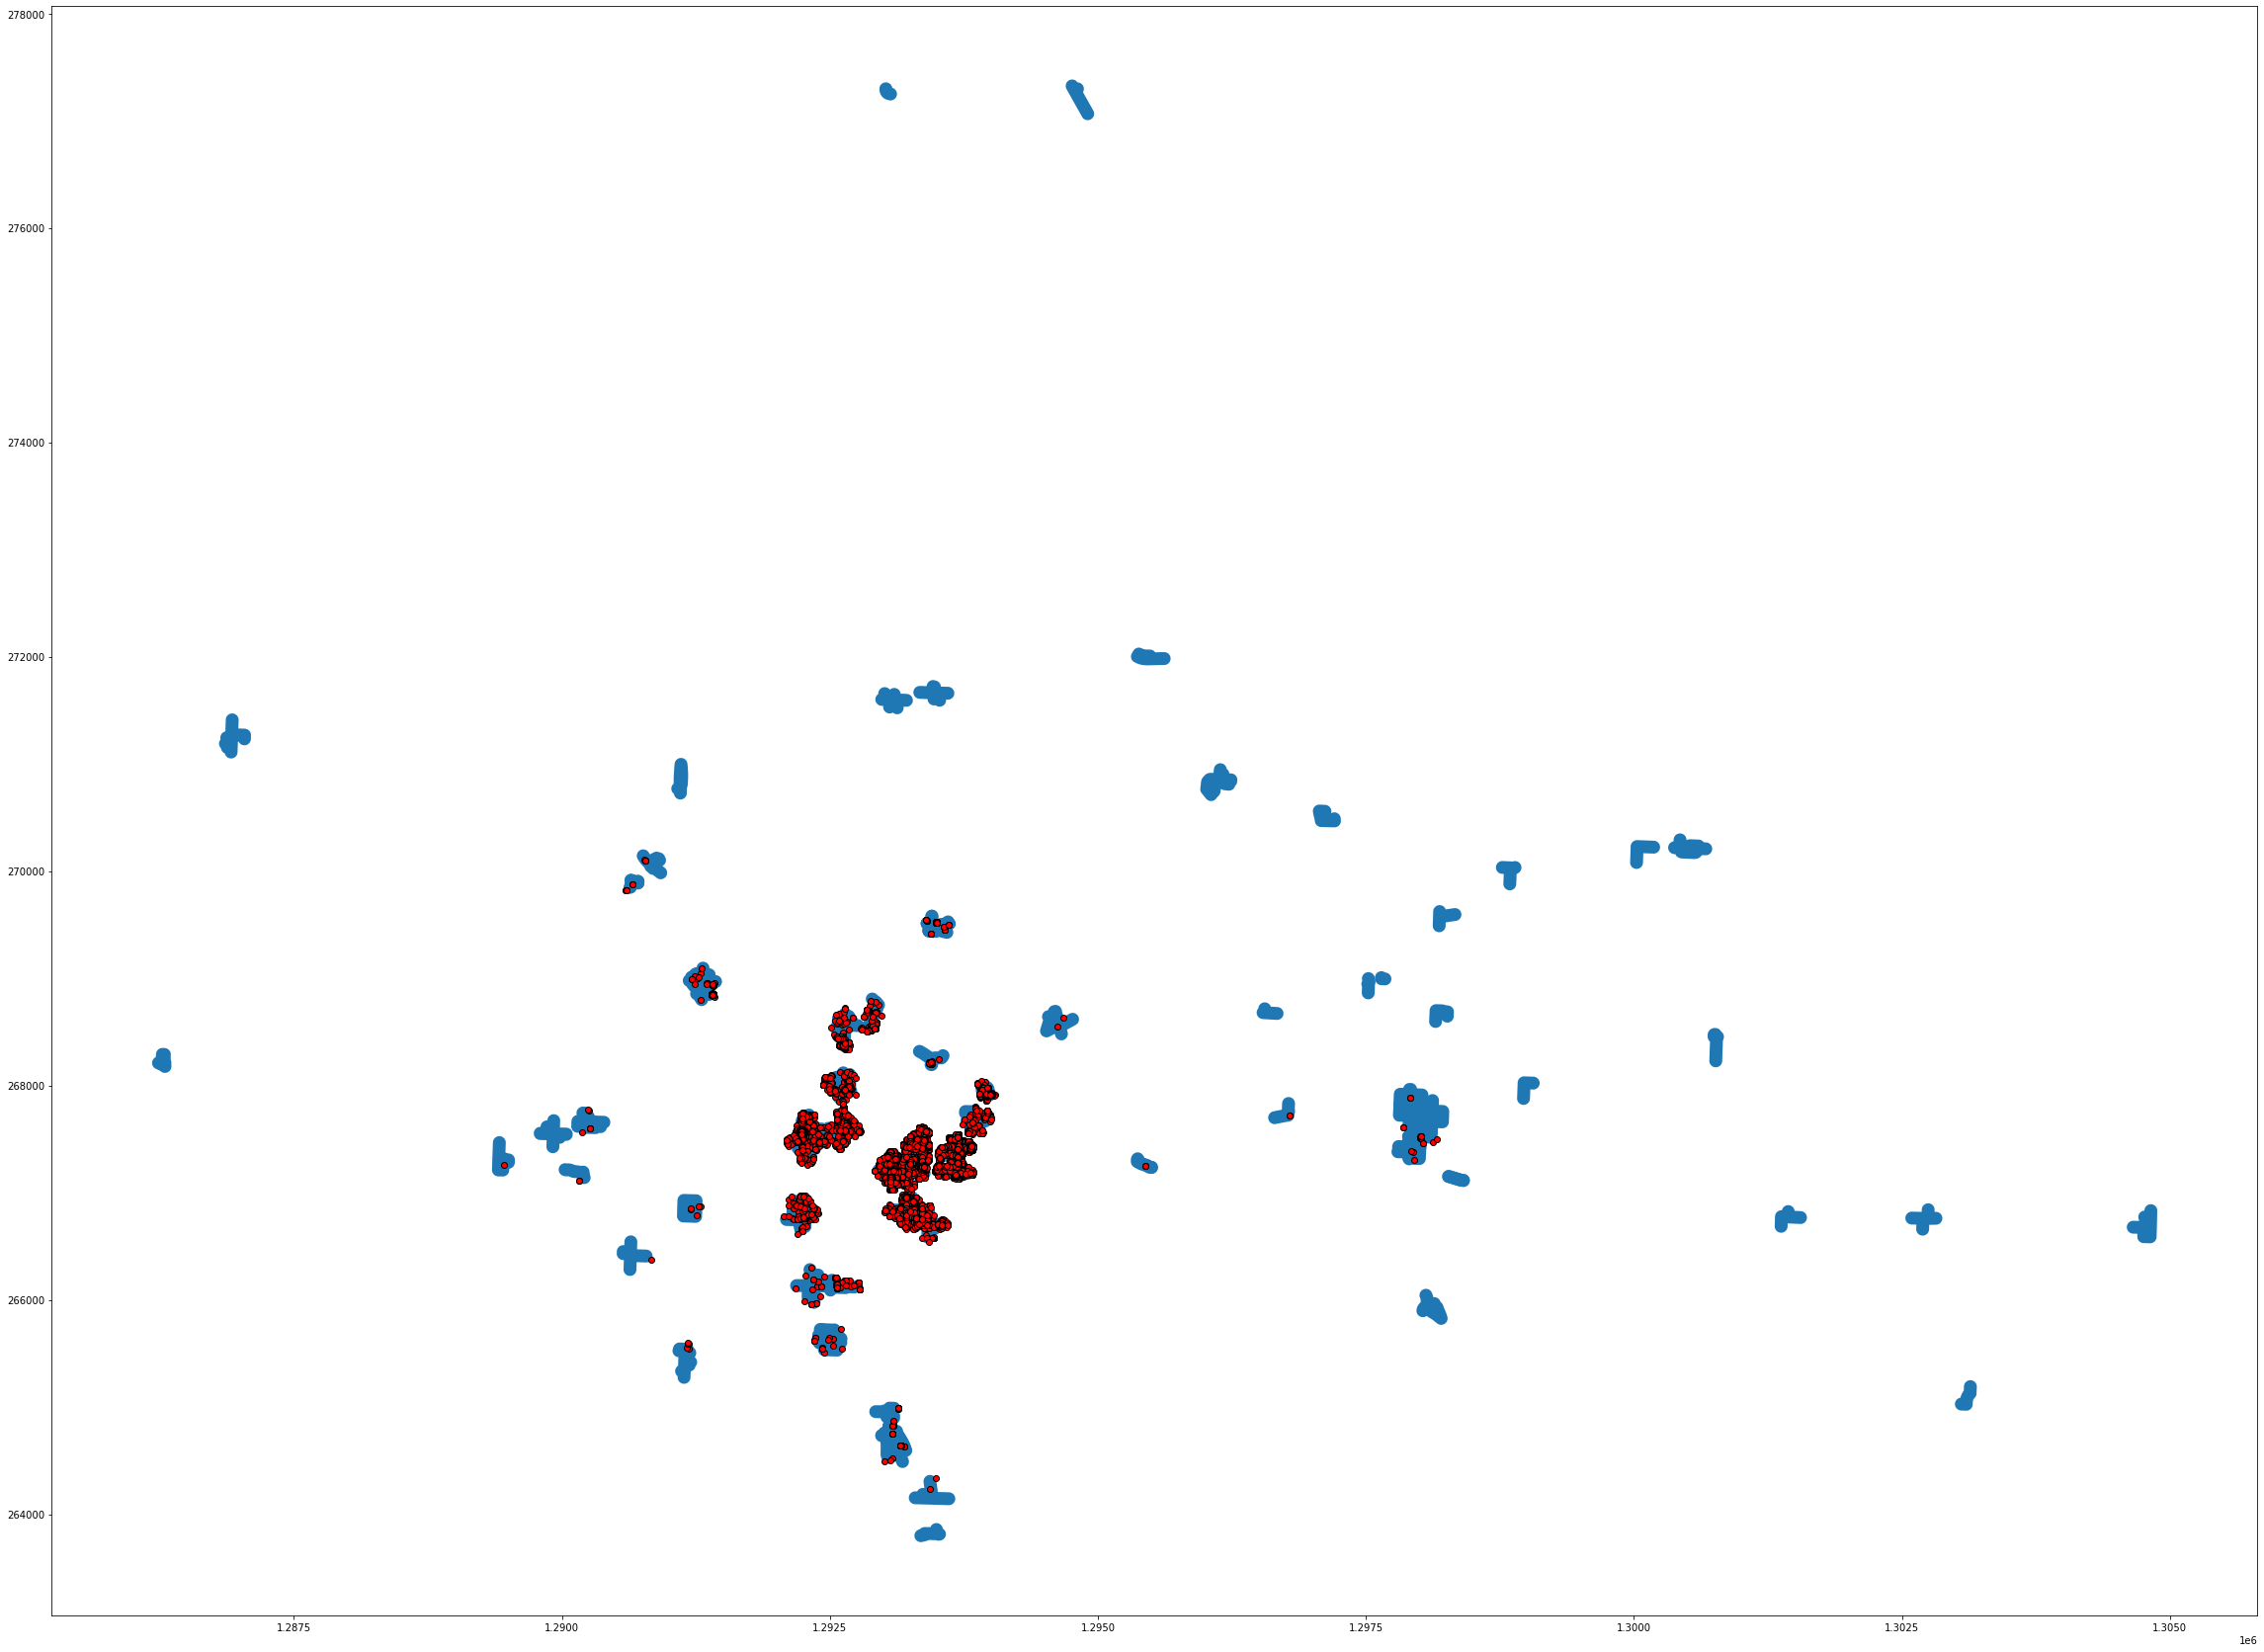

In [96]:
#int_bsd.geometry.plot()
#plotting    
ax = gdf1.plot(figsize=(40, 30))
int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [97]:
output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_destination.columns=["osm_id","Bike Share Destination"]
output_destination.head()

osm_id  Bike Share Destination
0  5482102.0                    1104
1  5483853.0                       1
2  5489866.0                       2
3  5489898.0                      20
4  5490152.0                     820

In [98]:
# If there is no data, then run this to gnerate zero
#d = {'osm_id': [], 'Bike Share Destination': []}
#output_destination = pd.DataFrame(data=d)
#output_destination

# Bike Share OD line Crossing

In [99]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
import shapely.geometry as geom
bs_all_od=bs3.copy()
bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
bs_all_od.head(5)

User.ID                           RouteID  \
0  2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1  74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2  22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3  22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4  79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   

                    Start.Hub  StartLatitude  StartLongitude     Start.Time  \
0     E 13th Ave & Kincaid St      44.045877     -123.078595  1/1/2019 0:30   
1     E 13th Ave & Kincaid St      44.045760     -123.078600  1/1/2019 0:34   
2        Matthew Knight Arena      44.045472     -123.065293  1/1/2019 1:07   
3        Matthew Knight Arena      44.045427     -123.065345  1/1/2019 1:10   
4  E Broadway & Willamette St      44.049645     -123.092835  1/1/2019 1:50   

                   End.Hub  EndLatitude  EndLongitude       End.Time  ...  \
0    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:45  ...   
1    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:46  ...   
2  E 13th Ave & Kincaid St    44.045893   -123.078577  1/1/2019 1:16  ...   
3  E 13th Ave & Kincaid St    44.045943   -123.078555  1/1/2019 1:15  ...   
4     Matthew Knight Arena    44.045405   -123.065292  1/1/2019 2:07  ...   

   Distance..Miles.       Duration Rental.Access.Path Overtime.Y.N  \
0              0.71  14 min 41 sec             keypad            N   
1              0.74  11 min 50 sec             keypad            N   
2              0.68   8 min 19 sec             keypad            N   
3              0.67   5 min 32 sec             keypad            N   
4              1.68  16 min 52 sec             keypad            N   

  Overtime.Fee..USD.  Out.Of.Hub.Y.N Out.Of.Hub.Fee..USD.  Out.Of.Area.Y.N  \
0                  0               N                    0                N   
1                  0               N                    0                N   
2                  0               N                    0                N   
3                  0               N                    0                N   
4                  0               N                    0                N   

  Out.Of.Area.Fee..USD.                                           geometry  
0                     0  LINESTRING (-123.078595 44.04587667, -123.0896...  
1                     0  LINESTRING (-123.0786 44.04576, -123.0896187 4...  
2                     0  LINESTRING (-123.0652933 44.04547167, -123.078...  
3                     0  LINESTRING (-123.065345 44.04542667, -123.0785...  
4                     0  LINESTRING (-123.092835 44.049645, -123.065291...  

[5 rows x 21 columns]

In [100]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

In [101]:
#bs_all_od1.dtypes

In [102]:
#print(bs_all_od1.info())

In [103]:
bs_all_od2 = gpd.GeoDataFrame(bs_all_od, geometry='geometry', crs={'init': 'epsg:4211'})
bs_all_od2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


User.ID                           RouteID  \
0  2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1  74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2  22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3  22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4  79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   

                    Start.Hub  StartLatitude  StartLongitude     Start.Time  \
0     E 13th Ave & Kincaid St      44.045877     -123.078595  1/1/2019 0:30   
1     E 13th Ave & Kincaid St      44.045760     -123.078600  1/1/2019 0:34   
2        Matthew Knight Arena      44.045472     -123.065293  1/1/2019 1:07   
3        Matthew Knight Arena      44.045427     -123.065345  1/1/2019 1:10   
4  E Broadway & Willamette St      44.049645     -123.092835  1/1/2019 1:50   

                   End.Hub  EndLatitude  EndLongitude       End.Time  ...  \
0    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:45  ...   
1    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:46  ...   
2  E 13th Ave & Kincaid St    44.045893   -123.078577  1/1/2019 1:16  ...   
3  E 13th Ave & Kincaid St    44.045943   -123.078555  1/1/2019 1:15  ...   
4     Matthew Knight Arena    44.045405   -123.065292  1/1/2019 2:07  ...   

   Distance..Miles.       Duration Rental.Access.Path Overtime.Y.N  \
0              0.71  14 min 41 sec             keypad            N   
1              0.74  11 min 50 sec             keypad            N   
2              0.68   8 min 19 sec             keypad            N   
3              0.67   5 min 32 sec             keypad            N   
4              1.68  16 min 52 sec             keypad            N   

  Overtime.Fee..USD.  Out.Of.Hub.Y.N Out.Of.Hub.Fee..USD.  Out.Of.Area.Y.N  \
0                  0               N                    0                N   
1                  0               N                    0                N   
2                  0               N                    0                N   
3                  0               N                    0                N   
4                  0               N                    0                N   

  Out.Of.Area.Fee..USD.                                           geometry  
0                     0  LINESTRING (-123.07860 44.04588, -123.08962 44...  
1                     0  LINESTRING (-123.07860 44.04576, -123.08962 44...  
2                     0  LINESTRING (-123.06529 44.04547, -123.07858 44...  
3                     0  LINESTRING (-123.06534 44.04543, -123.07855 44...  
4                     0  LINESTRING (-123.09283 44.04964, -123.06529 44...  

[5 rows x 21 columns]

In [104]:
#print(bs_all_od2.crs)

In [105]:
#print(bs_all_od2.info())

In [106]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bs_all_od2_proj = bs_all_od2.to_crs(epsg=2839)
bs_all_od2_proj.head(5)

User.ID                           RouteID  \
0  2436226a9e9f898c9bcc2434d01ef288  9ff020b390a0f80eeebf7d6d10f034a9   
1  74365fdaf6fb41e42b4c77375aeb0f7d  3454861ec551bc55a8d4cdcb61faef11   
2  22661d458365355ffca40cec43e9727b  c8943fd7a6fc07a422e70dd034c5dc29   
3  22661d458365355ffca40cec43e9727b  c6b4535db6b434c320060ddbb92512c4   
4  79c2c97a0aceb10057a978c9dbcd6eaf  3a65c4f214c50d986e850c3e2d7a1b6f   

                    Start.Hub  StartLatitude  StartLongitude     Start.Time  \
0     E 13th Ave & Kincaid St      44.045877     -123.078595  1/1/2019 0:30   
1     E 13th Ave & Kincaid St      44.045760     -123.078600  1/1/2019 0:34   
2        Matthew Knight Arena      44.045472     -123.065293  1/1/2019 1:07   
3        Matthew Knight Arena      44.045427     -123.065345  1/1/2019 1:10   
4  E Broadway & Willamette St      44.049645     -123.092835  1/1/2019 1:50   

                   End.Hub  EndLatitude  EndLongitude       End.Time  ...  \
0    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:45  ...   
1    E 13th Ave & Pearl St    44.045448   -123.089619  1/1/2019 0:46  ...   
2  E 13th Ave & Kincaid St    44.045893   -123.078577  1/1/2019 1:16  ...   
3  E 13th Ave & Kincaid St    44.045943   -123.078555  1/1/2019 1:15  ...   
4     Matthew Knight Arena    44.045405   -123.065292  1/1/2019 2:07  ...   

   Distance..Miles.       Duration Rental.Access.Path Overtime.Y.N  \
0              0.71  14 min 41 sec             keypad            N   
1              0.74  11 min 50 sec             keypad            N   
2              0.68   8 min 19 sec             keypad            N   
3              0.67   5 min 32 sec             keypad            N   
4              1.68  16 min 52 sec             keypad            N   

  Overtime.Fee..USD.  Out.Of.Hub.Y.N Out.Of.Hub.Fee..USD.  Out.Of.Area.Y.N  \
0                  0               N                    0                N   
1                  0               N                    0                N   
2                  0               N                    0                N   
3                  0               N                    0                N   
4                  0               N                    0                N   

  Out.Of.Area.Fee..USD.                                           geometry  
0                     0  LINESTRING (1293370.316 267482.513, 1292485.76...  
1                     0  LINESTRING (1293369.516 267469.568, 1292485.76...  
2                     0  LINESTRING (1294434.504 267404.798, 1293371.83...  
3                     0  LINESTRING (1294430.209 267399.928, 1293373.74...  
4                     0  LINESTRING (1292242.552 267936.260, 1294434.40...  

[5 rows x 21 columns]

In [107]:
#bs_all_od2_proj.shape

In [108]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [109]:
spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [110]:
#spj.head(5)

In [111]:
#spj.shape

In [112]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [113]:
#int_odl=gpd.overlay(gdf1, bs_all_od2_proj, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [114]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [115]:
output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_odl.columns=["osm_id","Bike Share Crossing"]
output_odl.head()

osm_id  Bike Share Crossing
0  5453222.0                    4
1  5482102.0                 2174
2  5483853.0                    2
3  5485472.0                    4
4  5485965.0                   30

# Eugene GPS bike route

In [116]:
gps_bs=gpd.read_file('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/Eugene-bikeshare-gps-tracks-2019.shp')
#gps_bs=gps_bs[gps_bs.year==2019]
gps_bs

name                      cmt  \
0       9ff020b390a0f80eeebf7d6d10f034a9  2019-01-01 08:30:29 UTC   
1       3454861ec551bc55a8d4cdcb61faef11  2019-01-01 08:34:24 UTC   
2       c8943fd7a6fc07a422e70dd034c5dc29  2019-01-01 09:07:43 UTC   
3       c6b4535db6b434c320060ddbb92512c4  2019-01-01 09:10:15 UTC   
4       3a65c4f214c50d986e850c3e2d7a1b6f  2019-01-01 09:50:38 UTC   
...                                  ...                      ...   
192681  f5af69257ad5d8af3262a20e55d08034  2020-01-01 05:34:16 UTC   
192682  d5d6c36695707e7ec17b29f02eaf0440  2020-01-01 05:38:11 UTC   
192683  ac87037f0f991b4c00be318a7c13b32b  2020-01-01 06:32:59 UTC   
192684  352bdcf368e6a32900abb27f2315b23c  2020-01-01 07:30:43 UTC   
192685  2580b8ab4432c5ec511bd9aa0dec535c  2019-12-22 23:45:04 UTC   

                                                 geometry  
0       LINESTRING (-123.07860 44.04588, -123.07860 44...  
1       LINESTRING (-123.07860 44.04576, -123.07860 44...  
2       LINESTRING (-123.06529 44.04547, -123.06532 44...  
3       LINESTRING (-123.06534 44.04543, -123.06534 44...  
4       LINESTRING (-123.09283 44.04964, -123.09282 44...  
...                                                   ...  
192681  LINESTRING (-123.08523 44.04348, -123.08504 44...  
192682  LINESTRING (-123.08827 44.04652, -123.08824 44...  
192683  LINESTRING (-123.07298 44.04559, -123.07298 44...  
192684  LINESTRING (-123.08937 44.04887, -123.08937 44...  
192685  LINESTRING (-123.08427 44.04232, -123.08427 44...  

[192686 rows x 3 columns]

In [117]:
bs_all_od_gps = gpd.GeoDataFrame(gps_bs, geometry='geometry', crs={'init': 'epsg:4211'})
# Reproject the geometries by replacing the values with projected ones
bs_all_od_gps_proj = bs_all_od_gps.to_crs(epsg=2839)
bs_all_od_gps_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


name                      cmt  \
0  9ff020b390a0f80eeebf7d6d10f034a9  2019-01-01 08:30:29 UTC   
1  3454861ec551bc55a8d4cdcb61faef11  2019-01-01 08:34:24 UTC   
2  c8943fd7a6fc07a422e70dd034c5dc29  2019-01-01 09:07:43 UTC   
3  c6b4535db6b434c320060ddbb92512c4  2019-01-01 09:10:15 UTC   
4  3a65c4f214c50d986e850c3e2d7a1b6f  2019-01-01 09:50:38 UTC   

                                            geometry  
0  LINESTRING (1293371.435 267481.879, 1293371.43...  
1  LINESTRING (1293370.635 267468.934, 1293370.63...  
2  LINESTRING (1294435.620 267404.164, 1294433.66...  
3  LINESTRING (1294431.328 267399.293, 1294431.49...  
4  LINESTRING (1292243.671 267935.626, 1292244.79...

In [118]:
spj = gpd.sjoin( bs_all_od_gps_proj,gdf1, how="inner", op='intersects')

In [119]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [120]:
output_odl_gps=spj.groupby(by=['osm_id_sensor'])['name'].count().reset_index()
output_odl_gps.columns=["osm_id","Bike Share route"]
output_odl_gps.head()

osm_id  Bike Share route
0  5453222.0                41
1  5482102.0              2792
2  5483853.0                77
3  5485472.0                 7
4  5485965.0                63

In [121]:
# from functools import reduce
# import pandas as pd
# # compile the list of dataframes you want to merge
# df_bs = [output_origin,output_destination,output_odl,output_odl_gps]

In [122]:
#Merge by ID
#df_merged_bs = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
#                                            how='left'), df_bs)
#df_merged_bs

In [123]:
# If you want to export the excel
#pd.DataFrame.to_csv(df_merged_bs, 'F:/Bike Fusion/New Plan/Network_Automatic Collected data for modeling/Eugene_Network/Eco_Eugene_BS_data_2.0_mile_non_fill.csv', sep=',', na_rep='0', index=False)

# Now import land use shape file

In [124]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((-123.07730 44.04293, -123.07482 44.0...  
1  POLYGON ((-123.08436 44.02601, -123.08418 44.0...  
2  POLYGON ((-123.09970 44.03780, -123.09962 44.0...  
3  POLYGON ((-123.08279 44.02618, -123.08278 44.0...  
4  POLYGON ((-123.08622 44.03172, -123.08574 44.0...

# Define and then Convert the co-ordinate system

In [125]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

In [126]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2839)
luse_proj.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((1293464.824 267151.609, 1293663.441 ...  
1  POLYGON ((1292841.266 265289.680, 1292855.691 ...  
2  POLYGON ((1291652.887 266637.042, 1291659.172 ...  
3  POLYGON ((1292968.243 265304.904, 1292969.043 ...  
4  POLYGON ((1292712.265 265928.980, 1292752.028 ...

# Visualize

<AxesSubplot:>

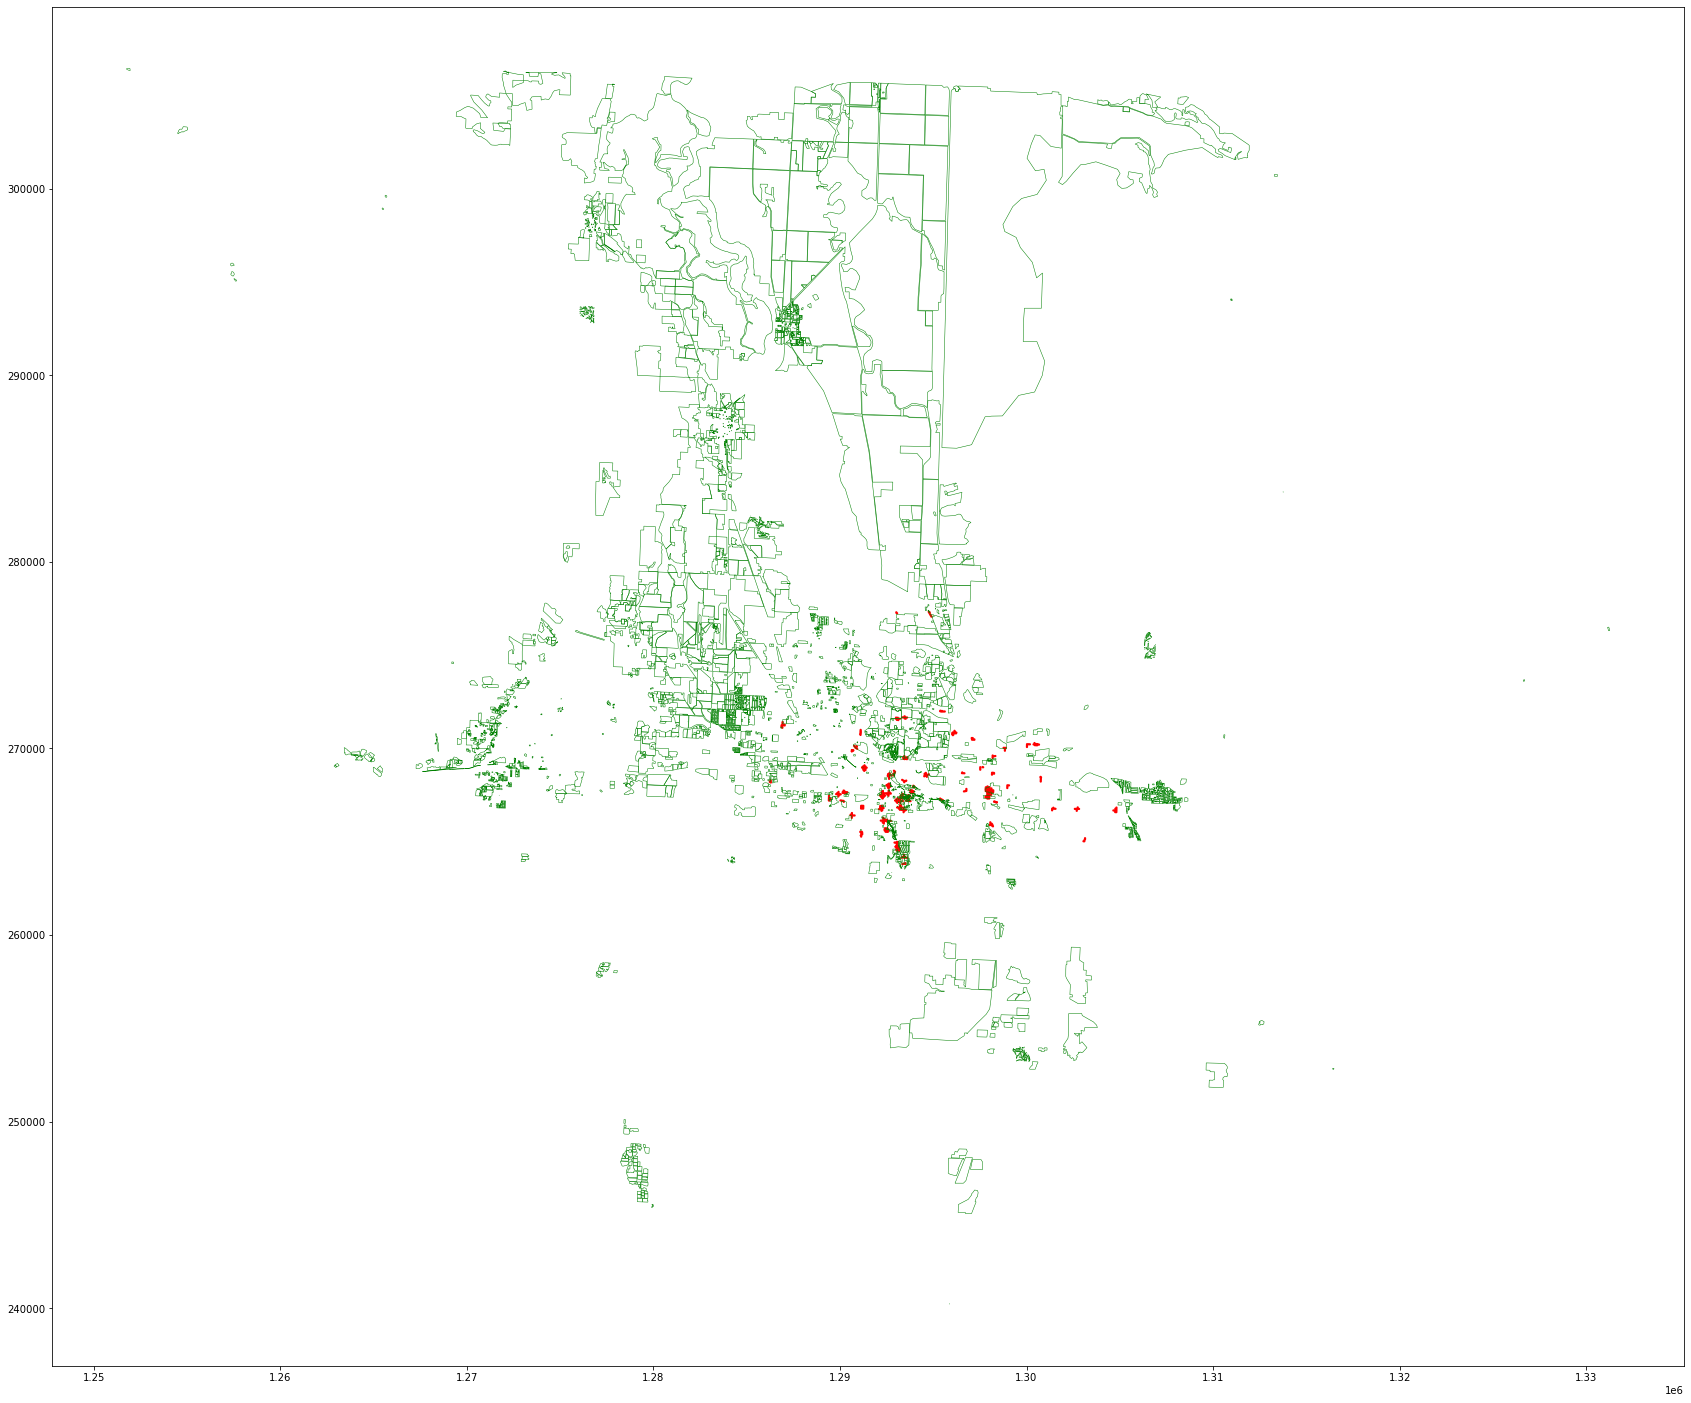

In [127]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [128]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

In [129]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [130]:
#luse_proj.exterior.type

In [131]:
#gdf1.exterior.type

In [132]:
#luse_proj.exterior.is_valid

In [133]:
#gdf1.exterior.is_valid

In [134]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id              name              type  \
0   47472441  Pioneer Memorial          cemetery   
1  123503986   Amazon Dog Park             grass   
2  123539021              None  recreation_groun   
3  124089666  Amazon Skatepark               rec   
4  124089959              None  recreation_groun   

                                            geometry  
0  POLYGON ((1293464.824 267151.609, 1293663.441 ...  
1  POLYGON ((1292841.266 265289.680, 1292855.691 ...  
2  POLYGON ((1291652.887 266637.042, 1291657.417 ...  
3  POLYGON ((1292968.243 265304.904, 1292969.043 ...  
4  POLYGON ((1292712.265 265928.980, 1292752.028 ...

In [135]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

osm_id              name      type  \
0    47472441  Pioneer Memorial  cemetery   
5   124093753              None     grass   
6   124095387              None     grass   
8   124095406              None     grass   
15  124096536              None     grass   

                                             geometry  
0   MULTIPOLYGON (((1293663.441 267144.853, 129366...  
5   MULTIPOLYGON (((1292552.623 266054.615, 129255...  
6   POLYGON ((1292568.202 266061.963, 1292561.192 ...  
8   POLYGON ((1292542.178 266117.751, 1292542.657 ...  
15  POLYGON ((1292681.984 266116.498, 1292681.835 ...

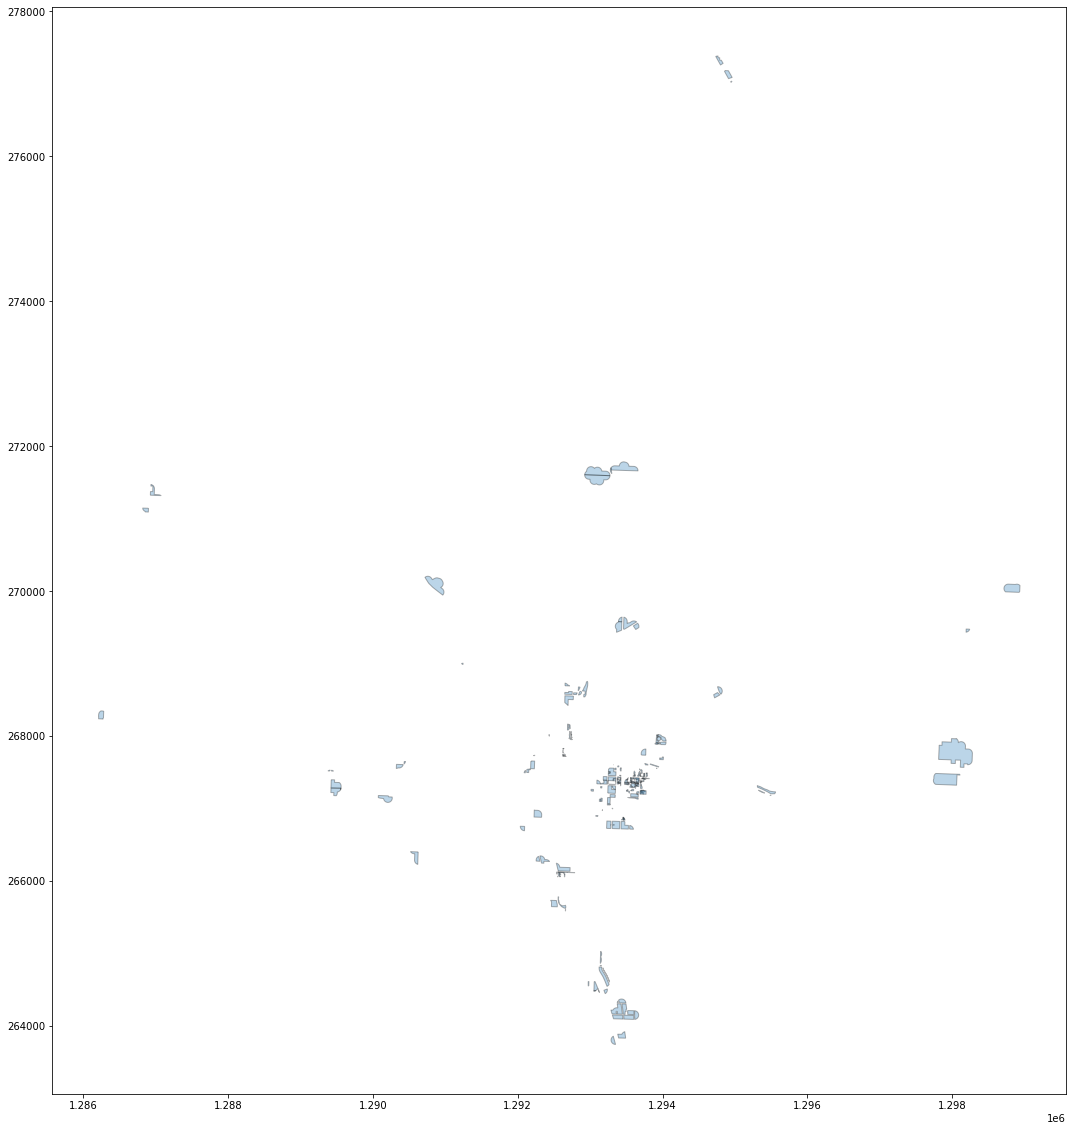

In [136]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [137]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
2  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   
3  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
4  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
2  Eugene             3.0  144.877612   2.301370   0.767123   2105.0   
3  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
4  Eugene             3.0  144.877612   2.301370   0.767123   2105.0   

    latitude   longitude             comment  osm_id_sensor buff_dist  \
0  44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
1  44.044462 -123.052792                 NaN    106993273.0       0.1   
2  44.044164 -123.050040                 NaN    439237025.0       0.1   
3  44.044462 -123.052792                 NaN    106993273.0       0.1   
4  44.044164 -123.050040                 NaN    439237025.0       0.1   

   buffer_area     osm_id                     name        type  \
0     0.014500  848208860  Westmoreland Commercial  commercial   
1     0.012106  706227660                     None       grass   
2     0.010951  706227660                     None       grass   
3     0.012106  706227666                     None       grass   
4     0.010951  706227666                     None       grass   

                                            geometry  
0  POLYGON ((1290267.280 267151.085, 1290267.966 ...  
1  POLYGON ((1295374.444 267219.842, 1295350.501 ...  
2  POLYGON ((1295374.444 267219.842, 1295350.501 ...  
3  POLYGON ((1295494.128 267178.489, 1295496.231 ...  
4  POLYGON ((1295494.128 267178.489, 1295496.231 ...

In [138]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
2  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   
3  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
4  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
2  Eugene             3.0  144.877612   2.301370   0.767123   2105.0  ...   
3  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
4  Eugene             3.0  144.877612   2.301370   0.767123   2105.0  ...   

    longitude             comment osm_id_sensor  buff_dist buffer_area  \
0 -123.119532  corrected STL zone   123498508.0        0.1    0.014500   
1 -123.052792                 NaN   106993273.0        0.1    0.012106   
2 -123.050040                 NaN   439237025.0        0.1    0.010951   
3 -123.052792                 NaN   106993273.0        0.1    0.012106   
4 -123.050040                 NaN   439237025.0        0.1    0.010951   

      osm_id                     name        type  \
0  848208860  Westmoreland Commercial  commercial   
1  706227660                     None       grass   
2  706227660                     None       grass   
3  706227666                     None       grass   
4  706227666                     None       grass   

                                            geometry           Area  
0  POLYGON ((1290267.280 267151.085, 1290267.966 ...  121158.346949  
1  POLYGON ((1295374.444 267219.842, 1295350.501 ...    4944.905087  
2  POLYGON ((1295374.444 267219.842, 1295350.501 ...    4944.413292  
3  POLYGON ((1295494.128 267178.489, 1295496.231 ...      85.428014  
4  POLYGON ((1295494.128 267178.489, 1295496.231 ...      85.428014  

[5 rows x 21 columns]

#https://geopandas.org/docs/user_guide/set_operations.html

In [139]:
#intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [140]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

osm_id         type           Area
0  5453222.0  residential  776772.723414
1  5482102.0        grass    2478.509847
2  5483853.0  residential  577879.759258
3  5485472.0  residential  642349.062794
4  5486345.0     farmland   65926.543010

In [141]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

osm_id  Commercial Area 
0    5490868.0     136959.098358
1  122901706.0       1648.691901
2  123498508.0     121158.346949
3  435896157.0     508500.892036
4  498988297.0        713.080647

In [142]:
gdf1.head()

site_id                                    site_name sensor_type  year  \
6   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
13  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
20  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
27  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
34  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
6   Eugene             2.0  513.408379  12.575342   3.780822    985.0   
13  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
20  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
27  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
34  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

     latitude   longitude             comment  osm_id_sensor buff_dist  \
6   44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
13  44.043919 -123.015499                 NaN    618082822.0       0.1   
20  44.044462 -123.052792                 NaN    106993273.0       0.1   
27  44.068013 -123.110896                 NaN    107098076.0       0.1   
34  44.040527 -123.080176                 NaN    680124010.0       0.1   

                                             geometry  buffer_area  
6   POLYGON ((1290186.182 267251.446, 1290188.228 ...     0.014500  
13  POLYGON ((1298362.648 267061.927, 1298362.627 ...     0.010940  
20  POLYGON ((1295524.945 267291.301, 1295530.160 ...     0.012106  
27  POLYGON ((1290974.271 270014.307, 1290976.905 ...     0.019742  
34  POLYGON ((1293277.936 266703.683, 1293277.444 ...     0.031334

<AxesSubplot:>

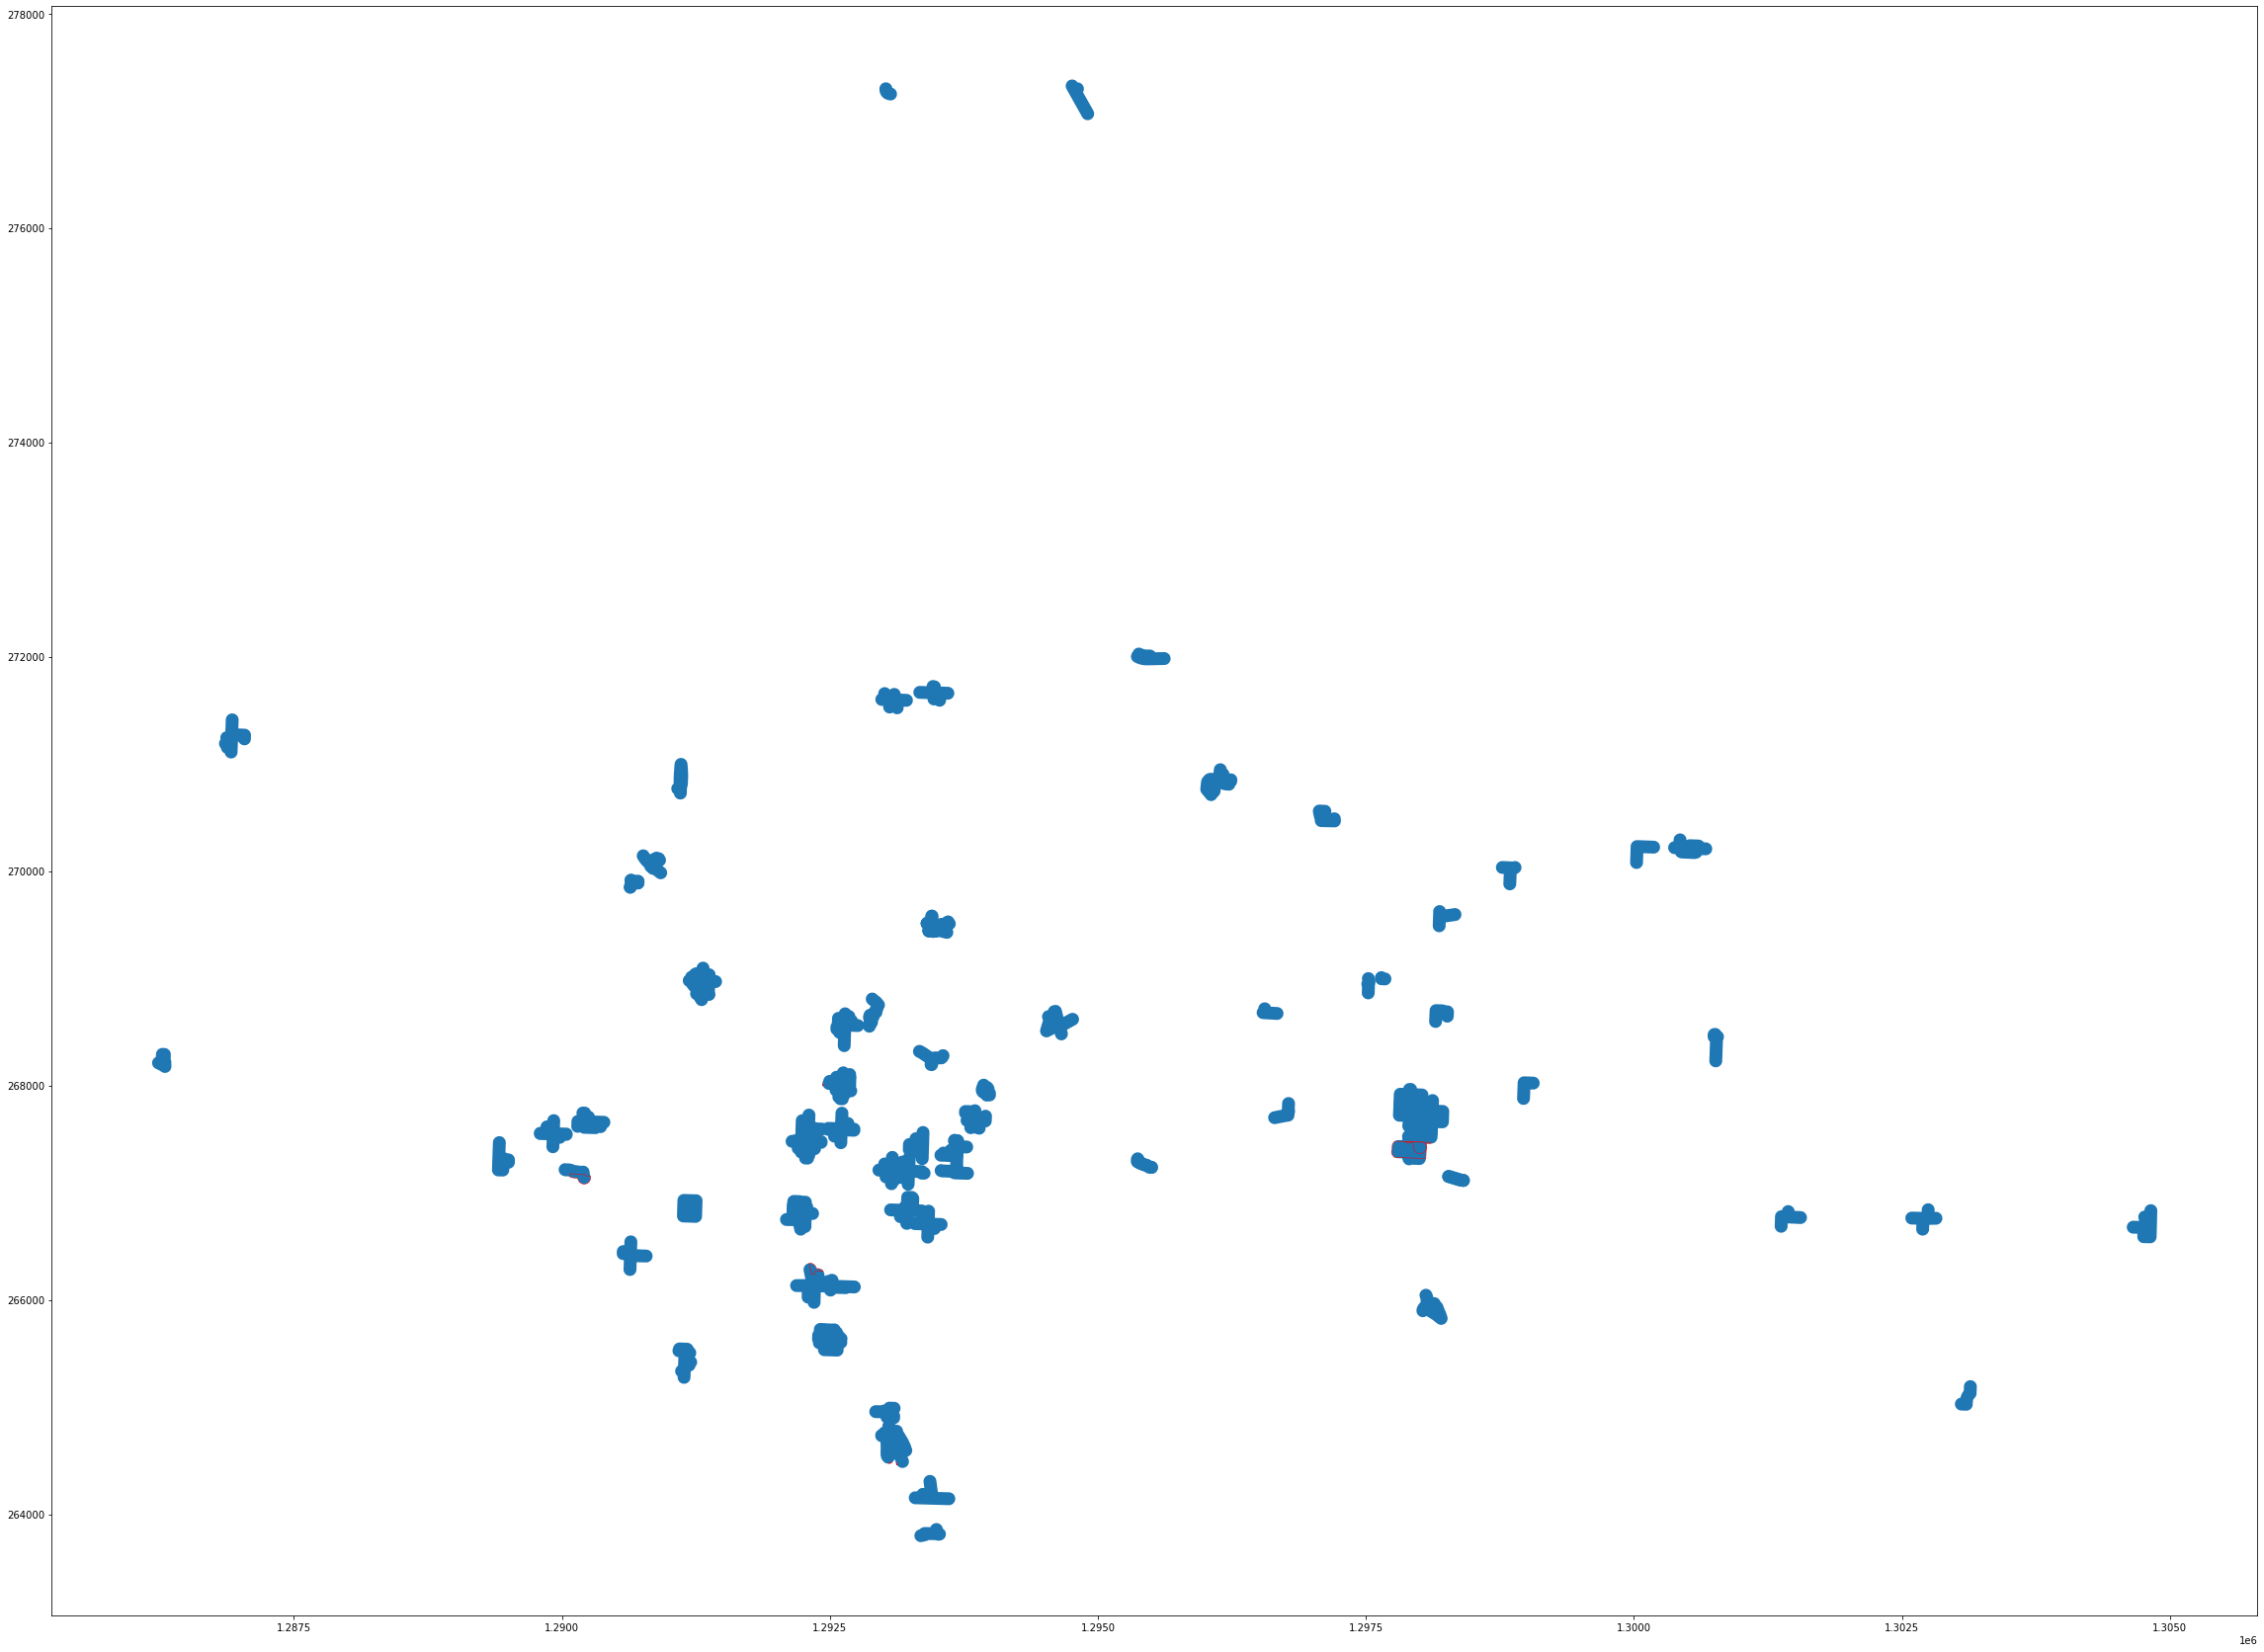

In [143]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [144]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

osm_id  Industrial Area 
0  378783362.0      75105.353842
1  439247833.0      49240.726893

In [145]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

osm_id  Residential_Area 
0  5453222.0      776772.723414
1  5483853.0      577879.759258
2  5485472.0      642349.062794
3  5489655.0      299969.583939
4  5489866.0      623415.511061

In [146]:
residential.head(5)

site_id                            site_name sensor_type  year  region  \
9   P005EUG              Alder north of 18th Ave   permanent  2019  Eugene   
10  S074EUG          Harris St South of 18th Ave  short-term  2019  Eugene   
11  P005EUG              Alder north of 18th Ave   permanent  2019  Eugene   
12  S074EUG          Harris St South of 18th Ave  short-term  2019  Eugene   
41  S002EUG  12th Ave Path East of Willamette St  short-term  2019  Eugene   

    travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...   longitude  \
9              1.0  410.282143  6.972603   4.479452   2154.0  ... -123.080176   
10             2.0   95.657852  0.698630   0.397260    260.0  ... -123.077731   
11             1.0  410.282143  6.972603   4.479452   2154.0  ... -123.080176   
12             2.0   95.657852  0.698630   0.397260    260.0  ... -123.077731   
41             2.0  180.006727  0.986301   0.547945    743.0  ... -123.092231   

    comment osm_id_sensor  buff_dist buffer_area     osm_id          name  \
9       NaN   680124010.0        0.1    0.031334  384612623          None   
10      NaN     5490152.0        0.1    0.026356  384612623          None   
11      NaN   680124010.0        0.1    0.031334  384804043          None   
12      NaN     5490152.0        0.1    0.026356  384804043          None   
41      NaN   129170725.0        0.1    0.028190  667590945  13th & Olive   

           type                                           geometry  \
9   residential  POLYGON ((1293406.653 266795.294, 1293402.987 ...   
10  residential  POLYGON ((1293332.759 266770.721, 1293334.057 ...   
11  residential  POLYGON ((1293281.143 266772.888, 1293281.060 ...   
12  residential  POLYGON ((1293235.147 266725.622, 1293236.765 ...   
41  residential  POLYGON ((1292179.327 267595.567, 1292179.326 ...   

            Area  
9   50055.110739  
10  83881.735576  
11  60031.256264  
12  19516.911399  
41  59297.498826  

[5 rows x 21 columns]

<AxesSubplot:>

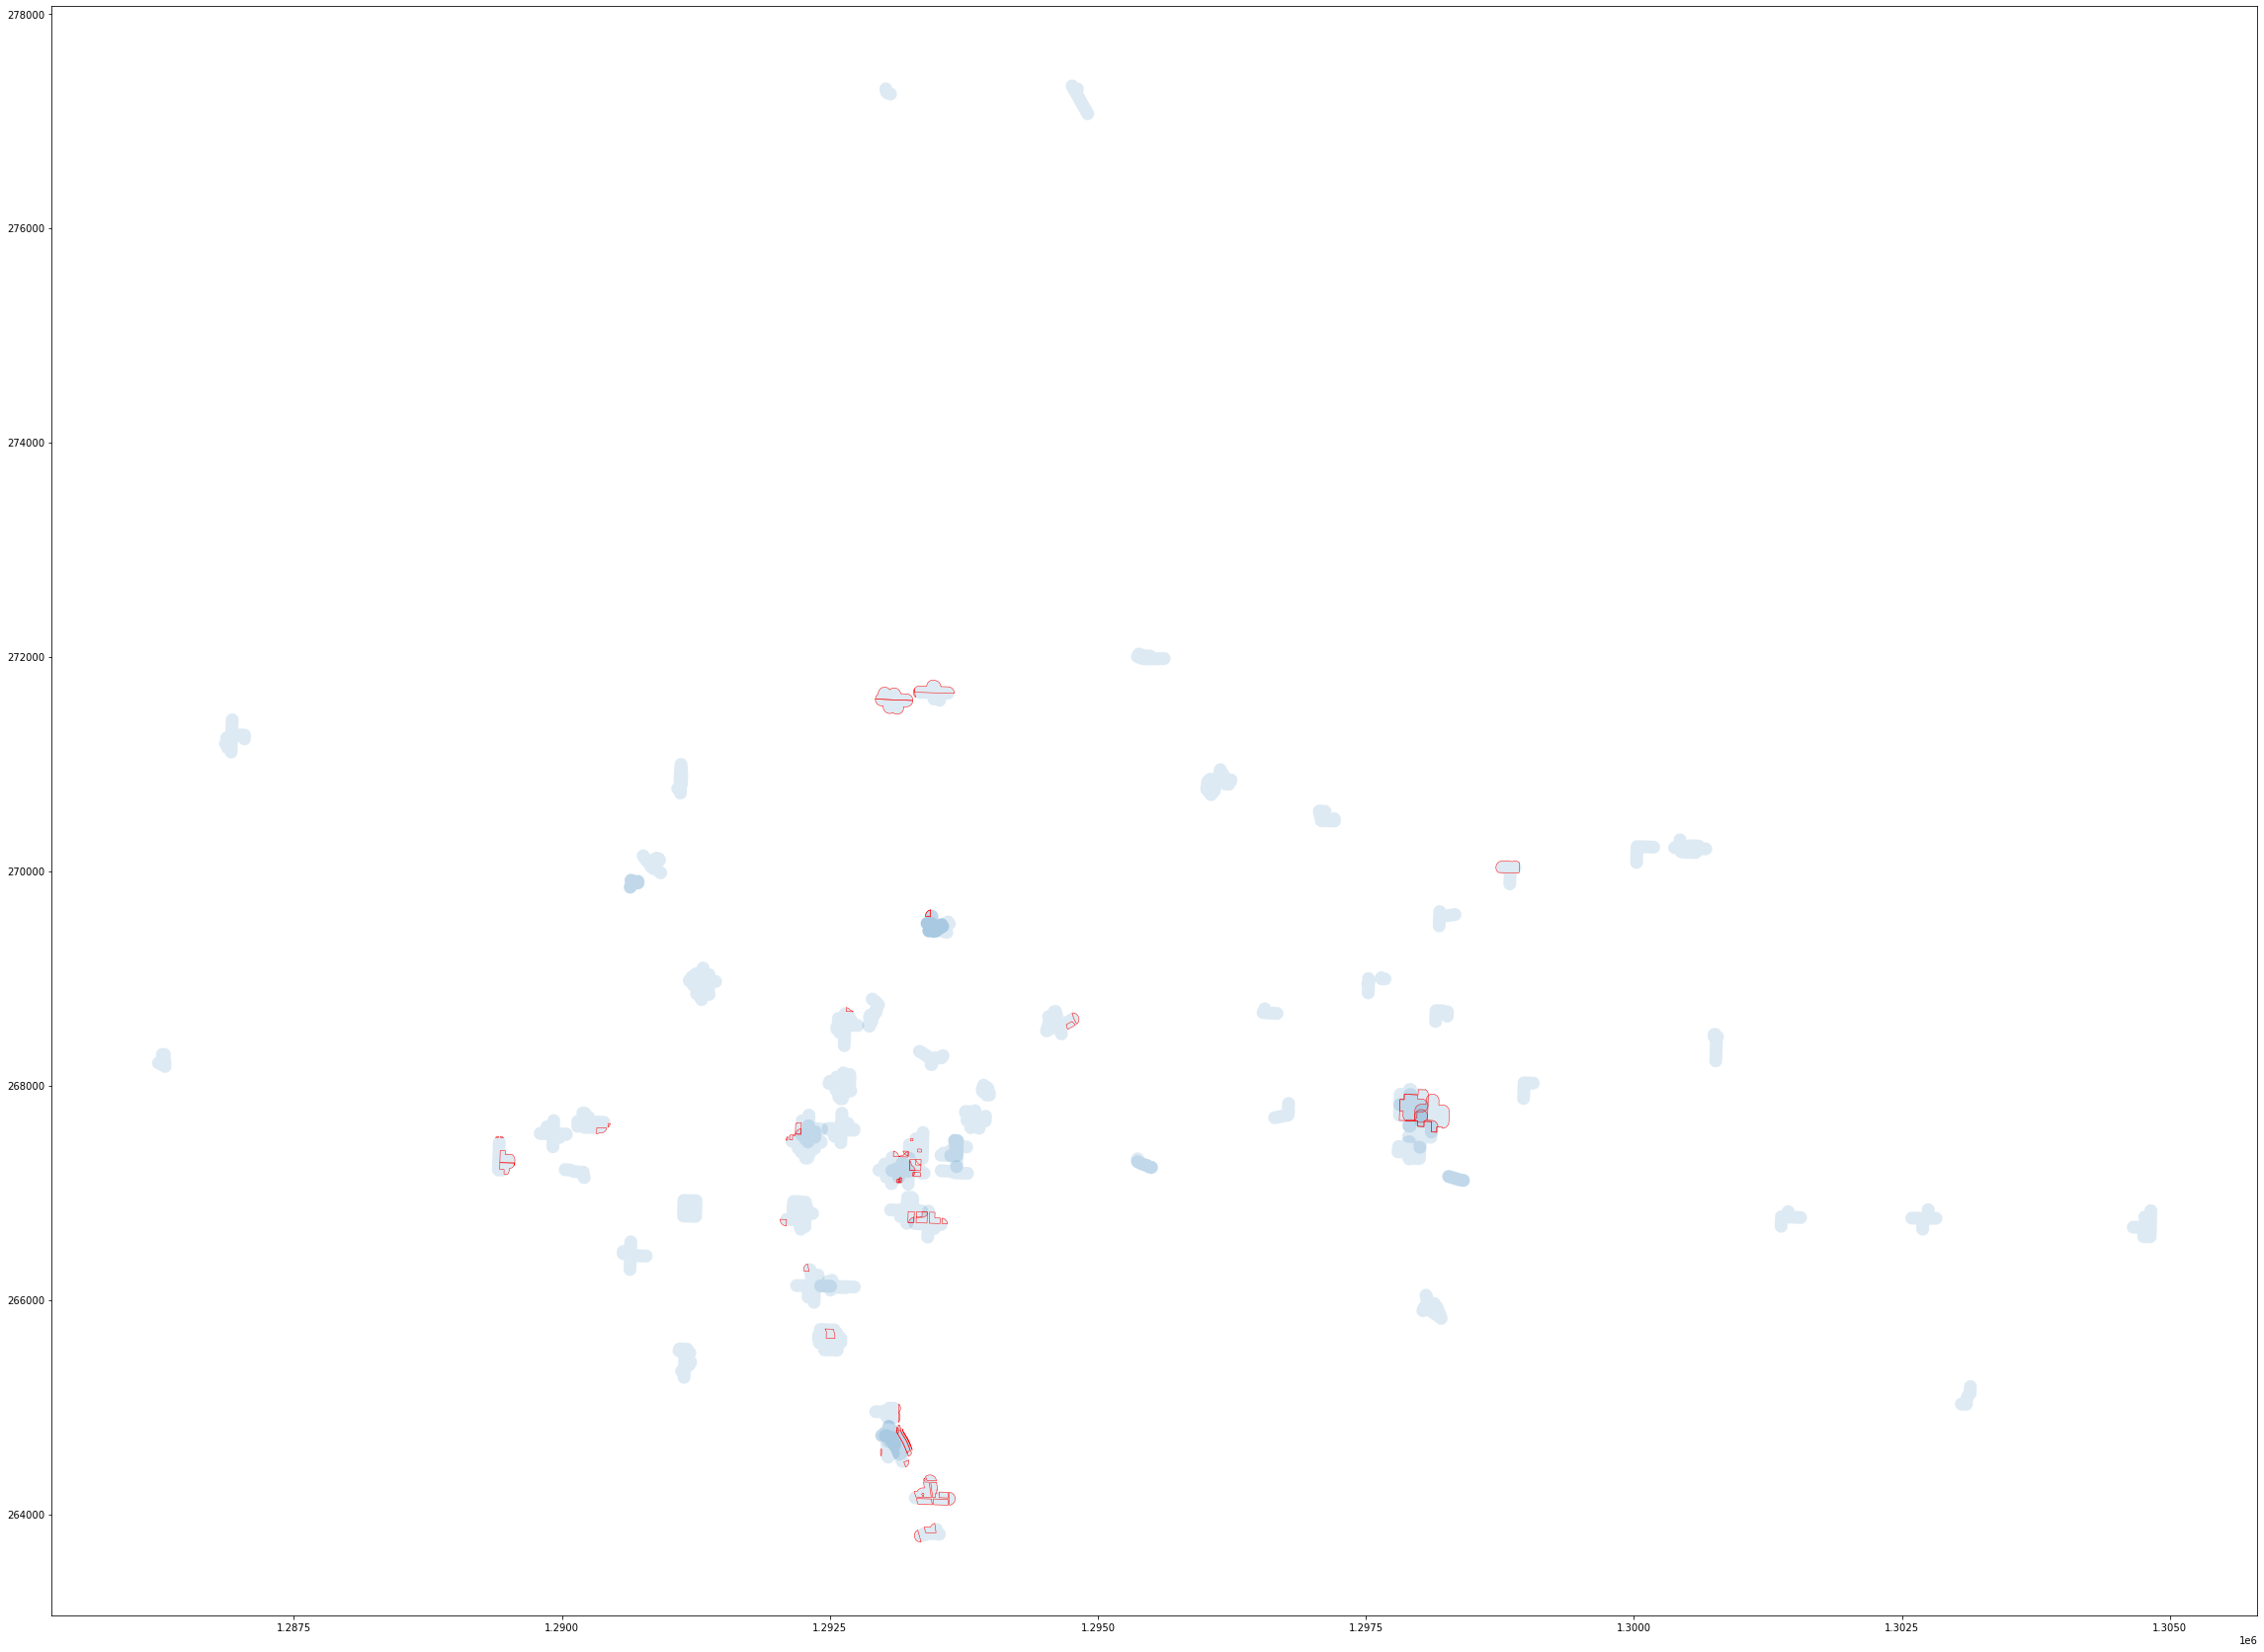

In [147]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [148]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

osm_id    Retail Area
0    5486345.0   47972.076636
1    5497693.0    5913.742594
2   76792095.0  173041.152736
3   88379128.0   98090.279105
4  106993280.0  215166.282281

In [149]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

osm_id    Grass Area
0   5482102.0   2478.509847
1   5489898.0  26806.173672
2   5490152.0   6328.442729
3  76792095.0  38002.667082
4  76793404.0  88549.458227

In [150]:
output_grass.index

RangeIndex(start=0, stop=20, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [151]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((-123.11511 44.06993, -123.11502 44.0...
1  25125505  None  forest  POLYGON ((-123.11552 44.07244, -123.11557 44.0...
2  25126014  None   water  POLYGON ((-123.11880 44.08418, -123.11888 44.0...
3  76923818  None  forest  POLYGON ((-123.06730 44.05090, -123.06726 44.0...
4  76923954  None  forest  POLYGON ((-123.04930 44.04564, -123.04901 44.0...

In [152]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2839)
nature_proj.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290536.901 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290500.193 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.218 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295740.552 ...

In [153]:
#nature_proj.plot()

<AxesSubplot:>

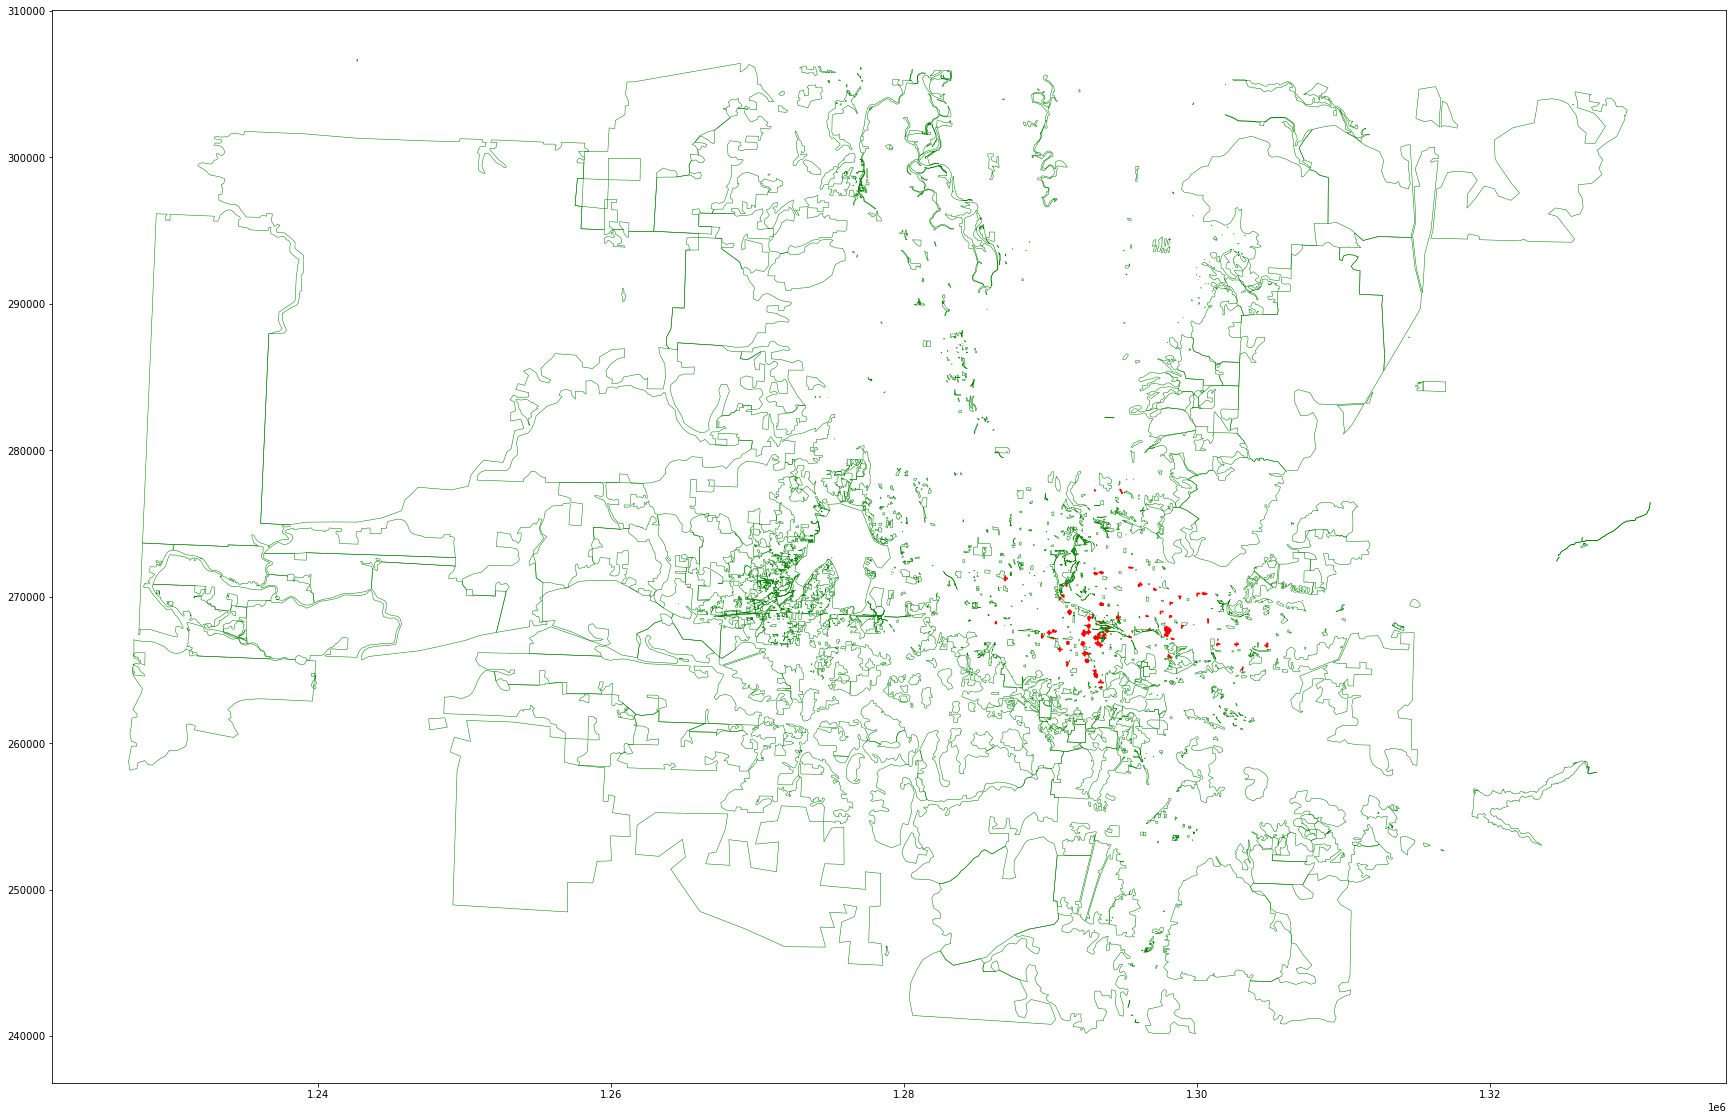

In [154]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [155]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

osm_id  name    type                                           geometry  \
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290536.901 ...   
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290500.193 ...   
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...   
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.218 ...   
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295740.552 ...   

                                           geometry2  
0  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
1  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
2  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
3  POLYGON ((1294293.505 268011.582, 1294296.302 ...  
4  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [156]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

osm_id  name    type                                          geometry2
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [157]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [158]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

osm_id                     name    type  \
11   108064148   West D Street Greenway    park   
58   124089910                     None  forest   
61   124089915      Amazon Field Forest  forest   
62   124093757                     None  forest   
64   124946158  Skinner Butte City Park    park   
69   124950785       Maurie Jacobs Park    park   
70   124950990    Delta Ponds City Park    park   
71   155182809                     None   water   
94   202177716         Willamalane Park    park   
117  203508841                     None  forest   

                                              geometry  
11   POLYGON ((1296671.942 267676.663, 1296611.204 ...  
58   POLYGON ((1292592.911 266112.269, 1292619.636 ...  
61   POLYGON ((1292566.011 265743.805, 1292569.154 ...  
62   POLYGON ((1292547.984 266106.332, 1292547.836 ...  
64   POLYGON ((1292912.769 268848.992, 1292929.244 ...  
69   POLYGON ((1290727.785 269935.431, 1290769.624 ...  
70   POLYGON ((1291126.001 270890.903, 1291106.575 ...  
71   POLYGON ((1293717.823 267734.189, 1293730.906 ...  
94   POLYGON ((1299071.477 268030.015, 1298967.410 ...  
117  POLYGON ((1293494.926 268187.783, 1293463.390 ...

In [159]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   
4  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
1  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
3  Eugene             3.0  144.877612   2.301370   0.767123   2105.0   
4  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   

    latitude   longitude             comment  osm_id_sensor buff_dist  \
0  44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
1  44.042515 -123.119532  corrected STL zone    123498508.0       0.1   
2  44.044462 -123.052792                 NaN    106993273.0       0.1   
3  44.044164 -123.050040                 NaN    439237025.0       0.1   
4  44.068013 -123.110896                 NaN    107098076.0       0.1   

   buffer_area     osm_id                name    type  \
0     0.014500  848208862  Garfield City Park    park   
1     0.014500  848208902                None    park   
2     0.012106  706229237                None  forest   
3     0.010951  706229237                None  forest   
4     0.019742  665388837                None  forest   

                                            geometry  
0  POLYGON ((1289973.621 267196.438, 1289972.023 ...  
1  POLYGON ((1290263.569 267165.913, 1290265.814 ...  
2  POLYGON ((1295313.671 267268.371, 1295312.603 ...  
3  POLYGON ((1295313.671 267268.371, 1295312.603 ...  
4  POLYGON ((1290713.321 270182.179, 1290717.302 ...

In [160]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head(5)

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  S113EUG         Viaduct East of Knickerbocker Bridge  short-term  2019   
4  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  144.877612   2.301370   0.767123   2105.0  ...   
4  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   

    longitude             comment osm_id_sensor  buff_dist buffer_area  \
0 -123.119532  corrected STL zone   123498508.0        0.1    0.014500   
1 -123.119532  corrected STL zone   123498508.0        0.1    0.014500   
2 -123.052792                 NaN   106993273.0        0.1    0.012106   
3 -123.050040                 NaN   439237025.0        0.1    0.010951   
4 -123.110896                 NaN   107098076.0        0.1    0.019742   

      osm_id                name    type  \
0  848208862  Garfield City Park    park   
1  848208902                None    park   
2  706229237                None  forest   
3  706229237                None  forest   
4  665388837                None  forest   

                                            geometry          Area  
0  POLYGON ((1289973.621 267196.438, 1289972.023 ...  81495.424175  
1  POLYGON ((1290263.569 267165.913, 1290265.814 ...   3971.718233  
2  POLYGON ((1295313.671 267268.371, 1295312.603 ...   6881.201790  
3  POLYGON ((1295313.671 267268.371, 1295312.603 ...   6881.039917  
4  POLYGON ((1290713.321 270182.179, 1290717.302 ...  62202.281526  

[5 rows x 21 columns]

<AxesSubplot:>

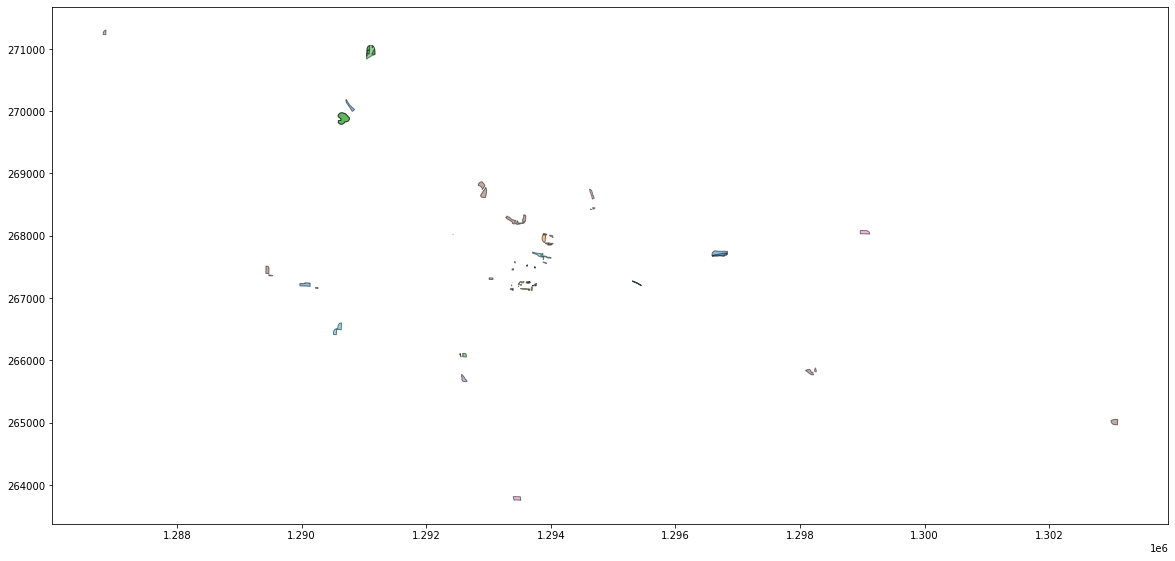

In [161]:
inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [162]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

osm_id_sensor    type           Area
0      5489898.0  forest   53373.088775
1      5497693.0    park   63861.178501
2      5507042.0  forest    6322.599129
3      5507042.0   water   43249.981705
4     29249558.0  forest  142513.310804

In [163]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

osm_id      Park Area
0    5497693.0   63861.178501
1   76793404.0    3096.347941
2   76938678.0    1542.009860
3   77347777.0   58033.497422
4  106993267.0  225093.112116

In [164]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

osm_id    Water Area
0    5507042.0  43249.981705
1  106993267.0  77019.302371
2  439247833.0  64947.006188

In [165]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

osm_id    Forest Area
0   5489898.0   53373.088775
1   5507042.0    6322.599129
2  29249558.0  142513.310804
3  76792095.0    6354.805433
4  76793404.0   49853.946017

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [166]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head(5)

osm_id timestamp                              name             type  \
0  36923388      None                              None           switch   
1  38407075      None                              None   turning_circle   
2  39411767      None  North Fork Smith River Trailhead          parking   
3  39649617      None                              None   turning_circle   
4  39649659      None                              None  traffic_signals   

                      geometry  
0  POINT (-123.29798 44.33904)  
1  POINT (-122.95975 44.04104)  
2  POINT (-123.82831 43.87484)  
3  POINT (-122.89622 44.04123)  
4  POINT (-123.09733 44.05323)

In [167]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2839)
pts_proj.head(10)

osm_id timestamp                              name             type  \
0  36923388      None                              None           switch   
1  38407075      None                              None   turning_circle   
2  39411767      None  North Fork Smith River Trailhead          parking   
3  39649617      None                              None   turning_circle   
4  39649659      None                              None  traffic_signals   
5  39649660      None                              None  traffic_signals   
6  39649662      None                              None  traffic_signals   
7  39649668      None                              None  traffic_signals   
8  39649725      None                              None  traffic_signals   
9  39651674      None                              None  traffic_signals   

                         geometry  
0  POINT (1276886.066 300604.651)  
1  POINT (1302876.067 266657.889)  
2  POINT (1232567.874 250611.592)  
3  POINT (1307966.627 266531.918)  
4  POINT (1291896.251 268344.866)  
5  POINT (1291893.511 268222.688)  
6  POINT (1291889.024 268088.125)  
7  POINT (1291876.991 267731.526)  
8  POINT (1291827.518 265340.281)  
9  POINT (1298102.033 267372.245)

<AxesSubplot:>

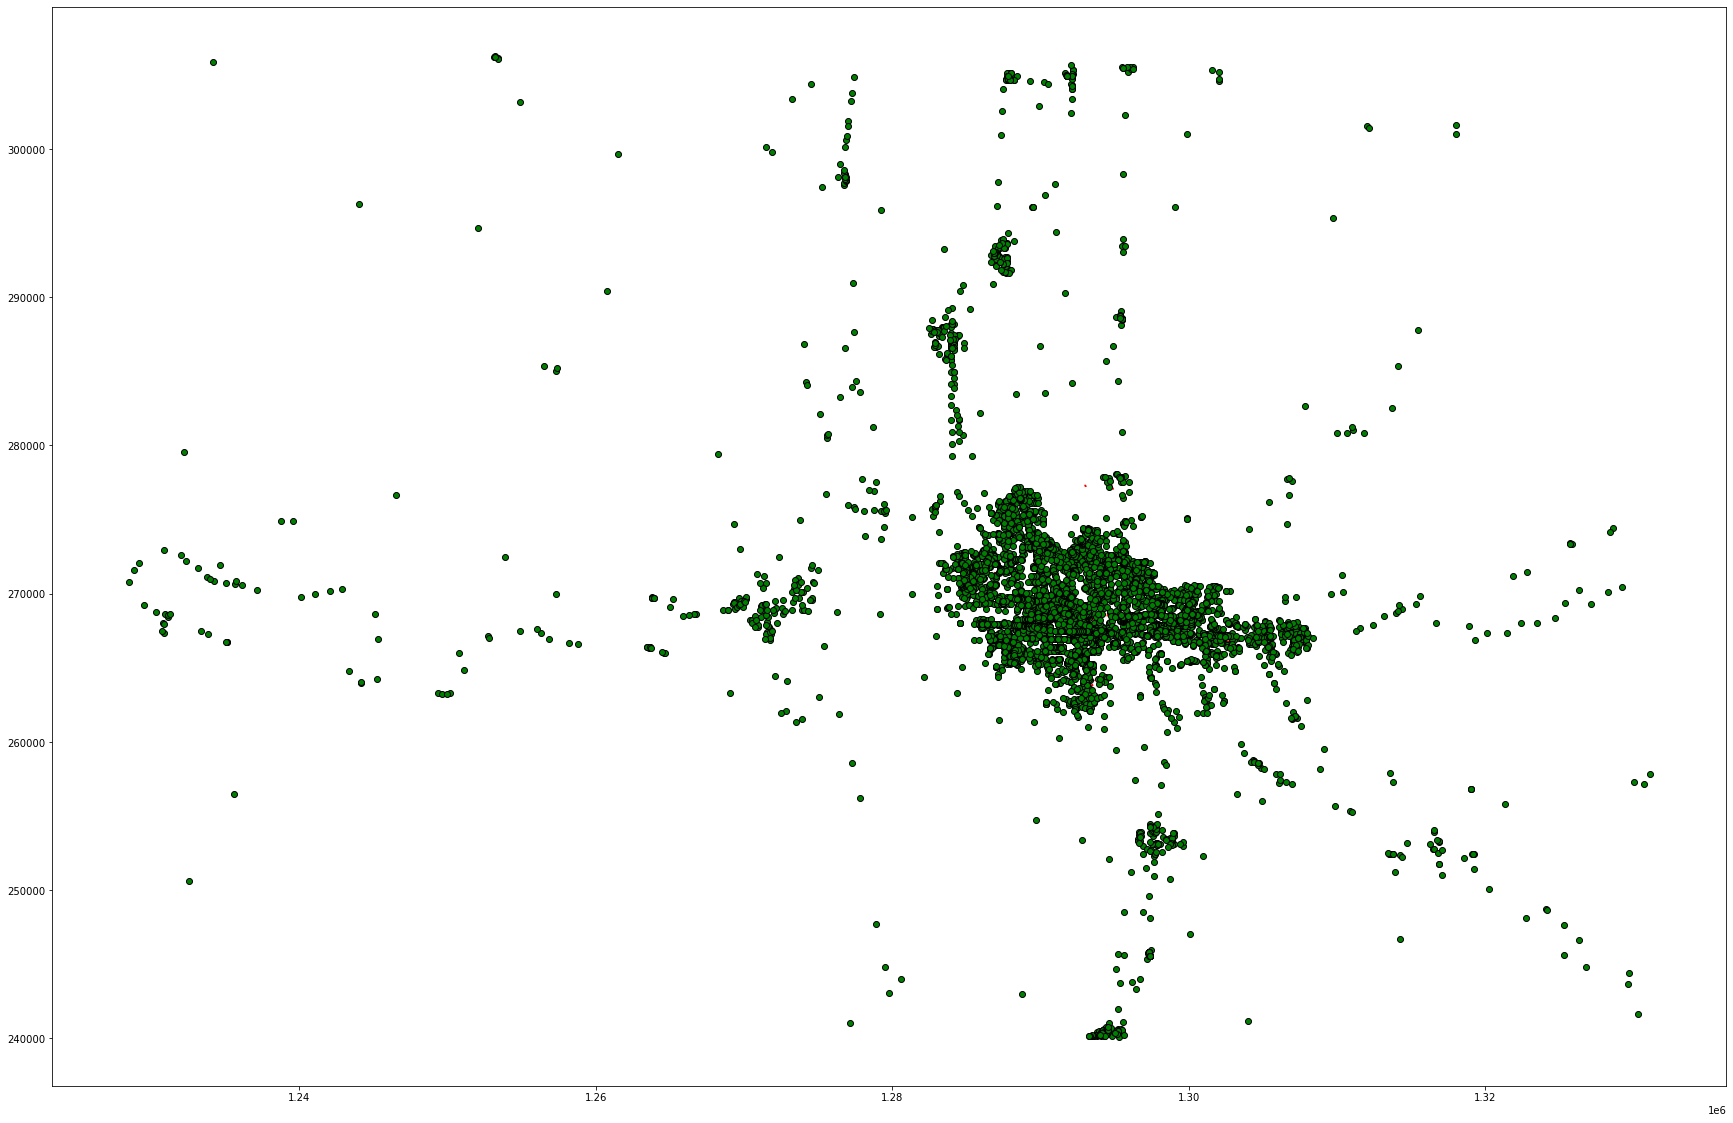

In [168]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [169]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head(10)

osm_id timestamp  name              type  \
10   39651691      None  None              stop   
16   39663229      None  None  motorway_junctio   
17   39663242      None  None   traffic_signals   
18   39663334      None  None   traffic_signals   
254  40000490      None  None   traffic_signals   
260  40002407      None  None   traffic_signals   
261  40002409      None  None   traffic_signals   
263  40002826      None  None   traffic_signals   
264  40002833      None  None   traffic_signals   
265  40002838      None  None   traffic_signals   

                           geometry  
10   POINT (1298121.397 267860.110)  
16   POINT (1292701.098 268150.214)  
17   POINT (1292728.925 268074.638)  
18   POINT (1292632.646 268320.427)  
254  POINT (1292526.284 266127.680)  
260  POINT (1292495.952 267959.445)  
261  POINT (1292618.318 267953.682)  
263  POINT (1292623.121 268076.897)  
264  POINT (1292611.555 267708.978)  
265  POINT (1292602.115 267466.624)

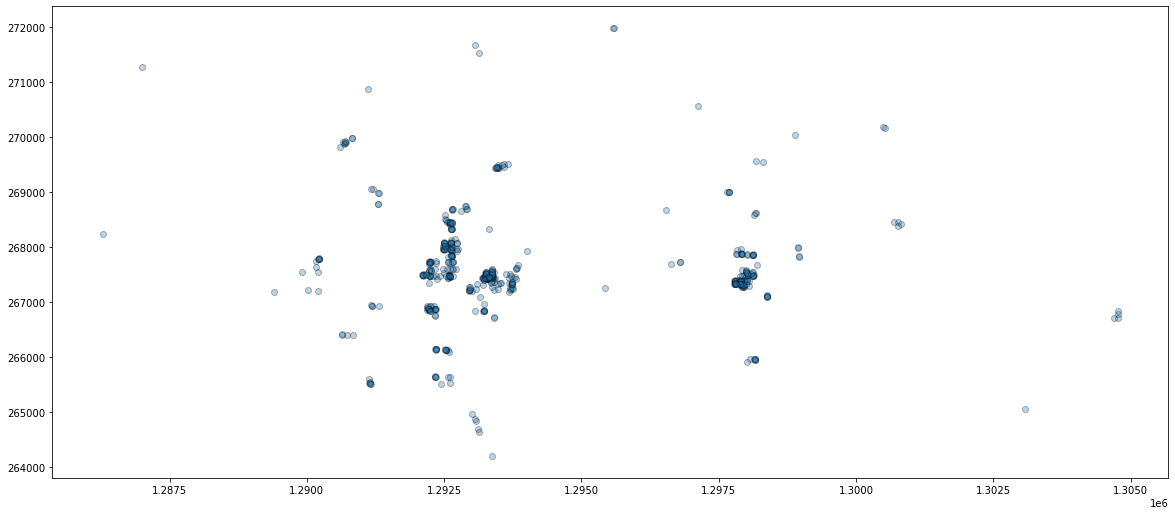

In [170]:
ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [171]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

site_id                                site_name sensor_type  year  region  \
0  P001EUG         Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG         Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P002EUG              Millrace Path @ Booth Kelly   permanent  2019  Eugene   
3  S088EUG  Mill Race Path at Booth Kelly Trailhead  short-term  2019  Eugene   
4  P002EUG              Millrace Path @ Booth Kelly   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0  513.408379  12.575342   3.780822    985.0  ... -123.119532   
1             2.0  513.408379  12.575342   3.780822    985.0  ... -123.119532   
2             3.0  109.807738   7.780822   2.397260    203.0  ... -123.015499   
3             3.0  111.398166   7.780822   2.397260    203.0  ... -123.015479   
4             3.0  109.807738   7.780822   2.397260    203.0  ... -123.015499   

              comment osm_id_sensor  buff_dist buffer_area      osm_id  \
0  corrected STL zone   123498508.0        0.1     0.01450  1417680987   
1  corrected STL zone   123498508.0        0.1     0.01450  1253758275   
2                 NaN   618082822.0        0.1     0.01094  2111265556   
3                 NaN   618082822.0        0.1     0.01094  2111265556   
4                 NaN   618082822.0        0.1     0.01094 -2075930806   

   timestamp                   name          type  \
0       None                   None      crossing   
1       None                   None  waste_basket   
2       None  Booth Kelly Trailhead     trailhead   
3       None  Booth Kelly Trailhead     trailhead   
4       None                   None   picnic_site   

                         geometry  
0  POINT (1290198.319 267192.686)  
1  POINT (1290026.269 267214.344)  
2  POINT (1298381.095 267119.046)  
3  POINT (1298381.095 267119.046)  
4  POINT (1298375.500 267095.870)  

[5 rows x 21 columns]

# Calculate the bicycle parking

In [172]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


site_id                            site_name sensor_type  year  region  \
33  P008EUG                      Greenway Bridge   permanent  2019  Eugene   
34  S102EUG  South Bank Trail at Greenway Bridge  short-term  2019  Eugene   
68  S002EUG  12th Ave Path East of Willamette St  short-term  2019  Eugene   
73  S002EUG  12th Ave Path East of Willamette St  short-term  2019  Eugene   
74  S002EUG  12th Ave Path East of Willamette St  short-term  2019  Eugene   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
33             2.0  538.194643  19.520548   8.972603   3147.0  ...   
34             2.0  387.263656  21.520548   7.698630   2832.0  ...   
68             2.0  180.006727   0.986301   0.547945    743.0  ...   
73             2.0  180.006727   0.986301   0.547945    743.0  ...   
74             2.0  180.006727   0.986301   0.547945    743.0  ...   

     longitude  comment osm_id_sensor  buff_dist buffer_area      osm_id  \
33 -123.112616      NaN   106993288.0        0.1    0.010342 -1413597815   
34 -123.112656      NaN   706527591.0        0.1    0.010342 -1413597815   
68 -123.092231      NaN   129170725.0        0.1    0.028190   658960691   
73 -123.092231      NaN   129170725.0        0.1    0.028190 -1900467399   
74 -123.092231      NaN   129170725.0        0.1    0.028190 -1838864245   

    timestamp  name             type                        geometry  
33       None  None  bicycle_parking  POINT (1290597.265 269826.279)  
34       None  None  bicycle_parking  POINT (1290597.265 269826.279)  
68       None  None  bicycle_parking  POINT (1292222.637 267725.603)  
73       None  None  bicycle_parking  POINT (1292235.742 267703.942)  
74       None  None  bicycle_parking  POINT (1292249.124 267743.026)  

[5 rows x 21 columns]

In [173]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

osm_id  Bicycle Parking
0    5490868.0                5
1   76792095.0               15
2   76938678.0                1
3   97521582.0                1
4  106993288.0                1

# Calculate bus stops

In [174]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

site_id                               site_name sensor_type  year  \
159  S004EUG  13th Ave East of Kincaid St both sides  short-term  2019   
160  S004EUG  13th Ave East of Kincaid St both sides  short-term  2019   
161  S004EUG  13th Ave East of Kincaid St both sides  short-term  2019   
162  S004EUG  13th Ave East of Kincaid St both sides  short-term  2019   
163  S004EUG  13th Ave East of Kincaid St both sides  short-term  2019   

     region  travel_pattern        AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
159  Eugene             2.0  1589.852696  7.178082   4.164384   2016.0  ...   
160  Eugene             2.0  1589.852696  7.178082   4.164384   2016.0  ...   
161  Eugene             2.0  1589.852696  7.178082   4.164384   2016.0  ...   
162  Eugene             2.0  1589.852696  7.178082   4.164384   2016.0  ...   
163  Eugene             2.0  1589.852696  7.178082   4.164384   2016.0  ...   

     longitude  comment osm_id_sensor  buff_dist buffer_area      osm_id  \
159 -123.07848      NaN    76792095.0        0.1    0.024513 -1678782373   
160 -123.07848      NaN    76792095.0        0.1    0.024513 -1678782372   
161 -123.07848      NaN    76792095.0        0.1    0.024513 -1678782371   
162 -123.07848      NaN    76792095.0        0.1    0.024513 -1678782370   
163 -123.07848      NaN    76792095.0        0.1    0.024513 -1678782369   

     timestamp                                  name      type  \
159       None  University of Oregon Station - Bay A  bus_stop   
160       None                Approaching UO Station  bus_stop   
161       None  University of Oregon Station - Bay D  bus_stop   
162       None                U of O Station - South  bus_stop   
163       None  University of Oregon Station - Bay C  bus_stop   

                           geometry  
159  POINT (1293374.524 267462.945)  
160  POINT (1293345.259 267444.003)  
161  POINT (1293376.065 267527.830)  
162  POINT (1293350.457 267363.113)  
163  POINT (1293374.996 267506.141)  

[5 rows x 21 columns]

In [175]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

osm_id  Bus Stops
0  5453222.0          2
1  5483853.0          2
2  5485965.0          1
3  5489866.0          1
4  5490868.0          2

# Calculate school/college/university

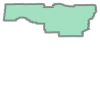

In [176]:
#sc= inter_pts[inter_pts['type'].str.contains('school|college')]
#sc
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [177]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [178]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2839)
scl_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type addr:state amenity  ele  \
0  node/357317800  357317800         node         OR  school  313   
1   way/464684183  464684183          way        NaN  school  NaN   
2   way/465056794  465056794          way        NaN  school  NaN   
3   way/469008280  469008280          way        NaN  school  NaN   
4   way/469008282  469008282          way        NaN  school  NaN   

  gnis:county_id gnis:created gnis:edited gnis:feature_id  ... building  \
0            039   11/28/1980  08/20/2008         1152153  ...      NaN   
1            NaN          NaN         NaN             NaN  ...      NaN   
2            NaN          NaN         NaN             NaN  ...      NaN   
3            NaN          NaN         NaN             NaN  ...      NaN   
4            NaN          NaN         NaN             NaN  ...      NaN   

  source building:levels area name:es opening_hours wheelchair elevation ways  \
0    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
1    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
2    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
3    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
4    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   

  type  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 37 columns]

In [179]:
scl_proj['geometry']=scl_proj['geometry'].centroid
scl_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type addr:state amenity  ele  \
0  node/357317800  357317800         node         OR  school  313   
1   way/464684183  464684183          way        NaN  school  NaN   
2   way/465056794  465056794          way        NaN  school  NaN   
3   way/469008280  469008280          way        NaN  school  NaN   
4   way/469008282  469008282          way        NaN  school  NaN   

  gnis:county_id gnis:created gnis:edited gnis:feature_id  ... building  \
0            039   11/28/1980  08/20/2008         1152153  ...      NaN   
1            NaN          NaN         NaN             NaN  ...      NaN   
2            NaN          NaN         NaN             NaN  ...      NaN   
3            NaN          NaN         NaN             NaN  ...      NaN   
4            NaN          NaN         NaN             NaN  ...      NaN   

  source building:levels area name:es opening_hours wheelchair elevation ways  \
0    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
1    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
2    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
3    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   
4    NaN             NaN  NaN     NaN           NaN        NaN       NaN  NaN   

  type  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 37 columns]

In [180]:
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  S023EUG                         4th St South of B St  short-term  2019   
1  S123EUG  Main St north sidewalk east of Pioneer Pkwy  short-term  2019   
2  S060EUG                E Amazon Dr south of 39th Ave  short-term  2019   
3  S112EUG      Mill Race Path West of Autzen Connector  short-term  2019   
4  S112EUG      Mill Race Path West of Autzen Connector  short-term  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0   39.801973   1.424658   0.589041    480.0  ...   
1  Eugene             2.0   78.900929   1.315068   0.561644    818.0  ...   
2  Eugene             1.0  110.922154  12.342466   3.547945    831.0  ...   
3  Eugene             2.0  296.627627   1.493151   0.780822    490.0  ...   
4  Eugene             2.0  296.627627   1.493151   0.780822    490.0  ...   

   source  building:levels area  name:es opening_hours  wheelchair elevation  \
0     NaN              NaN  NaN      NaN           NaN         NaN       NaN   
1     NaN              NaN  NaN      NaN           NaN         NaN       NaN   
2     NaN              NaN  NaN      NaN           NaN         NaN       NaN   
3     NaN              NaN  NaN      NaN           NaN         NaN       NaN   
4     NaN              NaN  NaN      NaN           NaN         NaN       NaN   

   ways type                        geometry  
0   NaN  NaN  POINT (1298018.135 267403.265)  
1   NaN  NaN  POINT (1298018.135 267403.265)  
2   NaN  NaN  POINT (1293547.006 263862.624)  
3   NaN  NaN  POINT (1293916.645 267726.750)  
4   NaN  NaN  POINT (1293987.560 267756.106)  

[5 rows x 53 columns]

In [181]:
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0    5490868.0       1
1    5497693.0       1
2  435896157.0       1
3  439247833.0       2

# Closest distance to school

In [182]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance=output_school_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_school_distance.head()

osm_id  min_dist_to_school
0   123498508.0          628.532553
7   618082822.0          879.755548
14  106993273.0         5010.229468
21  107098076.0         2793.158332
28  680124010.0         1869.438425

In [184]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2839)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osm_id, college]
Index: []

# Closest distance to college

In [186]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance=output_college_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0   123498508.0          6934.212066
7   618082822.0         20933.140361
14  106993273.0         11170.247924
21  107098076.0          8094.508350
28  680124010.0          4950.178177

In [187]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2839)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  University
0   76938678.0           1
1  439247833.0           1
2  634471475.0           1

In [189]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Closest distance to university

In [190]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance=output_university_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_university_distance.head()

osm_id  min_dist_to_university
0   123498508.0            10591.197533
7   618082822.0            13217.559590
14  106993273.0             4992.440022
21  107098076.0            10941.097886
28  680124010.0             1647.205849

# Calculate OSM node density

In [191]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt


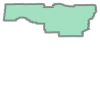

In [193]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon


In [194]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [195]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y           x  street_count highway  ref  \
osmid                                                        
38276093  43.517605 -122.744959             2     NaN  NaN   
38276096  43.517791 -122.744599             2     NaN  NaN   
38276126  43.519899 -122.741529             3     NaN  NaN   
39117945  43.520993 -122.741372             1     NaN  NaN   
39117959  43.522682 -122.742025             2     NaN  NaN   

                             geometry  
osmid                                  
38276093  POINT (-122.74496 43.51760)  
38276096  POINT (-122.74460 43.51779)  
38276126  POINT (-122.74153 43.51990)  
39117945  POINT (-122.74137 43.52099)  
39117959  POINT (-122.74203 43.52268)

In [196]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=2839)
node_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count highway  ref  \
osmid                                                        
38276093  43.517605 -122.744959             2     NaN  NaN   
38276096  43.517791 -122.744599             2     NaN  NaN   
38276126  43.519899 -122.741529             3     NaN  NaN   
39117945  43.520993 -122.741372             1     NaN  NaN   
39117959  43.522682 -122.742025             2     NaN  NaN   

                                geometry  
osmid                                     
38276093  POINT (1318526.550 208040.407)  
38276096  POINT (1318556.207 208060.349)  
38276126  POINT (1318810.582 208287.781)  
39117945  POINT (1318826.482 208408.957)  
39117959  POINT (1318778.766 208597.927)

In [197]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count highway  ref  \
osmid                                                        
39651677  44.047060 -123.019547             4     NaN  NaN   
39651688  44.049689 -123.019507             4     NaN  NaN   
39651691  44.050580 -123.019497             4    stop  NaN   
39651709  44.057226 -123.019422             3     NaN  NaN   
39651711  44.058136 -123.019405             3     NaN  NaN   

                                geometry  
osmid                                     
39651677  POINT (1298105.642 267469.261)  
39651688  POINT (1298117.634 267761.186)  
39651691  POINT (1298121.397 267860.110)  
39651709  POINT (1298149.576 268598.032)  
39651711  POINT (1298154.027 268699.048)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


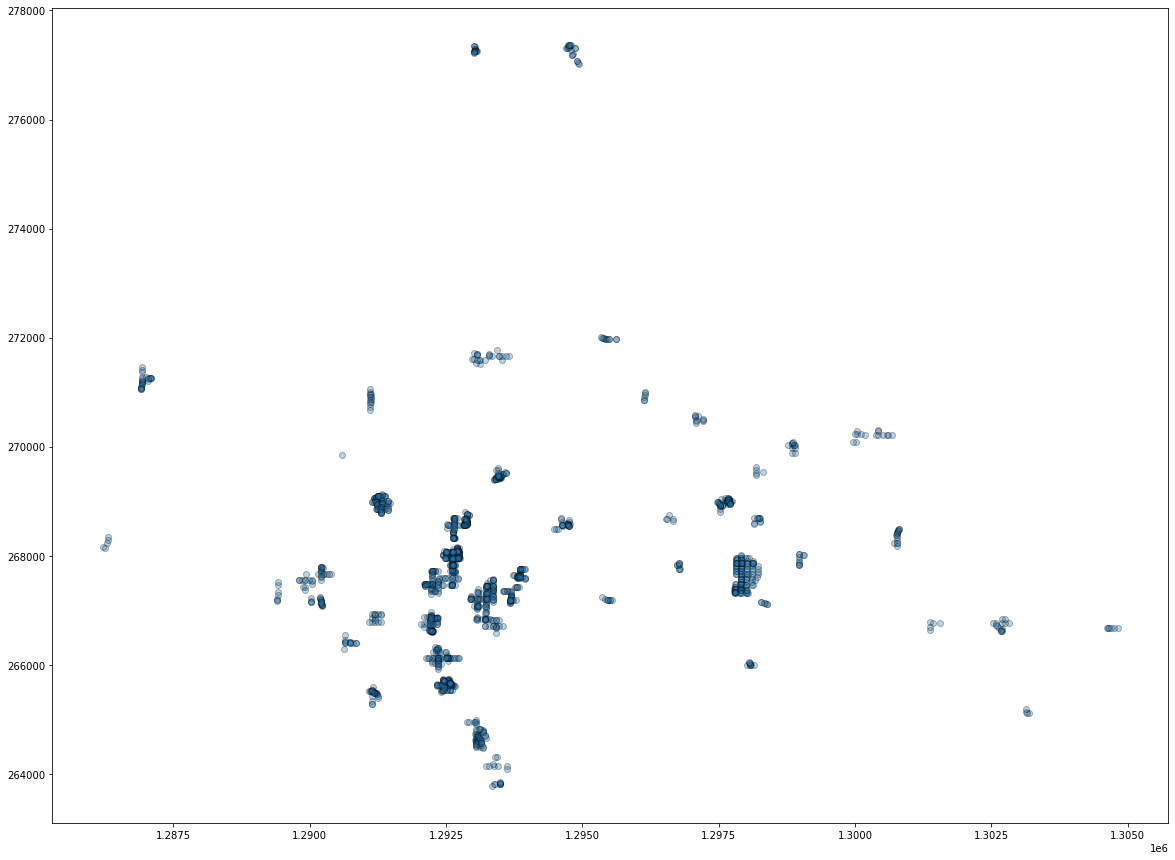

In [198]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [199]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...   
1             2.0  513.408379  12.575342   3.780822    985.0  ...   
2             2.0  513.408379  12.575342   3.780822    985.0  ...   
3             2.0  513.408379  12.575342   3.780822    985.0  ...   
4             2.0  513.408379  12.575342   3.780822    985.0  ...   

              comment  osm_id_sensor buff_dist  buffer_area          y  \
0  corrected STL zone    123498508.0       0.1       0.0145  44.042723   
1  corrected STL zone    123498508.0       0.1       0.0145  44.042291   
2  corrected STL zone    123498508.0       0.1       0.0145  44.041614   
3  corrected STL zone    123498508.0       0.1       0.0145  44.041451   
4  corrected STL zone    123498508.0       0.1       0.0145  44.041754   

            x  street_count  highway  ref                        geometry  
0 -123.120167             1      NaN  NaN  POINT (1290030.244 267234.997)  
1 -123.118036             2      NaN  NaN  POINT (1290199.477 267181.756)  
2 -123.117796             2      NaN  NaN  POINT (1290216.374 267105.888)  
3 -123.117755             2      NaN  NaN  POINT (1290219.100 267087.671)  
4 -123.117840             2      NaN  NaN  POINT (1290213.329 267121.614)  

[5 rows x 22 columns]

In [200]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12=output_intersection_density.reset_index()
output_intersection_density12

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  geometry
0       5453222.0        26
1       5480007.0         5
2       5482102.0        78
3       5483853.0        48
4       5485472.0        12
..            ...       ...
66    667022978.0        38
67    680124010.0        22
68    688257916.0        39
69    706527591.0         1
70    721761539.0        50

[71 rows x 2 columns]

In [201]:
b_area=gdf1.loc[:,['osm_id_sensor','buffer_area']]
b_area

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffer_area
6      123498508.0     0.014500
13     618082822.0     0.010940
20     106993273.0     0.012106
27     107098076.0     0.019742
34     680124010.0     0.031334
..             ...          ...
517     97521582.0     0.018103
524     97521582.0     0.025139
531    435896157.0     0.026104
538    721761539.0     0.036385
545    366409020.0     0.018198

[77 rows x 2 columns]

In [202]:
output_intersection_density1=pd.merge(output_intersection_density12,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1["Intersection Density"]=output_intersection_density1["geometry"]/output_intersection_density1["buffer_area"]
output_intersection_density1=output_intersection_density1.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1.columns=['osm_id','OSM_node_Density']
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  5453222.0        773.543351
1  5480007.0        275.071635
2  5482102.0       2171.353488
3  5483853.0       1497.023460
4  5485472.0        520.619429

# Calculate the intersection density

In [203]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2839)
nodea_proj.head(5)

y           x  street_count highway  \
osmid                                                   
38276126  43.519899 -122.741529             3     NaN   
39117945  43.520993 -122.741372             1     NaN   
39129047  43.525291 -122.751583             1     NaN   
39649889  43.800787 -122.558013             3     NaN   
39655486  43.749060 -122.446914             3     NaN   

                                geometry  
osmid                                     
38276126  POINT (1318810.582 208287.781)  
39117945  POINT (1318826.482 208408.957)  
39129047  POINT (1318014.181 208908.380)  
39649889  POINT (1334408.513 239103.632)  
39655486  POINT (1343212.541 233144.460)

In [205]:
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
output_intersection_densitya= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12a=output_intersection_densitya.reset_index()
output_intersection_density1a=pd.merge(output_intersection_density12a,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1a["Intersection Density"]=output_intersection_density1a["geometry"]/output_intersection_density1a["buffer_area"]
output_intersection_density1a=output_intersection_density1a.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1a.columns=['osm_id','Intersection_Density']
output_intersection_density1a.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Intersection_Density
0  5453222.0            238.013339
1  5480007.0            165.042981
2  5482102.0            278.378652
3  5483853.0            530.195809
4  5485472.0            347.079619

# Calculate the Number of Lanes

In [206]:
edges.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid       highway  oneway  length  \
u        v          key                                            
38276093 38276096   0      5354848  unclassified   False  35.688   
         4725896975 0    479498492  unclassified   False  25.024   
38276096 4725861911 0      5354848  unclassified   False  29.390   
         38276093   0      5354848  unclassified   False  35.688   
38276126 4725861925 0      5354848  unclassified   False  27.354   
         4725861924 0      5354848  unclassified   False   7.260   
         39831068   0      5464839  unclassified   False  83.071   
39117945 39831070   0      5464839  unclassified   False  32.006   
39117959 4725861945 0      5354848  unclassified   False  12.897   
         39411874   0      5436324  unclassified   False  12.315   

                                                        name  ref lanes  \
u        v          key                                                   
38276093 38276096   0                                    NaN  NaN   NaN   
         4725896975 0                            Blm Road 26  NaN   NaN   
38276096 4725861911 0                                    NaN  NaN   NaN   
         38276093   0                                    NaN  NaN   NaN   
38276126 4725861925 0                                    NaN  NaN   NaN   
         4725861924 0                                    NaN  NaN   NaN   
         39831068   0                                    NaN  NaN   NaN   
39117945 39831070   0                                    NaN  NaN   NaN   
39117959 4725861945 0                                    NaN  NaN   NaN   
         39411874   0    National Forest Development Road 23  NaN   NaN   

                        bridge maxspeed access tunnel junction service  \
u        v          key                                                  
38276093 38276096   0      NaN      NaN    NaN    NaN      NaN     NaN   
         4725896975 0      NaN      NaN    NaN    NaN      NaN     NaN   
38276096 4725861911 0      NaN      NaN    NaN    NaN      NaN     NaN   
         38276093   0      NaN      NaN    NaN    NaN      NaN     NaN   
38276126 4725861925 0      NaN      NaN    NaN    NaN      NaN     NaN   
         4725861924 0      NaN      NaN    NaN    NaN      NaN     NaN   
         39831068   0      NaN      NaN    NaN    NaN      NaN     NaN   
39117945 39831070   0      NaN      NaN    NaN    NaN      NaN     NaN   
39117959 4725861945 0      NaN      NaN    NaN    NaN      NaN     NaN   
         39411874   0      NaN      NaN    NaN    NaN      NaN     NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (-122.74496 43.51760, -122.74460 43...  
         4725896975 0    LINESTRING (-122.74496 43.51760, -122.74511 43...  
38276096 4725861911 0    LINESTRING (-122.74460 43.51779, -122.74428 43...  
         38276093   0    LINESTRING (-122.74460 43.51779, -122.74496 43...  
38276126 4725861925 0    LINESTRING (-122.74153 43.51990, -122.74119 43...  
         4725861924 0    LINESTRING (-122.74153 43.51990, -122.74162 43...  
         39831068   0    LINESTRING (-122.74153 43.51990, -122.74112 43...  
39117945 39831070   0    LINESTRING (-122.74137 43.52099, -122.74109 43...  
39117959 4725861945 0    LINESTRING (-122.74203 43.52268, -122.74204 43...  
         39411874   0    LINESTRING (-122.74203 43.52268, -122.74195 43...

In [207]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=2839)
edge_proj.head(5)

osmid       highway  oneway  length         name  \
u        v          key                                                         
38276093 38276096   0      5354848  unclassified   False  35.688          NaN   
         4725896975 0    479498492  unclassified   False  25.024  Blm Road 26   
38276096 4725861911 0      5354848  unclassified   False  29.390          NaN   
         38276093   0      5354848  unclassified   False  35.688          NaN   
38276126 4725861925 0      5354848  unclassified   False  27.354          NaN   

                         ref lanes bridge maxspeed access tunnel junction  \
u        v          key                                                     
38276093 38276096   0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
         4725896975 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
38276096 4725861911 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
         38276093   0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   
38276126 4725861925 0    NaN   NaN    NaN      NaN    NaN    NaN      NaN   

                        service  \
u        v          key           
38276093 38276096   0       NaN   
         4725896975 0       NaN   
38276096 4725861911 0       NaN   
         38276093   0       NaN   
38276126 4725861925 0       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (1318526.550 208040.407, 1318556.20...  
         4725896975 0    LINESTRING (1318526.550 208040.407, 1318513.68...  
38276096 4725861911 0    LINESTRING (1318556.207 208060.349, 1318582.05...  
         38276093   0    LINESTRING (1318556.207 208060.349, 1318526.55...  
38276126 4725861925 0    LINESTRING (1318810.582 208287.781, 1318837.85...

In [209]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid   highway  oneway   length  \
u        v          key                                         
39653013 2093287338 0    199327000   primary   False  188.591   
         40247805   0    199327000   primary   False   88.691   
39655434 2832362065 0    278950369  tertiary   False   57.219   
         2832362066 0    278950369  tertiary   False   37.284   
39655445 2832362062 0    278950369  tertiary   False   36.698   
         40298252   0    278950369  tertiary   False  158.551   
39665812 40111231   0    199484603  tertiary   False   12.962   
         2822805631 0    199484603  tertiary   False   91.009   
39665829 40111175   0    199484603  tertiary   False   44.976   
         40111239   0    199484603  tertiary   False   66.791   

                                      name    ref lanes bridge maxspeed  \
u        v          key                                                   
39653013 2093287338 0     State Highway 58  OR 58     2    NaN      NaN   
         40247805   0     State Highway 58  OR 58     2    NaN      NaN   
39655434 2832362065 0    Aufderheide Drive  NF 19     2    NaN      NaN   
         2832362066 0    Aufderheide Drive  NF 19     2    NaN      NaN   
39655445 2832362062 0    Aufderheide Drive  NF 19     2    NaN      NaN   
         40298252   0    Aufderheide Drive  NF 19     2    NaN      NaN   
39665812 40111231   0    Aufderheide Drive  NF 19     2    NaN      NaN   
         2822805631 0    Aufderheide Drive  NF 19     2    NaN      NaN   
39665829 40111175   0    Aufderheide Drive  NF 19     2    NaN      NaN   
         40111239   0    Aufderheide Drive  NF 19     2    NaN      NaN   

                        access tunnel junction service  \
u        v          key                                  
39653013 2093287338 0      NaN    NaN      NaN     NaN   
         40247805   0      NaN    NaN      NaN     NaN   
39655434 2832362065 0      NaN    NaN      NaN     NaN   
         2832362066 0      NaN    NaN      NaN     NaN   
39655445 2832362062 0      NaN    NaN      NaN     NaN   
         40298252   0      NaN    NaN      NaN     NaN   
39665812 40111231   0      NaN    NaN      NaN     NaN   
         2822805631 0      NaN    NaN      NaN     NaN   
39665829 40111175   0      NaN    NaN      NaN     NaN   
         40111239   0      NaN    NaN      NaN     NaN   

                                                                  geometry  
u        v          key                                                     
39653013 2093287338 0    LINESTRING (1359452.054 224849.740, 1359530.89...  
         40247805   0    LINESTRING (1359452.054 224849.740, 1359414.21...  
39655434 2832362065 0    LINESTRING (1357891.514 247830.237, 1357834.37...  
         2832362066 0    LINESTRING (1357891.514 247830.237, 1357928.47...  
39655445 2832362062 0    LINESTRING (1357197.089 248005.603, 1357165.23...  
         40298252   0    LINESTRING (1357197.089 248005.603, 1357339.07...  
39665812 40111231   0    LINESTRING (1339892.997 235214.810, 1339898.03...  
         2822805631 0    LINESTRING (1339892.997 235214.810, 1339877.47...  
39665829 40111175   0    LINESTRING (1340058.432 235506.764, 1340088.05...  
         40111239   0    LINESTRING (1340058.432 235506.764, 1340014.94...

In [210]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
ecoshort_lane

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0    P001EUG                   Fern Ridge Path west of Chambers   permanent   
7    P002EUG                        Millrace Path @ Booth Kelly   permanent   
14   P003EUG        Southbank Path west of Knickerbocker Bridge   permanent   
21   P004EUG           North Bank Path south of Greenway Bridge   permanent   
28   P005EUG                            Alder north of 18th Ave   permanent   
..       ...                                                ...         ...   
504  S120EUG  Willamette St South of 18th Ave incl East Side...  short-term   
511  S121EUG                        Yolanda Ave East of 19th St  short-term   
525  S123EUG        Main St north sidewalk east of Pioneer Pkwy  short-term   
532  S125EUG     Willamette St North of 24th Ave incl Sidewalks  short-term   
539  S127EUG                     Southwood Ln West of Oakway Rd  short-term   

     year  region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0    2019  Eugene             2.0  513.408379  12.575342   3.780822    985.0   
7    2019  Eugene             3.0  109.807738   7.780822   2.397260    203.0   
14   2019  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
21   2019  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
28   2019  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   
..    ...     ...             ...         ...        ...        ...      ...   
504  2019  Eugene             2.0  246.548856   2.465753   1.410959   1341.0   
511  2019  Eugene             1.0   22.126375   3.561644   0.534247    273.0   
525  2019  Eugene             2.0   78.900929   1.315068   0.561644    818.0   
532  2019  Eugene             2.0  182.409439   2.547945   1.082192   2587.0   
539  2019  Eugene             2.0   92.537431   0.328767   0.232877   1013.0   

      latitude   longitude             comment  osm_id_sensor buff_dist  \
0    44.042515 -123.119532  corrected STL zone    123498508.0       2.0   
7    44.043919 -123.015499                 NaN    618082822.0       2.0   
14   44.044462 -123.052792                 NaN    106993273.0       2.0   
21   44.068013 -123.110896                 NaN    107098076.0       2.0   
28   44.040527 -123.080176                 NaN    680124010.0       2.0   
..         ...         ...                 ...            ...       ...   
504  44.039198 -123.092749                 NaN     88379128.0       2.0   
511  44.072399 -122.995862                 NaN     97521582.0       2.0   
525  44.046188 -123.021607                 NaN    435896157.0       2.0   
532  44.033776 -123.090958                 NaN    721761539.0       2.0   
539  44.063436 -123.079023                 NaN    366409020.0       2.0   

                           geometry  min_dist_to_school  min_dist_to_college  \
0    POINT (1290079.275 267211.026)          628.532553          6934.212066   
7    POINT (1298418.325 267111.279)          879.755548         20933.140361   
14   POINT (1295432.562 267262.083)         5010.229468         11170.247924   
21   POINT (1290859.454 270021.192)         2793.158332          8094.508350   
28   POINT (1293225.340 266892.292)         1869.438425          4950.178177   
..                              ...                 ...                  ...   
504  POINT (1292213.494 266775.829)         1730.159599          3645.712466   
511  POINT (1300085.791 270227.374)         1501.916153         27358.344982   
525  POINT (1297936.602 267378.037)          280.009633         19270.754428   
532  POINT (1292338.367 266169.128)         1219.316067          5673.048304   
539  POINT (1293396.138 269433.762)         1714.850204          6672.749963   

     min_dist_to_university lanes  
0              10591.197533     2  
7              13217.559590     2  
14              4992.440022     2  
21             10941.097886     2  
28              1647.205849     1  
..               

In [212]:
# The above lanes need manual cleaning as current aggregation is odd
#pd.DataFrame.to_csv(ecoshort_lane, 'lane_portland.csv', sep=',', na_rep='.', index=False)
# edit this file manually

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
# now import again after edit
#lane_modified=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/lane_portland1.csv")
#lane_modified

In [214]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane=output_lane.drop_duplicates(subset=['osm_id'],keep='first')
output_lane.head()

osm_id lanes
0   123498508.0     2
7   618082822.0     2
14  106993273.0     2
21  107098076.0     2
28  680124010.0     1

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [215]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [217]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [218]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [219]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid       highway  oneway   length  \
u        v          key                                             
38276093 38276096   0      5354848  unclassified   False   35.688   
         4725896976 0      5430117         track   False  104.774   
         4725896975 0    479498492  unclassified   False   25.024   
38276096 4725861911 0      5354848  unclassified   False   29.390   
         38276093   0      5354848  unclassified   False   35.688   

                                                name bridge  ref lanes access  \
u        v          key                                                         
38276093 38276096   0                            NaN    NaN  NaN   NaN    NaN   
         4725896976 0    Bureau of Land Mgmt Rd 11.0    NaN  NaN   NaN    NaN   
         4725896975 0                    Blm Road 26    NaN  NaN   NaN    NaN   
38276096 4725861911 0                            NaN    NaN  NaN   NaN    NaN   
         38276093   0                            NaN    NaN  NaN   NaN    NaN   

                        service width maxspeed tunnel cycleway junction  \
u        v          key                                                   
38276093 38276096   0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896976 0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896975 0       NaN   NaN      NaN    NaN      NaN      NaN   
38276096 4725861911 0       NaN   NaN      NaN    NaN      NaN      NaN   
         38276093   0       NaN   NaN      NaN    NaN      NaN      NaN   

                        cycleway:right cycleway:left est_width  \
u        v          key                                          
38276093 38276096   0              NaN           NaN       NaN   
         4725896976 0              NaN           NaN       NaN   
         4725896975 0              NaN           NaN       NaN   
38276096 4725861911 0              NaN           NaN       NaN   
         38276093   0              NaN           NaN       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (-122.74496 43.51760, -122.74460 43...  
         4725896976 0    LINESTRING (-122.74496 43.51760, -122.74625 43...  
         4725896975 0    LINESTRING (-122.74496 43.51760, -122.74511 43...  
38276096 4725861911 0    LINESTRING (-122.74460 43.51779, -122.74428 43...  
         38276093   0    LINESTRING (-122.74460 43.51779, -122.74496 43...

In [220]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2839)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid       highway  oneway   length  \
u        v          key                                             
38276093 38276096   0      5354848  unclassified   False   35.688   
         4725896976 0      5430117         track   False  104.774   
         4725896975 0    479498492  unclassified   False   25.024   
38276096 4725861911 0      5354848  unclassified   False   29.390   
         38276093   0      5354848  unclassified   False   35.688   

                                                name bridge  ref lanes access  \
u        v          key                                                         
38276093 38276096   0                            NaN    NaN  NaN   NaN    NaN   
         4725896976 0    Bureau of Land Mgmt Rd 11.0    NaN  NaN   NaN    NaN   
         4725896975 0                    Blm Road 26    NaN  NaN   NaN    NaN   
38276096 4725861911 0                            NaN    NaN  NaN   NaN    NaN   
         38276093   0                            NaN    NaN  NaN   NaN    NaN   

                        service width maxspeed tunnel cycleway junction  \
u        v          key                                                   
38276093 38276096   0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896976 0       NaN   NaN      NaN    NaN      NaN      NaN   
         4725896975 0       NaN   NaN      NaN    NaN      NaN      NaN   
38276096 4725861911 0       NaN   NaN      NaN    NaN      NaN      NaN   
         38276093   0       NaN   NaN      NaN    NaN      NaN      NaN   

                        cycleway:right cycleway:left est_width  \
u        v          key                                          
38276093 38276096   0              NaN           NaN       NaN   
         4725896976 0              NaN           NaN       NaN   
         4725896975 0              NaN           NaN       NaN   
38276096 4725861911 0              NaN           NaN       NaN   
         38276093   0              NaN           NaN       NaN   

                                                                  geometry  
u        v          key                                                     
38276093 38276096   0    LINESTRING (1318526.550 208040.407, 1318556.20...  
         4725896976 0    LINESTRING (1318526.550 208040.407, 1318421.74...  
         4725896975 0    LINESTRING (1318526.550 208040.407, 1318513.68...  
38276096 4725861911 0    LINESTRING (1318556.207 208060.349, 1318582.05...  
         38276093   0    LINESTRING (1318556.207 208060.349, 1318526.55...

In [221]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid   highway  oneway  length              name  \
u        v          key                                                        
39651677 1314763893 0    5453222  tertiary   False  49.495  North 5th Street   
         1314763886 0    5453222  tertiary   False  48.371  North 5th Street   
         4837557785 0    5483136  tertiary   False  24.282          A Street   
         40056323   0    5483136  tertiary   False  99.657          A Street   
39651688 1314763871 0    5453222  tertiary   False  49.283  North 5th Street   

                        bridge  ref lanes access service width maxspeed  \
u        v          key                                                   
39651677 1314763893 0      NaN  NaN   NaN    NaN     NaN   NaN      NaN   
         1314763886 0      NaN  NaN   NaN    NaN     NaN   NaN      NaN   
         4837557785 0      NaN  NaN   NaN    NaN     NaN   NaN      NaN   
         40056323   0      NaN  NaN   NaN    NaN     NaN   NaN      NaN   
39651688 1314763871 0      NaN  NaN   NaN    NaN     NaN   NaN      NaN   

                        tunnel cycleway junction cycleway:right cycleway:left  \
u        v          key                                                         
39651677 1314763893 0      NaN      NaN      NaN            NaN           NaN   
         1314763886 0      NaN      NaN      NaN            NaN           NaN   
         4837557785 0      NaN      NaN      NaN            NaN           NaN   
         40056323   0      NaN      NaN      NaN            NaN           NaN   
39651688 1314763871 0      NaN      NaN      NaN            NaN           NaN   

                        est_width  \
u        v          key             
39651677 1314763893 0         NaN   
         1314763886 0         NaN   
         4837557785 0         NaN   
         40056323   0         NaN   
39651688 1314763871 0         NaN   

                                                                  geometry  
u        v          key                                                     
39651677 1314763893 0    LINESTRING (1298105.642 267469.261, 1298107.57...  
         1314763886 0    LINESTRING (1298105.642 267469.261, 1298105.25...  
         4837557785 0    LINESTRING (1298105.642 267469.261, 1298129.98...  
         40056323   0    LINESTRING (1298105.642 267469.261, 1298005.76...  
39651688 1314763871 0    LINESTRING (1298117.634 267761.186, 1298119.43...

In [222]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  service  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...      NaN   
1             2.0  513.408379  12.575342   3.780822    985.0  ...      NaN   
2             2.0  513.408379  12.575342   3.780822    985.0  ...      NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...      NaN   
4             2.0  513.408379  12.575342   3.780822    985.0  ...      NaN   

   width maxspeed  tunnel cycleway  junction  cycleway:right cycleway:left  \
0    NaN      NaN     NaN      NaN       NaN             NaN           NaN   
1    NaN      NaN     NaN      NaN       NaN             NaN           NaN   
2    NaN      NaN     NaN      NaN       NaN             NaN           NaN   
3    NaN   30 mph     NaN     lane       NaN             NaN           NaN   
4    NaN   30 mph     NaN     lane       NaN             NaN           NaN   

   est_width                                           geometry  
0        NaN  LINESTRING (1290032.236 267275.440, 1290030.24...  
1        NaN  LINESTRING (1290030.244 267234.997, 1290032.23...  
2        NaN  LINESTRING (1290030.244 267234.997, 1290030.50...  
3        NaN  LINESTRING (1290196.629 267252.640, 1290196.12...  
4        NaN  LINESTRING (1290199.477 267181.756, 1290201.14...  

[5 rows x 35 columns]

In [223]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  width  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
2             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
4             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   

   maxspeed tunnel  cycleway junction  cycleway:right  cycleway:left  \
0       NaN    NaN       NaN      NaN             NaN            NaN   
1       NaN    NaN       NaN      NaN             NaN            NaN   
2       NaN    NaN       NaN      NaN             NaN            NaN   
3    30 mph    NaN      lane      NaN             NaN            NaN   
4    30 mph    NaN      lane      NaN             NaN            NaN   

  est_width                                           geometry      Length  
0       NaN  LINESTRING (1290032.236 267275.440, 1290030.24...  132.846581  
1       NaN  LINESTRING (1290030.244 267234.997, 1290032.23...  132.846581  
2       NaN  LINESTRING (1290030.244 267234.997, 1290030.50...   63.859124  
3       NaN  LINESTRING (1290196.629 267252.640, 1290196.12...   39.275031  
4       NaN  LINESTRING (1290199.477 267181.756, 1290201.14...   37.267422  

[5 rows x 36 columns]

In [224]:
inter_cycleway['cycleway:right'].describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count      137
unique       2
top       lane
freq        99
Name: cycleway:right, dtype: object

In [225]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  5482102.0        2398.133737
1  5485965.0         993.411846
2  5489655.0         508.190845
3  5489898.0        2073.832718
4  5490152.0         787.186319

In [226]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
lane_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid    highway  oneway   length              name bridge  ref  \
0  127846621  secondary   False   91.558  North 5th Street    NaN  NaN   
1  127846621  secondary   False  101.186  North 5th Street    NaN  NaN   
2  127846621  secondary   False   14.657  North 5th Street    NaN  NaN   
3  127846621  secondary   False   86.077  North 5th Street    NaN  NaN   
4  127846621  secondary   False  101.186  North 5th Street    NaN  NaN   

  lanes_x access service  ... latitude   longitude comment osm_id_sensor  \
0     NaN    NaN     NaN  ...  44.0583 -123.019387     NaN   127846621.0   
1     NaN    NaN     NaN  ...  44.0583 -123.019387     NaN   127846621.0   
2     NaN    NaN     NaN  ...  44.0583 -123.019387     NaN   127846621.0   
3     NaN    NaN     NaN  ...  44.0583 -123.019387     NaN   127846621.0   
4     NaN    NaN     NaN  ...  44.0583 -123.019387     NaN   127846621.0   

  buff_dist                      geometry_y min_dist_to_school  \
0       2.0  POINT (1298154.899 268717.879)         750.433129   
1       2.0  POINT (1298154.899 268717.879)         750.433129   
2       2.0  POINT (1298154.899 268717.879)         750.433129   
3       2.0  POINT (1298154.899 268717.879)         750.433129   
4       2.0  POINT (1298154.899 268717.879)         750.433129   

  min_dist_to_college min_dist_to_university lanes_y  
0         20105.62565           14044.300533       2  
1         20105.62565           14044.300533       2  
2         20105.62565           14044.300533       2  
3         20105.62565           14044.300533       2  
4         20105.62565           14044.300533       2  

[5 rows x 39 columns]

In [227]:
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_binary
0   5485965.0                     1
1   5497693.0                     1
2   5503959.0                     1
3   5507042.0                     1
4  88379128.0                     1

In [228]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all]
Index: []

In [229]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osmid, highway, oneway, length, name, bridge, ref, lanes, access, service, width, maxspeed, tunnel, cycleway, junction, cycleway:right, cycleway:left, est_width, geometry]
Index: []

In [230]:
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
track_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osmid, highway, oneway, length, name, bridge, ref, lanes_x, access, service, width, maxspeed, tunnel, cycleway, junction, cycleway:right, cycleway:left, est_width, geometry_x, site_id, site_name, sensor_type, year, region, travel_pattern, AADBT, stv_adb, stv_c_adb, stl_raw, latitude, longitude, comment, osm_id_sensor, buff_dist, geometry_y, min_dist_to_school, min_dist_to_college, min_dist_to_university, lanes_y]
Index: []

[0 rows x 39 columns]

In [231]:
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all_binary]
Index: []

# OSM Functional System Programming

In [232]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (-123.48192 44.31385, -123.48262 44...  
1  LINESTRING (-123.56672 44.36772, -123.56658 44...  
2  LINESTRING (-123.56651 44.37128, -123.56575 44...  
3  LINESTRING (-123.45510 44.30621, -123.45358 44...  
4  LINESTRING (-123.36417 44.33309, -123.36436 44...

In [233]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [235]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2839)
road_proj.head(5)

osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1262124.390 298313.524, 1262068.32...  
1  LINESTRING (1255582.117 304540.500, 1255594.75...  
2  LINESTRING (1255612.943 304935.600, 1255674.40...  
3  LINESTRING (1264233.051 297389.304, 1264358.40...  
4  LINESTRING (1271587.017 300122.661, 1271572.36...

In [236]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

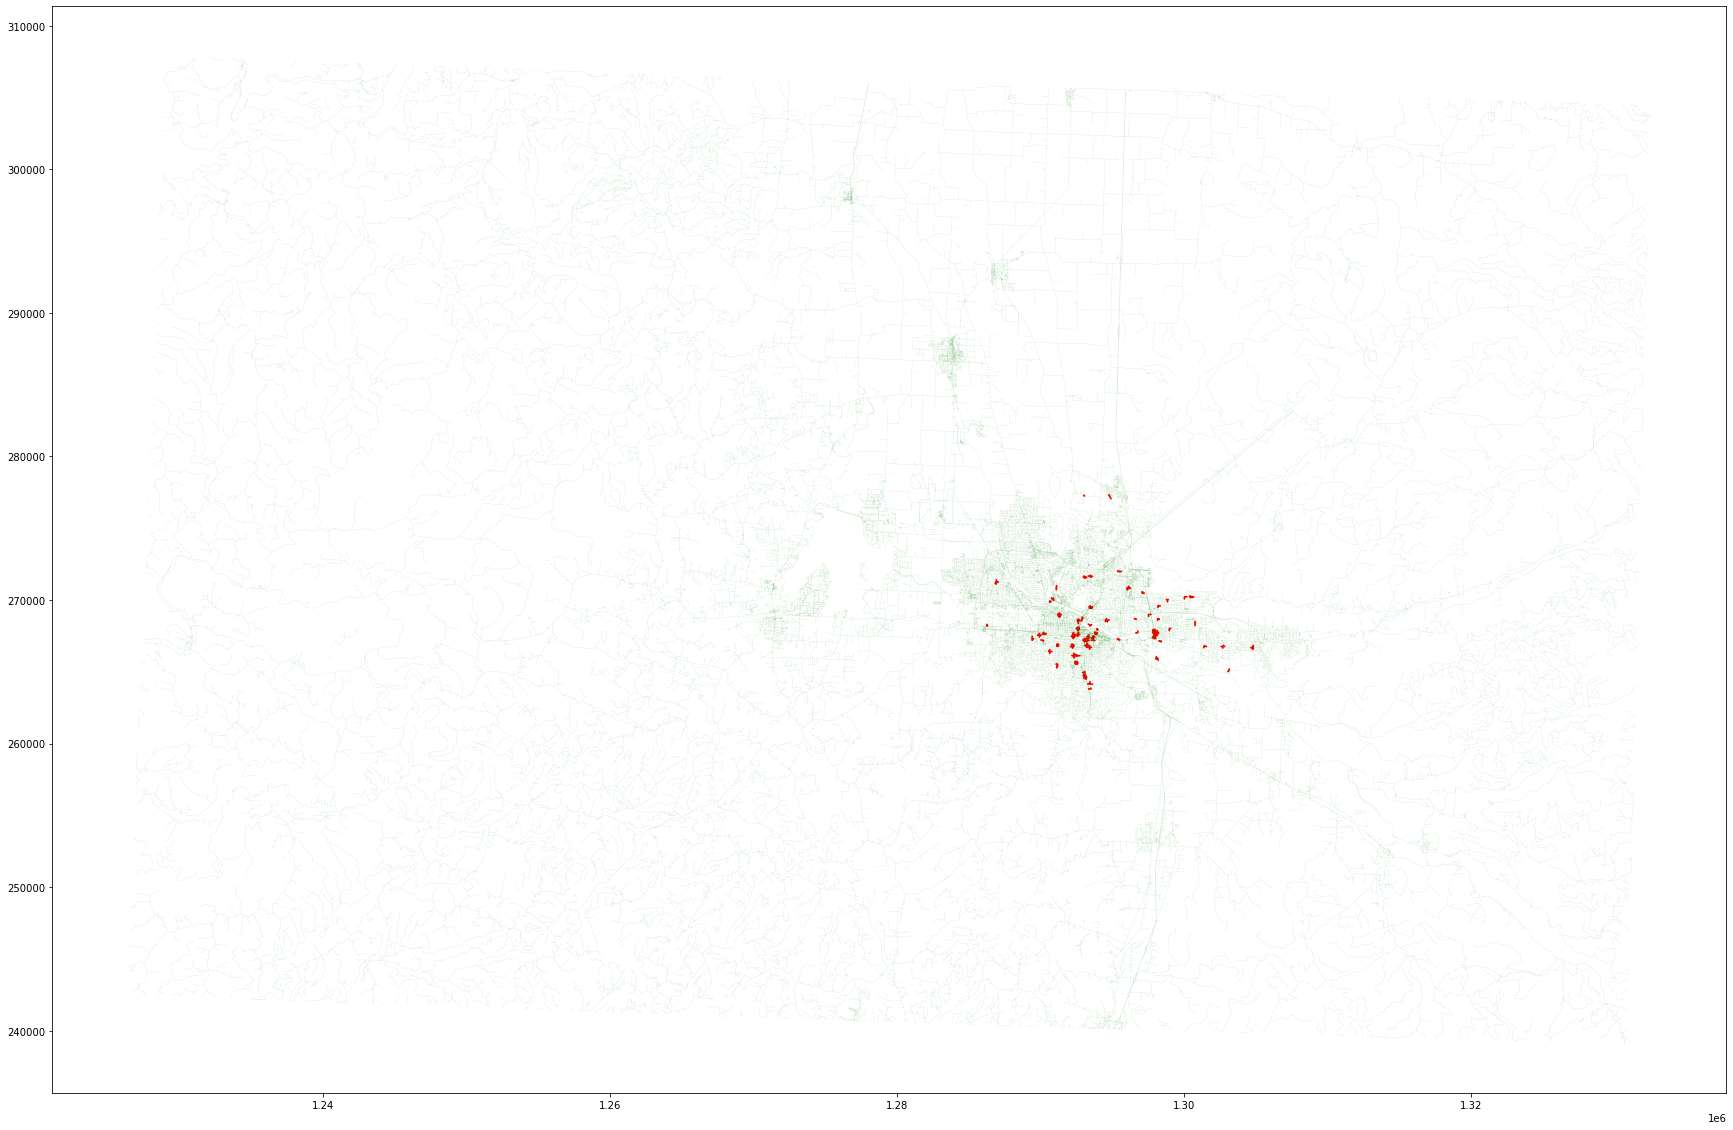

In [237]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [238]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref           type  oneway  bridge  \
947   5453222  North 5th Street  None       tertiary       0       0   
1099  5454322              None  None        service       0       0   
2030  5460814              None  None    residential       0       0   
2169  5461609              None  None  motorway_link       1       0   
4497  5476082              None  None    residential       0       0   

      maxspeed                                           geometry  
947        NaN  LINESTRING (1298105.255 267458.725, 1298105.64...  
1099       NaN  LINESTRING (1303135.279 265129.331, 1303117.43...  
2030       NaN  LINESTRING (1293415.577 271583.450, 1293579.49...  
2169       NaN  LINESTRING (1293635.462 269388.926, 1293500.37...  
4497       NaN  LINESTRING (1294932.939 277013.792, 1294932.36...

In [239]:
#ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Intersect

In [240]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  buff_dist  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        0.1   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        0.1   
2             2.0  513.408379  12.575342   3.780822    985.0  ...        0.1   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        0.1   
4             2.0  513.408379  12.575342   3.780822    985.0  ...        0.1   

   buffer_area     osm_id               name   ref         type  oneway  \
0     0.014500    5486972       Grant Street  None  residential       0   
1     0.027524    5486972       Grant Street  None  residential       0   
2     0.014500  122889302       Grant Street  None  residential       0   
3     0.014500  122889303    Chambers Street  None    secondary       0   
4     0.014500  122898356  Grant Street Path  None     cycleway       0   

  bridge maxspeed                                           geometry  
0      0      NaN  LINESTRING (1290032.236 267275.440, 1290030.24...  
1      0      NaN  LINESTRING (1290043.127 267607.185, 1290041.25...  
2      0      NaN  LINESTRING (1290023.835 267166.273, 1290023.38...  
3      0      NaN  LINESTRING (1290201.146 267170.520, 1290204.53...  
4      0      NaN  LINESTRING (1290030.501 267215.534, 1290030.24...  

[5 rows x 24 columns]

# Calculate the length of the road segments

In [241]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...   
1             1.0   83.037733   4.890411   1.479452    778.0  ...   
2             2.0  513.408379  12.575342   3.780822    985.0  ...   
3             2.0  513.408379  12.575342   3.780822    985.0  ...   
4             2.0  513.408379  12.575342   3.780822    985.0  ...   

   buffer_area     osm_id               name   ref         type  oneway  \
0     0.014500    5486972       Grant Street  None  residential       0   
1     0.027524    5486972       Grant Street  None  residential       0   
2     0.014500  122889302       Grant Street  None  residential       0   
3     0.014500  122889303    Chambers Street  None    secondary       0   
4     0.014500  122898356  Grant Street Path  None     cycleway       0   

   bridge maxspeed                                           geometry  \
0       0      NaN  LINESTRING (1290032.236 267275.440, 1290030.24...   
1       0      NaN  LINESTRING (1290043.127 267607.185, 1290041.25...   
2       0      NaN  LINESTRING (1290023.835 267166.273, 1290023.38...   
3       0      NaN  LINESTRING (1290201.146 267170.520, 1290204.53...   
4       0      NaN  LINESTRING (1290030.501 267215.534, 1290030.24...   

       Length  
0  132.846581  
1  403.035118  
2   35.502439  
3  296.054073  
4   63.859124  

[5 rows x 25 columns]

# Aggregrate the road functional class

In [242]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type       
5453222.0      residential    3727.799359
               service        3289.558520
               tertiary       1947.570082
5480007.0      residential    1018.499492
               service         448.335355
                                 ...     
721761539.0    cycleway        511.167391
               footway        1402.278391
               residential    3361.678349
               secondary      2509.129878
               service        1473.742448
Name: Length, Length: 363, dtype: float64

# Calculate the primary road

In [243]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id      Primary
0    5490868.0   231.153274
1  106993280.0  1074.537685
2  106993296.0  1502.626272
3  366409020.0  1074.537685
4  435896157.0  2008.772169

In [244]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Secondary
0  5483853.0  1911.885889
1  5485965.0  1190.262846
2  5486345.0  1367.587450
3  5489655.0   254.095423
4  5489866.0  2077.080121

In [245]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Tertiary
0  5453222.0  1947.570082
1  5480007.0   977.201653
2  5482102.0  1199.066869
3  5483853.0  1057.654674
4  5485472.0  1147.748216

In [246]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  5453222.0       3727.799359
1  5480007.0       1018.499492
2  5482102.0       4085.801701
3  5483853.0       2767.759830
4  5485472.0        994.367343

In [247]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id        Path
0    5482102.0  176.186345
1   29249558.0  198.574203
2   77347777.0  348.360636
3  106993273.0  680.774218
4  118517021.0  199.190060

In [248]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Cycleway
0  5483853.0  1197.134815
1  5485965.0  1047.164418
2  5489866.0  1362.537776
3  5490868.0   713.144809
4  5497693.0  3032.050240

In [249]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Footway
0  5489898.0   598.349372
1  5490152.0  1062.699157
2  5490868.0   527.560680
3  5497693.0  2170.873063
4  5499699.0   622.129637

# Calculcate the mean Speed

In [250]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    91.000000
mean     24.835165
std       7.868734
min      20.000000
25%      20.000000
50%      20.000000
75%      30.000000
max      60.000000
Name: maxspeed, dtype: float64

In [251]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id                         site_name sensor_type  year  region  \
10   P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
11   S003EUG      12th Ave East of Chambers St  short-term  2019  Eugene   
101  P005EUG           Alder north of 18th Ave   permanent  2019  Eugene   
105  P005EUG           Alder north of 18th Ave   permanent  2019  Eugene   
122  P005EUG           Alder north of 18th Ave   permanent  2019  Eugene   

     travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
10              2.0  513.408379  12.575342   3.780822    985.0  ...   
11              2.0   93.186492   1.438356   1.191781    787.0  ...   
101             1.0  410.282143   6.972603   4.479452   2154.0  ...   
105             1.0  410.282143   6.972603   4.479452   2154.0  ...   
122             1.0  410.282143   6.972603   4.479452   2154.0  ...   

     buffer_area     osm_id             name   ref         type  oneway  \
10      0.014500  721692297  Chambers Street  None    secondary       0   
11      0.025425  721692297  Chambers Street  None    secondary       0   
101     0.031334   88289727     Alder Street  None  residential       1   
105     0.031334  115698249     Alder Street  None  residential       0   
122     0.031334  436811258     Alder Street  None     tertiary       1   

     bridge maxspeed                                           geometry  \
10        0     30.0  LINESTRING (1290196.629 267252.640, 1290196.12...   
11        0     30.0  LINESTRING (1290214.621 267803.147, 1290214.37...   
101       0     20.0  LINESTRING (1293221.546 266835.017, 1293221.19...   
105       0     25.0  LINESTRING (1293216.902 266714.522, 1293214.11...   
122       0     20.0  LINESTRING (1293227.770 267017.471, 1293226.07...   

         Length  
10   270.399533  
11   829.412049  
101  395.621235  
105  196.772690  
122  598.949992  

[5 rows x 25 columns]

In [252]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                                    site_name sensor_type  \
0    934  S023EUG                         4th St South of B St  short-term   
1    935  S123EUG  Main St north sidewalk east of Pioneer Pkwy  short-term   
2   1595  S080EUG                     High St South of 4th Ave  short-term   
3   1596  S080EUG                     High St South of 4th Ave  short-term   
4   1936  S112EUG      Mill Race Path West of Autzen Connector  short-term   

   year  region  travel_pattern       AADBT    stv_adb  stv_c_adb  ...  \
0  2019  Eugene             2.0   39.801973   1.424658   0.589041  ...   
1  2019  Eugene             2.0   78.900929   1.315068   0.561644  ...   
2  2019  Eugene             2.0  433.897151  11.178082   5.657534  ...   
3  2019  Eugene             2.0  433.897151  11.178082   5.657534  ...   
4  2019  Eugene             2.0  296.627627   1.493151   0.780822  ...   

   buffer_area     osm_id                name              ref     type  \
0     0.034064  435896157         Main Street  OR 126 Business  primary   
1     0.026104  435896157         Main Street  OR 126 Business  primary   
2     0.029550   88289721     East 6th Avenue            OR 99  primary   
3     0.029550  122590831     East 6th Avenue            OR 99  primary   
4     0.025150  344859924  Franklin Boulevard            OR 99  primary   

  oneway  bridge  maxspeed                                           geometry  \
0      1       0      20.0  LINESTRING (1298037.073 267374.358, 1298010.47...   
1      1       0      20.0  LINESTRING (1298060.949 267373.560, 1298010.47...   
2      1       0      25.0  LINESTRING (1292655.618 268316.646, 1292647.22...   
3      1       0      20.0  LINESTRING (1292632.646 268320.427, 1292622.19...   
4      1       0      35.0  LINESTRING (1293738.852 267630.504, 1293803.07...   

       Length  
0  231.153274  
1  524.113325  
2   76.551365  
3   97.447547  
4  694.405364  

[5 rows x 26 columns]

In [253]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                                    site_name sensor_type  \
0    934  S023EUG                         4th St South of B St  short-term   
1    935  S123EUG  Main St north sidewalk east of Pioneer Pkwy  short-term   
2   1595  S080EUG                     High St South of 4th Ave  short-term   
3   1596  S080EUG                     High St South of 4th Ave  short-term   
4   1936  S112EUG      Mill Race Path West of Autzen Connector  short-term   

   year  region  travel_pattern       AADBT    stv_adb  stv_c_adb  ...  \
0  2019  Eugene             2.0   39.801973   1.424658   0.589041  ...   
1  2019  Eugene             2.0   78.900929   1.315068   0.561644  ...   
2  2019  Eugene             2.0  433.897151  11.178082   5.657534  ...   
3  2019  Eugene             2.0  433.897151  11.178082   5.657534  ...   
4  2019  Eugene             2.0  296.627627   1.493151   0.780822  ...   

   buffer_area     osm_id                name              ref     type  \
0     0.034064  435896157         Main Street  OR 126 Business  primary   
1     0.026104  435896157         Main Street  OR 126 Business  primary   
2     0.029550   88289721     East 6th Avenue            OR 99  primary   
3     0.029550  122590831     East 6th Avenue            OR 99  primary   
4     0.025150  344859924  Franklin Boulevard            OR 99  primary   

  oneway  bridge  maxspeed                                           geometry  \
0      1       0      20.0  LINESTRING (1298037.073 267374.358, 1298010.47...   
1      1       0      20.0  LINESTRING (1298060.949 267373.560, 1298010.47...   
2      1       0      25.0  LINESTRING (1292655.618 268316.646, 1292647.22...   
3      1       0      20.0  LINESTRING (1292632.646 268320.427, 1292622.19...   
4      1       0      35.0  LINESTRING (1293738.852 267630.504, 1293803.07...   

       Length  
0  231.153274  
1  524.113325  
2   76.551365  
3   97.447547  
4  694.405364  

[5 rows x 26 columns]

In [254]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].agg(lambda x: pd.Series.mode(x).iat[0]).reset_index() # revised
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  5483853.0      35.0
1  5485965.0      30.0
2  5486345.0      25.0
3  5489866.0      35.0
4  5490152.0      25.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [255]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
ecoshort.head()

site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0   

     latitude   longitude             comment  osm_id_sensor buff_dist  \
0   44.042515 -123.119532  corrected STL zone    123498508.0       2.0   
7   44.043919 -123.015499                 NaN    618082822.0       2.0   
14  44.044462 -123.052792                 NaN    106993273.0       2.0   
21  44.068013 -123.110896                 NaN    107098076.0       2.0   
28  44.040527 -123.080176                 NaN    680124010.0       2.0   

                          geometry  min_dist_to_school  min_dist_to_college  \
0   POINT (1290079.275 267211.026)          628.532553          6934.212066   
7   POINT (1298418.325 267111.279)          879.755548         20933.140361   
14  POINT (1295432.562 267262.083)         5010.229468         11170.247924   
21  POINT (1290859.454 270021.192)         2793.158332          8094.508350   
28  POINT (1293225.340 266892.292)         1869.438425          4950.178177   

    min_dist_to_university lanes  
0             10591.197533     2  
7             13217.559590     2  
14             4992.440022     2  
21            10941.097886     2  
28             1647.205849     1

In [257]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1262124.390 298313.524, 1262068.32...  
1  LINESTRING (1255582.117 304540.500, 1255594.75...  
2  LINESTRING (1255612.943 304935.600, 1255674.40...  
3  LINESTRING (1264233.051 297389.304, 1264358.40...  
4  LINESTRING (1271587.017 300122.661, 1271572.36...

In [258]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:2839
epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id              name     ref     type  oneway  bridge  \
0    660  5246969  South 5th Street  OR 99W  primary       0       0   
1    710  5248108  North 5th Street  OR 99W  primary       0       0   
2    715  5248191  State Highway 99  OR 99W  primary       0       0   
3    716  5248213  State Highway 99  OR 99W  primary       0       0   
4   4047  5473237              None   OR 99  primary       1       0   

   maxspeed                                           geometry  
0       NaN  LINESTRING (1276870.077 297823.580, 1276867.42...  
1       NaN  LINESTRING (1276853.978 298027.486, 1276853.21...  
2       NaN  LINESTRING (1276731.055 298949.591, 1276730.46...  
3       NaN  LINESTRING (1280622.418 294321.267, 1280607.96...  
4       NaN  LINESTRING (1295261.879 267224.737, 1295302.25...

# In the below pline distance, you can see counter is located little far away from the link

In [260]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [262]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [263]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [264]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

     longitude             comment osm_id_sensor  buff_dist  \
0  -123.119532  corrected STL zone   123498508.0        2.0   
7  -123.015499                 NaN   618082822.0        2.0   
14 -123.052792                 NaN   106993273.0        2.0   
21 -123.110896                 NaN   107098076.0        2.0   
28 -123.080176                 NaN   680124010.0        2.0   

                          geometry min_dist_to_school  min_dist_to_college  \
0   POINT (1290079.275 267211.026)         628.532553          6934.212066   
7   POINT (1298418.325 267111.279)         879.755548         20933.140361   
14  POINT (1295432.562 267262.083)        5010.229468         11170.247924   
21  POINT (1290859.454 270021.192)        2793.158332          8094.508350   
28  POINT (1293225.340 266892.292)        1869.438425          4950.178177   

    min_dist_to_university  lanes maxspeed  
0             10591.197533      2     30.0  
7             13217.559590      2     30.0  
14             4992.440022      2     35.0  
21            10941.097886      2     25.0  
28             1647.205849      1     20.0  

[5 rows x 21 columns]

In [265]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0  S007EUG               13th Ave East of Willamette St  short-term  2019   
1  S009EUG                    13th Ave West of Hayes St  short-term  2019   
2  S077EUG                    High St North of 13th Ave  short-term  2019   
3  S078EUG                    High St North of Broadway  short-term  2019   
4  S119EUG            S Willamette North of Vintage Way  short-term  2019   
5  S123EUG  Main St north sidewalk east of Pioneer Pkwy  short-term  2019   

   region  travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             1.0  118.872034  3.698630   1.561644   1564.0  ...   
1  Eugene             1.0   83.037733  4.890411   1.479452    778.0  ...   
2  Eugene             1.0  220.042229  6.657534   2.863014   1579.0  ...   
3  Eugene             2.0  303.997425  6.958904   3.342466   2465.0  ...   
4  Eugene             2.0   46.839795  3.493151   1.054795     63.0  ...   
5  Eugene             2.0   78.900929  1.315068   0.561644    818.0  ...   

   maxspeed_x  index     osm_id                     name              ref  \
0        20.0  21336  498988307         East 13th Avenue             None   
1        30.0   6688    5485965         West 13th Avenue             None   
2        25.0  21329  498988300              High Street             None   
3        20.0  21326  498988297              High Street             None   
4        25.0   6795    5486345  South Willamette Street             None   
5        20.0  20380  435896157              Main Street  OR 126 Business   

        type  oneway  bridge  maxspeed_y  \
0  secondary       1       0        20.0   
1  secondary       1       0        30.0   
2  secondary       1       0        25.0   
3  secondary       1       0        20.0   
4  secondary       0       0        25.0   
5    primary       1       0        20.0   

                                          geometry_y  
0  LINESTRING (1292235.576 267476.954, 1292245.42...  
1  LINESTRING (1289798.616 267554.835, 1289860.04...  
2  LINESTRING (1292603.470 267526.035, 1292605.77...  
3  LINESTRING (1292618.318 267953.682, 1292618.95...  
4  LINESTRING (1294832.172 277195.473, 1294782.44...  
5  LINESTRING (1298102.033 267372.245, 1298091.55...  

[6 rows x 30 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

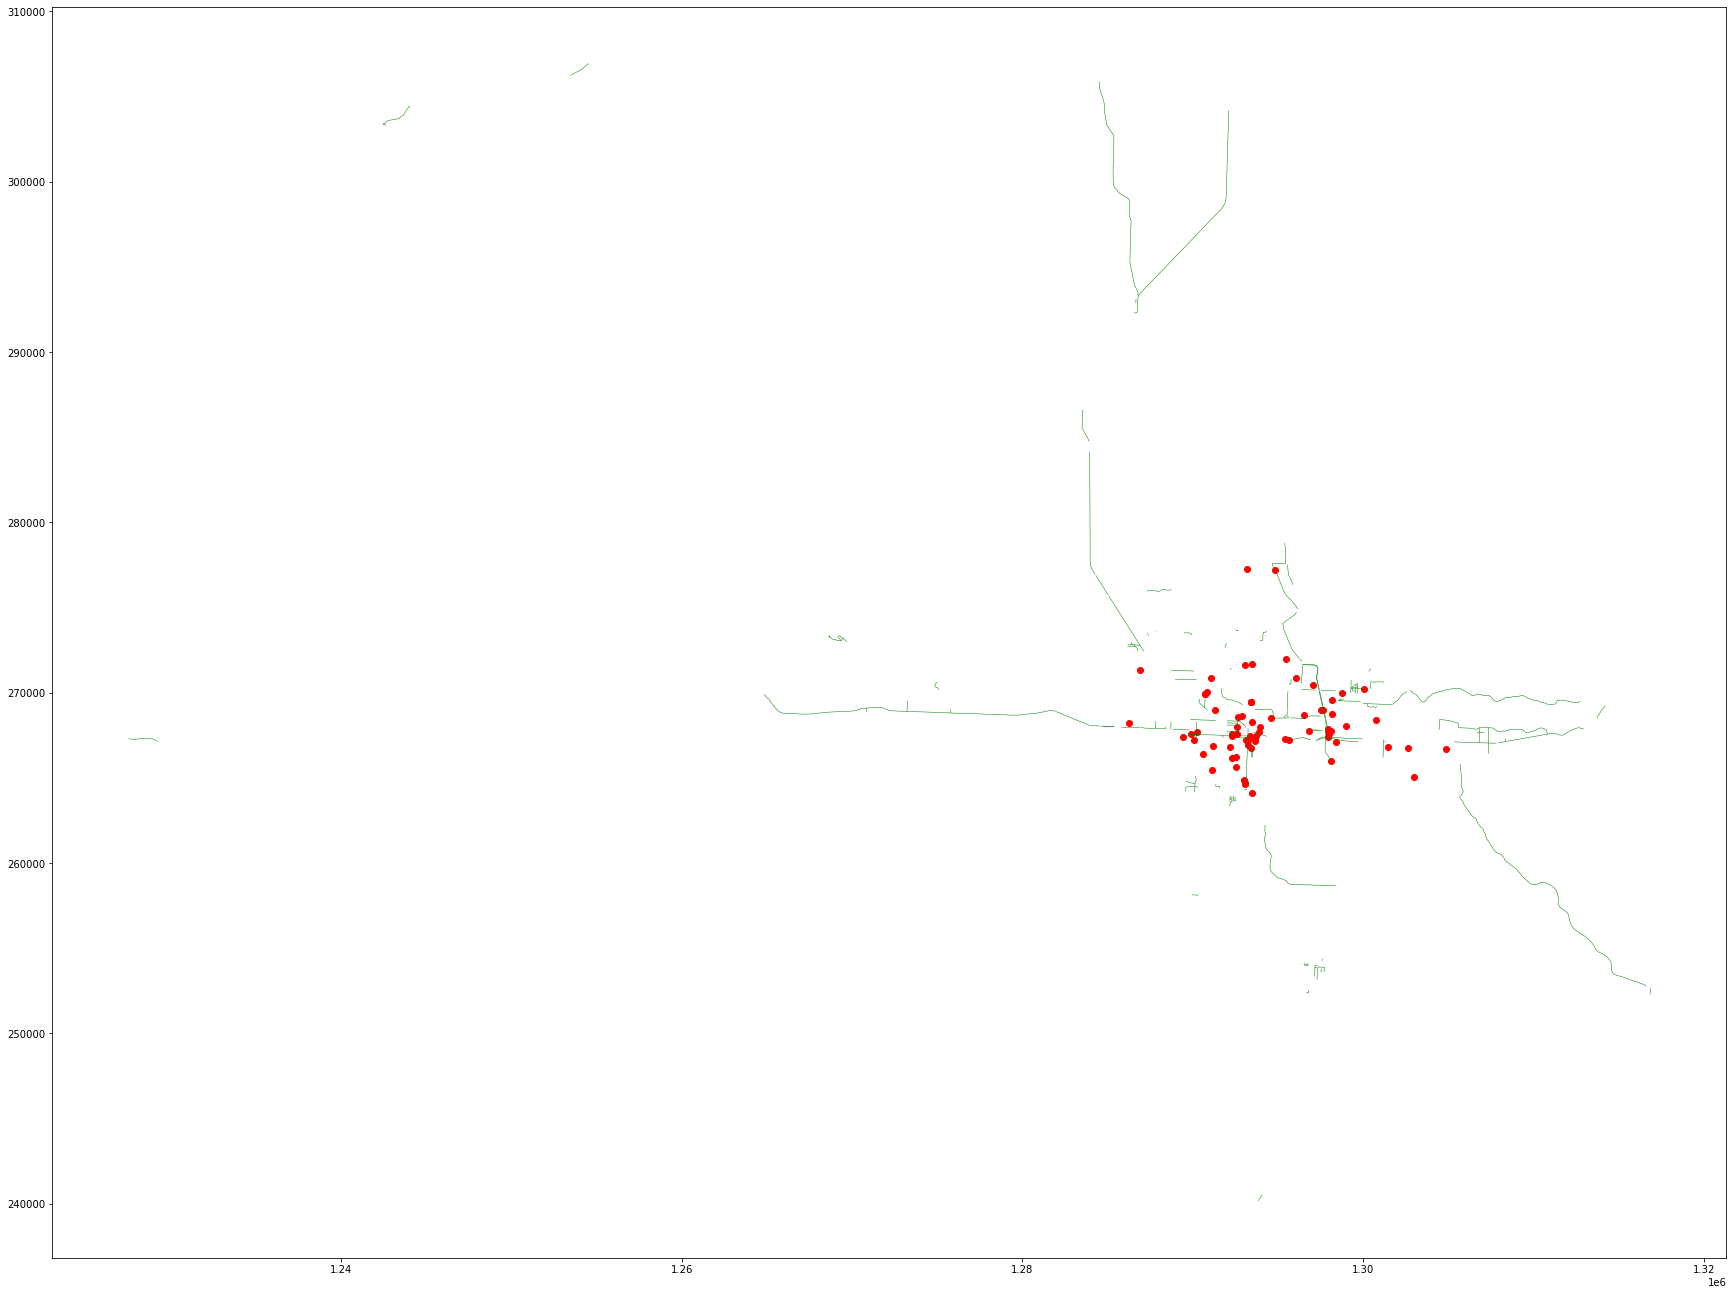

In [266]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [267]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0       5453222.0      35.0
1       5480007.0      35.0
2       5482102.0      30.0
3       5483853.0      35.0
4       5485472.0      15.0
..            ...       ...
69    667022978.0      25.0
70    680124010.0      20.0
71    688257916.0      35.0
72    706527591.0      25.0
73    721761539.0      25.0

[74 rows x 2 columns]

In [268]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0     5453222.0         35.0
1     5480007.0         35.0
2     5482102.0         30.0
3     5483853.0         35.0
4     5485472.0         15.0
..          ...          ...
69  667022978.0         25.0
70  680124010.0         20.0
71  688257916.0         35.0
72  706527591.0         25.0
73  721761539.0         25.0

[74 rows x 2 columns]

In [269]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'buff_dist',
       'geometry_x', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_x', 'index', 'osm_id',
       'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [270]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0    5485965.0      30.0
1    5486345.0      25.0
2  435896157.0      20.0
3  498988297.0      20.0
4  498988300.0      25.0
5  498988307.0      20.0

# Calculate the road type of the closest link of count station

In [271]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id              name     ref     type  oneway  bridge  \
0    660  5246969  South 5th Street  OR 99W  primary       0       0   
1    710  5248108  North 5th Street  OR 99W  primary       0       0   
2    715  5248191  State Highway 99  OR 99W  primary       0       0   
3    716  5248213  State Highway 99  OR 99W  primary       0       0   
4   4047  5473237              None   OR 99  primary       1       0   

   maxspeed                                           geometry  
0       NaN  LINESTRING (1276870.077 297823.580, 1276867.42...  
1       NaN  LINESTRING (1276853.978 298027.486, 1276853.21...  
2       NaN  LINESTRING (1276731.055 298949.591, 1276730.46...  
3       NaN  LINESTRING (1280622.418 294321.267, 1280607.96...  
4       NaN  LINESTRING (1295261.879 267224.737, 1295302.25...

In [273]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt

In [275]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                     name              ref       type  \
0  20380  435896157              Main Street  OR 126 Business    primary   
1   6688    5485965         West 13th Avenue             None  secondary   
2   6795    5486345  South Willamette Street             None  secondary   
3   8984    5497693        East Amazon Drive             None  secondary   
4  11993   88379128        Willamette Street             None  secondary   

   oneway  bridge  maxspeed_x  \
0       1       0        20.0   
1       1       0        30.0   
2       0       0        25.0   
3       0       0         NaN   
4       1       0         NaN   

                                          geometry_x  site_id  ...  \
0  LINESTRING (1298102.033 267372.245, 1298091.55...  S123EUG  ...   
1  LINESTRING (1289798.616 267554.835, 1289860.04...  S009EUG  ...   
2  LINESTRING (1294832.172 277195.473, 1294782.44...  S119EUG  ...   
3  LINESTRING (1293047.061 264726.021, 1293061.96...  S058EUG  ...   
4  LINESTRING (1292216.118 266869.648, 1292215.91...  S120EUG  ...   

    longitude          comment  osm_id_sensor buff_dist  \
0 -123.021607              NaN    435896157.0       2.0   
1 -123.121854              NaN      5485965.0       2.0   
2 -123.064234              NaN      5486345.0       2.0   
3 -123.080929  288800 & 840559      5497693.0       2.0   
4 -123.092749              NaN     88379128.0       2.0   

                       geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (1297936.602 267378.037)          280.009633         19270.754428   
1  POINT (1289903.829 267553.128)         1038.577547          7233.543970   
2  POINT (1294820.079 277219.961)         3900.283441         31931.929155   
3  POINT (1293096.628 264674.256)         1992.089286         11027.921143   
4  POINT (1292213.494 266775.829)         1730.159599          3645.712466   

   min_dist_to_university  lanes  maxspeed_y  
0            13010.153579      2        20.0  
1            11049.855820      2        30.0  
2            31224.693152      2        25.0  
3             7021.343679      2        25.0  
4             4631.894237      2        20.0  

[5 rows x 30 columns]

In [276]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [277]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'buff_dist', 'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [278]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id  road_type
0  435896157.0    primary
1    5485965.0  secondary
2    5486345.0  secondary
3    5497693.0  secondary
4   88379128.0  secondary

# Convert this road catagory to binary as follows- 0 and 1

In [279]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  road_type  primary_binary  secondary_binary  tertiary_binary  \
0  435896157.0    primary               1                 0                0   
1    5485965.0  secondary               0                 1                0   
2    5486345.0  secondary               0                 1                0   
3    5497693.0  secondary               0                 1                0   
4   88379128.0  secondary               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [280]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2=pt_road_type2.drop_duplicates(subset=['osm_id'],keep='first')
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0  435896157.0               1                 0                0   
1    5485965.0               0                 1                0   
2    5486345.0               0                 1                0   
3    5497693.0               0                 1                0   
4   88379128.0               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [281]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  5453222.0       2
1  5480007.0       2
2  5482102.0       2
3  5483853.0       2
4  5485472.0       2

# Calculate the bridge from spatial join of count location and bridge line shape file

In [282]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   ref         type  oneway  bridge  maxspeed  \
0  5230636  None  None        track       0       0       NaN   
1  5230644  None  None  residential       0       0       NaN   
2  5230652  None  None  residential       0       0       NaN   
3  5230683  None  None  residential       0       0       NaN   
4  5230693  None  None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1262124.390 298313.524, 1262068.32...  
1  LINESTRING (1255582.117 304540.500, 1255594.75...  
2  LINESTRING (1255612.943 304935.600, 1255674.40...  
3  LINESTRING (1264233.051 297389.304, 1264358.40...  
4  LINESTRING (1271587.017 300122.661, 1271572.36...

In [283]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [284]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                                    site_name sensor_type  year  \
0  P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
1  P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
2  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
3  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
4  P005EUG                      Alder north of 18th Ave   permanent  2019   

   region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
1  Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
2  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
3  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
4  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

   lanes  maxspeed_x     osm_id             name   ref      type  oneway  \
0      2        30.0  123498508  Fern Ridge Path  None  cycleway       0   
1      2        30.0  618082822             None  None  cycleway       0   
2      2        35.0  106993273  South Bank Path  None  cycleway       0   
3      2        25.0  107098076  North Bank Path  None  cycleway       0   
4      1        20.0  680124010             None  None  cycleway       0   

   bridge  maxspeed_y                                         geometry_y  
0       0         NaN  LINESTRING (1290134.400 267192.162, 1290125.33...  
1       1         NaN  LINESTRING (1298420.339 267106.273, 1298450.60...  
2       0         NaN  LINESTRING (1295450.510 267256.157, 1295433.23...  
3       0         NaN  LINESTRING (1293075.767 268725.078, 1293074.88...  
4       0         NaN  LINESTRING (1293255.749 267894.098, 1293254.54...  

[5 rows x 29 columns]

In [285]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [286]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0      5453222.0       0
1      5480007.0       0
2      5482102.0       0
3      5483853.0       0
4      5485472.0       0

In [287]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0  5453222.0             2
1  5480007.0             2
2  5482102.0             2
3  5483853.0             2
4  5485472.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [288]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [289]:
nature_proj1.head(5)

osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
2  25126014  None   water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...

In [290]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name  type  \
6    78897841                     None  park   
8   107946543              Island Park  park   
9   108064134              Island Park  park   
10  108064141  Eastgate Woodlands Park  park   
11  108064148   West D Street Greenway  park   

                                             geometry  
6   POLYGON ((1292320.377 268077.258, 1292367.887 ...  
8   POLYGON ((1297164.737 267615.756, 1297168.319 ...  
9   POLYGON ((1297185.944 267733.517, 1297220.794 ...  
10  POLYGON ((1295721.614 267951.578, 1295833.568 ...  
11  POLYGON ((1296711.576 267680.720, 1296671.942 ...

In [291]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

     longitude             comment osm_id_sensor  buff_dist  \
0  -123.119532  corrected STL zone   123498508.0        2.0   
7  -123.015499                 NaN   618082822.0        2.0   
14 -123.052792                 NaN   106993273.0        2.0   
21 -123.110896                 NaN   107098076.0        2.0   
28 -123.080176                 NaN   680124010.0        2.0   

                          geometry min_dist_to_school  min_dist_to_college  \
0   POINT (1290079.275 267211.026)         628.532553          6934.212066   
7   POINT (1298418.325 267111.279)         879.755548         20933.140361   
14  POINT (1295432.562 267262.083)        5010.229468         11170.247924   
21  POINT (1290859.454 270021.192)        2793.158332          8094.508350   
28  POINT (1293225.340 266892.292)        1869.438425          4950.178177   

    min_dist_to_university  lanes maxspeed  
0             10591.197533      2     30.0  
7             13217.559590      2     30.0  
14             4992.440022      2     35.0  
21            10941.097886      2     25.0  
28             1647.205849      1     20.0  

[5 rows x 21 columns]

In [292]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

               comment  osm_id_sensor buff_dist  \
0   corrected STL zone    123498508.0       2.0   
7                  NaN    618082822.0       2.0   
14                 NaN    106993273.0       2.0   
21                 NaN    107098076.0       2.0   
28                 NaN    680124010.0       2.0   

                          geometry min_dist_to_school min_dist_to_college  \
0   POINT (1290079.275 267211.026)         628.532553         6934.212066   
7   POINT (1298418.325 267111.279)         879.755548        20933.140361   
14  POINT (1295432.562 267262.083)        5010.229468        11170.247924   
21  POINT (1290859.454 270021.192)        2793.158332         8094.508350   
28  POINT (1293225.340 266892.292)        1869.438425         4950.178177   

    min_dist_to_university  lanes  maxspeed min_dist_to_polygon  
0             10591.197533      2      30.0            0.000000  
7             13217.559590      2      30.0         1406.216478  
14             4992.440022      2      35.0          780.800356  
21            10941.097886      2      25.0          510.704227  
28             1647.205849      1      20.0         1335.048959  

[5 rows x 22 columns]

In [293]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1=Park_distance1.drop_duplicates(subset=['osm_id'],keep='first')
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0   123498508.0          0.000000
7   618082822.0       1406.216478
14  106993273.0        780.800356
21  107098076.0        510.704227
28  680124010.0       1335.048959

# cc distance to park

In [294]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1=parkcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0   123498508.0               459.352965
7   618082822.0              1519.983109
14  106993273.0              1389.649605
21  107098076.0               877.183977
28  680124010.0              1370.923896

# Distance to water body

In [295]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   type                                           geometry
2    25126014  None  water  POLYGON ((1290284.220 271836.402, 1290277.442 ...
12  120065484  None  water  POLYGON ((1298200.019 264275.903, 1298197.825 ...
13  120065485  None  water  POLYGON ((1298279.427 264168.878, 1298288.251 ...
14  120065486  None  water  POLYGON ((1298110.143 264206.560, 1298108.866 ...
15  120065487  None  water  POLYGON ((1298172.753 264084.610, 1298171.493 ...

In [296]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

               comment  osm_id_sensor buff_dist  \
0   corrected STL zone    123498508.0       2.0   
7                  NaN    618082822.0       2.0   
14                 NaN    106993273.0       2.0   
21                 NaN    107098076.0       2.0   
28                 NaN    680124010.0       2.0   

                          geometry min_dist_to_school min_dist_to_college  \
0   POINT (1290079.275 267211.026)         628.532553         6934.212066   
7   POINT (1298418.325 267111.279)         879.755548        20933.140361   
14  POINT (1295432.562 267262.083)        5010.229468        11170.247924   
21  POINT (1290859.454 270021.192)        2793.158332         8094.508350   
28  POINT (1293225.340 266892.292)        1869.438425         4950.178177   

    min_dist_to_university  lanes  maxspeed min_dist_to_polygon  
0             10591.197533      2      30.0         6716.512489  
7             13217.559590      2      30.0         4735.277606  
14             4992.440022      2      35.0         1742.310705  
21            10941.097886      2      25.0          907.649062  
28             1647.205849      1      20.0         2082.524492  

[5 rows x 22 columns]

In [297]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1=water_distance1.drop_duplicates(subset=['osm_id'],keep='first')
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0   123498508.0             6716.512489
7   618082822.0             4735.277606
14  106993273.0             1742.310705
21  107098076.0              907.649062
28  680124010.0             2082.524492

In [298]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1=watercc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0   123498508.0               6894.072468
7   618082822.0               4804.882122
14  106993273.0               2096.013449
21  107098076.0               1342.134085
28  680124010.0               2094.341631

# Distance To  Forest

In [299]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type                                           geometry
0  25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
1  25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
3  76923818  None  forest  POLYGON ((1294293.505 268011.582, 1294296.302 ...
4  76923954  None  forest  POLYGON ((1295717.501 267383.911, 1295724.013 ...
5  76923960  None  forest  POLYGON ((1294839.316 267598.002, 1294834.369 ...

In [300]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

               comment  osm_id_sensor buff_dist  \
0   corrected STL zone    123498508.0       2.0   
7                  NaN    618082822.0       2.0   
14                 NaN    106993273.0       2.0   
21                 NaN    107098076.0       2.0   
28                 NaN    680124010.0       2.0   

                          geometry min_dist_to_school min_dist_to_college  \
0   POINT (1290079.275 267211.026)         628.532553         6934.212066   
7   POINT (1298418.325 267111.279)         879.755548        20933.140361   
14  POINT (1295432.562 267262.083)        5010.229468        11170.247924   
21  POINT (1290859.454 270021.192)        2793.158332         8094.508350   
28  POINT (1293225.340 266892.292)        1869.438425         4950.178177   

    min_dist_to_university  lanes  maxspeed min_dist_to_polygon  
0             10591.197533      2      30.0         6250.637033  
7             13217.559590      2      30.0          752.327322  
14             4992.440022      2      35.0          128.963820  
21            10941.097886      2      25.0           30.240957  
28             1647.205849      1      20.0          778.936936  

[5 rows x 22 columns]

In [301]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1=forest_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0   123498508.0         6250.637033
7   618082822.0          752.327322
14  106993273.0          128.963820
21  107098076.0           30.240957
28  680124010.0          778.936936

In [302]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1=forestcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0   123498508.0                6265.918144
7   618082822.0                2190.701487
14  106993273.0                 465.887980
21  107098076.0                 386.242996
28  680124010.0                 931.496598

# Distance to green space area

In [303]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name   type  \
1  123503986  Amazon Dog Park  grass   
5  124093753             None  grass   
6  124095387             None  grass   
7  124095400             None  grass   
8  124095406             None  grass   

                                            geometry  
1  POLYGON ((1292841.266 265289.680, 1292855.691 ...  
5  POLYGON ((1292549.237 266063.061, 1292553.660 ...  
6  POLYGON ((1292924.281 265319.511, 1292904.204 ...  
7  POLYGON ((1292707.938 265693.074, 1292728.752 ...  
8  POLYGON ((1292538.248 266117.761, 1292542.178 ...

In [304]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

               comment  osm_id_sensor buff_dist  \
0   corrected STL zone    123498508.0       2.0   
7                  NaN    618082822.0       2.0   
14                 NaN    106993273.0       2.0   
21                 NaN    107098076.0       2.0   
28                 NaN    680124010.0       2.0   

                          geometry min_dist_to_school min_dist_to_college  \
0   POINT (1290079.275 267211.026)         628.532553         6934.212066   
7   POINT (1298418.325 267111.279)         879.755548        20933.140361   
14  POINT (1295432.562 267262.083)        5010.229468        11170.247924   
21  POINT (1290859.454 270021.192)        2793.158332         8094.508350   
28  POINT (1293225.340 266892.292)        1869.438425         4950.178177   

    min_dist_to_university  lanes  maxspeed min_dist_to_polygon  
0             10591.197533      2      30.0         1063.828801  
7             13217.559590      2      30.0         6220.911822  
14             4992.440022      2      35.0            8.608663  
21            10941.097886      2      25.0          936.507357  
28             1647.205849      1      20.0          311.131547  

[5 rows x 22 columns]

In [305]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1=grass_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0   123498508.0        1063.828801
7   618082822.0        6220.911822
14  106993273.0           8.608663
21  107098076.0         936.507357
28  680124010.0         311.131547

In [306]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1=grasscc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0   123498508.0               1322.708281
7   618082822.0               7032.474855
14  106993273.0                 52.670326
21  107098076.0               1038.825343
28  680124010.0                370.708477

# Distance to commercial

In [307]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1=commercial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0   123498508.0                   112.556184
7   618082822.0                   750.414339
14  106993273.0                  7392.346040
21  107098076.0                  4945.052733
28  680124010.0                  2961.861733

In [308]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1=commercialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0   123498508.0                          802.073039
7   618082822.0                         1728.490761
14  106993273.0                         8345.940808
21  107098076.0                         5962.516026
28  680124010.0                         3317.560302

# Distance to industrial area

In [309]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1=industrial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0   123498508.0                  4075.752054
7   618082822.0                   305.450097
14  106993273.0                  1096.375792
21  107098076.0                  3097.869105
28  680124010.0                  3158.218650

In [310]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1=industrialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0   123498508.0                    4606.806686
7   618082822.0                     645.502681
14  106993273.0                    1839.052895
21  107098076.0                    3401.788866
28  680124010.0                    3272.153319

# Distance to Retail area

In [311]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1=retail_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0   123498508.0              7092.008079
7   618082822.0             16644.069561
14  106993273.0              6836.506119
21  107098076.0                 9.008042
28  680124010.0              1611.412047

In [312]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1=retailcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0   123498508.0                7277.242078
7   618082822.0               16691.760161
14  106993273.0                6897.438227
21  107098076.0                1086.242108
28  680124010.0                1714.775136

# Distance to Residential

In [313]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1=residential_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0   123498508.0                    567.701586
7   618082822.0                   1165.836590
14  106993273.0                   1534.136161
21  107098076.0                   3066.642120
28  680124010.0                    222.901889

In [314]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1=residentialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0   123498508.0                     1071.746883
7   618082822.0                     2107.377509
14  106993273.0                     2848.313741
21  107098076.0                     3262.795673
28  680124010.0                      406.212518

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [315]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                               name        type  \
0   37434396                Valley River Center      retail   
1   78898473                     McArthur Court  university   
2   85690675     Springfield Kiwanis Youth Camp        None   
3   88782630  Eugene Airport-Mahlon Sweet Field        None   
4  122079725                           7-Eleven        None   

                                            geometry  
0  POLYGON ((-123.10737 44.06890, -123.10743 44.0...  
1  POLYGON ((-123.07442 44.04196, -123.07392 44.0...  
2  POLYGON ((-122.72511 43.94888, -122.72528 43.9...  
3  POLYGON ((-123.21426 44.11983, -123.21404 44.1...  
4  POLYGON ((-123.11741 44.03996, -123.11741 44.0...

In [316]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2839)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Lane County Public Service Building')]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                                 name    type  \
1945  281908109  Lane County Public Service Building  office   

                                               geometry  
1945  POLYGON ((1292479.343 268192.311, 1292479.387 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

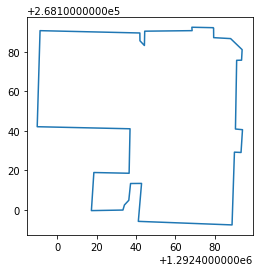

In [317]:
bld_proj1.geometry.boundary.plot()

In [318]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                                 name    type  \
1945  281908109  Lane County Public Service Building  office   

                            geometry  
1945  POINT (1292447.864 268147.986)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

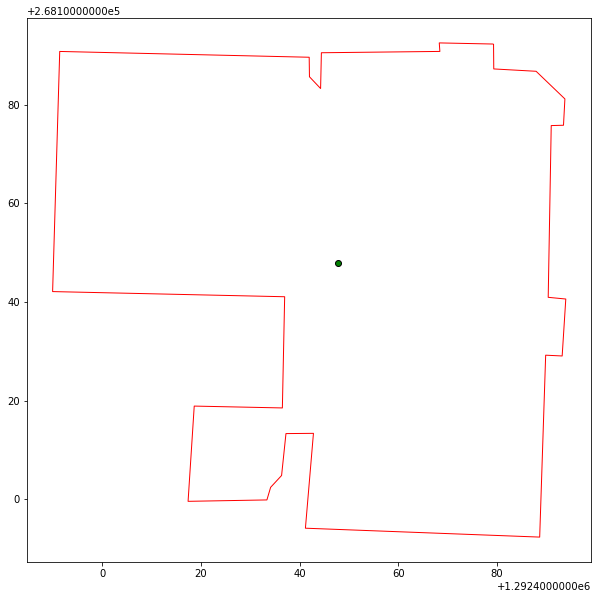

In [319]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [320]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

    osm_id_sensor  buff_dist                        geometry  \
0     123498508.0        2.0  POINT (1290079.275 267211.026)   
7     618082822.0        2.0  POINT (1298418.325 267111.279)   
14    106993273.0        2.0  POINT (1295432.562 267262.083)   
21    107098076.0        2.0  POINT (1290859.454 270021.192)   
28    680124010.0        2.0  POINT (1293225.340 266892.292)   

    min_dist_to_school min_dist_to_college min_dist_to_university  lanes  \
0           628.532553         6934.212066           10591.197533      2   
7           879.755548        20933.140361           13217.559590      2   
14         5010.229468        11170.247924            4992.440022      2   
21         2793.158332         8094.508350           10941.097886      2   
28         1869.438425         4950.178177            1647.205849      1   

    maxspeed  min_dist_to_polygon min_dist_to_CBD  
0       30.0          1071.746883     8356.878045  
7       30.0          2107.377509    19881.232680  
14      35.0          2848.313741    10214.560298  
21      25.0          3262.795673     8057.748919  
28      20.0           406.212518     4845.477002  

[5 rows x 23 columns]

In [321]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0   123498508.0      8356.878045
7   618082822.0     19881.232680
14  106993273.0     10214.560298
21  107098076.0      8057.748919
28  680124010.0      4845.477002

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [322]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [323]:
bg.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2627, 16)

In [324]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [325]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [326]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2839')
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...

In [327]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  Total block Area  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...      2.220647e+09  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...      1.928498e+08  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      4.733330e+08  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1.469862e+07  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1.010078e+06

In [328]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHY2M001  AHY2M002  AHY2M003  \
0  Baker County        1      NaN     NaN  ...       167       149        38   
1  Baker County        1      NaN     NaN  ...       163       162        12   
2  Baker County        1      NaN     NaN  ...       159       159        29   
3  Baker County        1      NaN     NaN  ...       222       215        12   
4  Baker County        1      NaN     NaN  ...       237       188        36   

   AHY2M004  AHY2M005  AHY2M006  AHY2M007  AHY2M008  AHY2M009  AHY2M010  
0        11        10         8        12         7        12         7  
1        14         2         8         3         7         2         7  
2        13        12        12        53        16         7        14  
3        42        12        12        12        12        12        12  
4        12        57        12       150         7        12         7  

[5 rows x 58 columns]

In [329]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHY2M001 AHY2M002 AHY2M003  \
0        S  2.205986e+09  13837275.0  ...      167      149       38   
1        S  1.926901e+08     12317.0  ...      163      162       12   
2        S  4.723892e+08    639439.0  ...      159      159       29   
3        S  1.469016e+07         0.0  ...      222      215       12   
4        S  1.009492e+06         0.0  ...      237      188       36   

   AHY2M004  AHY2M005 AHY2M006  AHY2M007 AHY2M008  AHY2M009  AHY2M010  
0        11        10        8        12        7        12         7  
1        14         2        8         3        7         2         7  
2        13        12       12        53       16         7        14  
3        42        12       12        12       12        12        12  
4        12        57       12       150        7        12         7  

[5 rows x 74 columns]

In [330]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
race2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INTPTLAT      INTPTLON          GISJOIN     Shape_Leng    Shape_Area  \
0  +44.5468040  -118.1781784  G41000109501001  323465.419044  2.219823e+09   
1  +44.9562277  -118.0519082  G41000109501002  109051.976354  1.927024e+08   
2  +44.8443756  -118.0396603  G41000109501003  140639.998011  4.730286e+08   
3  +44.7764594  -117.8821056  G41000109502001   22860.454690  1.469017e+07   
4  +44.7753666  -117.8349670  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  AHY2E001  AHY2E002  \
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...       950       903   
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...       908       884   
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      1128      1016   
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1097      1060   
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1103       912   

   AHY2E003  Total block Area  
0        25      2.220647e+09  
1         0      1.928498e+08  
2        23      4.733330e+08  
3         0      1.469862e+07  
4        25      1.010078e+06

In [331]:
#race2["Total block Area"]=race2.area
#race2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [332]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN    Shape_Leng    Shape_Area  \
951   +44.1806114  -123.0287177  G41003900003001  59417.757925  9.092059e+07   
952   +44.1379943  -123.0621160  G41003900003002  15295.075435  8.779097e+06   
1036  +44.0427192  -122.9680820  G41003900019021   3267.527091  5.784203e+05   
1037  +44.0429298  -122.9792197  G41003900019022   3588.152493  5.879351e+05   
1042  +44.0427328  -122.9547455  G41003900019041   7518.171651  1.531803e+06   

                                               geometry  AHY2E001  AHY2E002  \
951   POLYGON ((1292983.950 277229.561, 1292979.575 ...       920       902   
952   POLYGON ((1294960.225 277043.446, 1294957.723 ...      1388      1250   
1036  MULTIPOLYGON (((1302592.434 266764.623, 130259...      2022      1844   
1037  POLYGON ((1301318.962 266796.939, 1301319.911 ...       820       747   
1042  POLYGON ((1302687.993 266605.740, 1302686.180 ...      2492      1991   

      AHY2E003  Total block Area  
951          0      9.092862e+07  
952         18      8.779741e+06  
1036         0      5.784312e+05  
1037         0      5.879464e+05  
1042         0      1.531830e+06

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


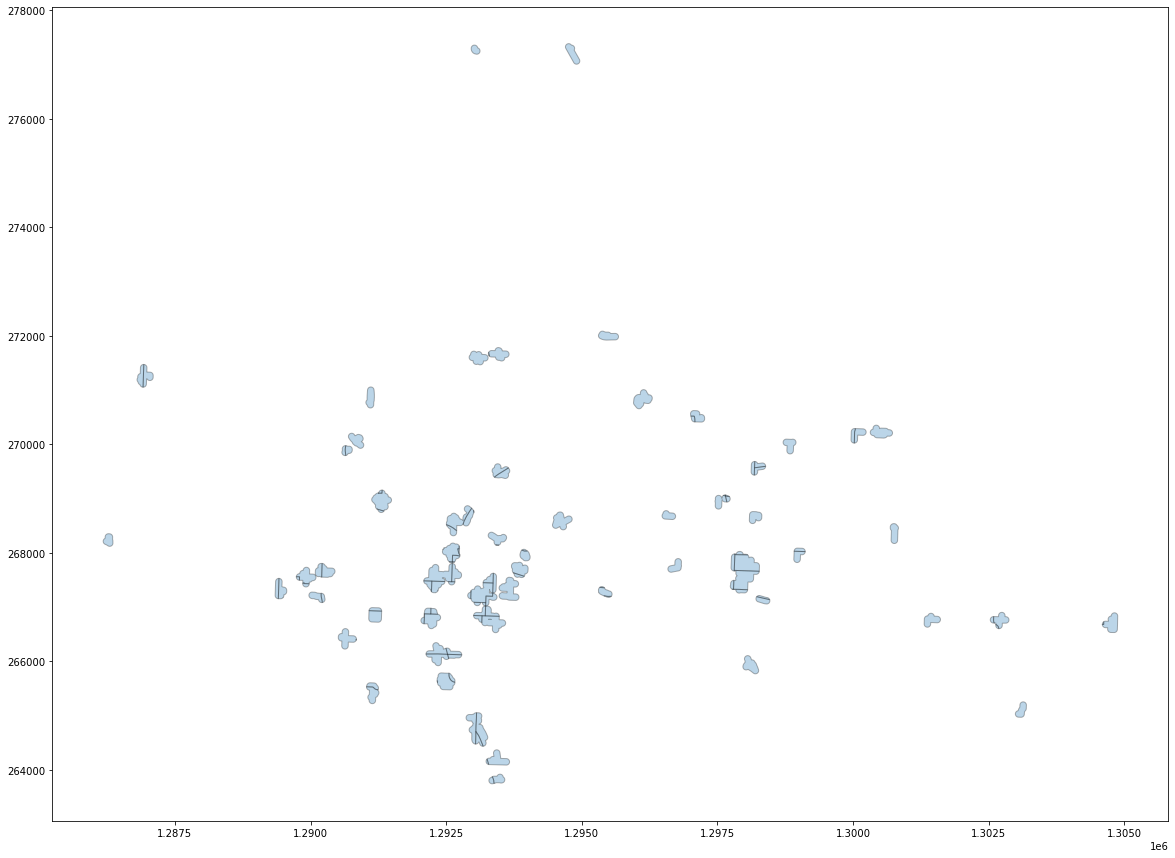

In [333]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [334]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...   
1             1.0   83.037733   4.890411   1.479452    778.0  ...   
2             2.0   53.858767   0.684932   0.164384    438.0  ...   
3             2.0  513.408379  12.575342   3.780822    985.0  ...   
4             1.0  177.231087   2.150685   0.767123    519.0  ...   

      INTPTLAT      INTPTLON          GISJOIN   Shape_Leng     Shape_Area  \
0  +44.0428001  -123.1232896  G41003900044032  3083.799422  403142.463145   
1  +44.0428001  -123.1232896  G41003900044032  3083.799422  403142.463145   
2  +44.0428001  -123.1232896  G41003900044032  3083.799422  403142.463145   
3  +44.0429370  -123.1095946  G41003900045013  3815.466040  774403.899555   
4  +44.0429370  -123.1095946  G41003900045013  3815.466040  774403.899555   

   AHY2E001 AHY2E002 AHY2E003 Total block Area  \
0      2217     1474      113    403150.154915   
1      2217     1474      113    403150.154915   
2      2217     1474      113    403150.154915   
3      1107     1006       31    774418.796470   
4      1107     1006       31    774418.796470   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 26 columns]

In [335]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...   
1             1.0   83.037733   4.890411   1.479452    778.0  ...   
2             2.0   53.858767   0.684932   0.164384    438.0  ...   
3             2.0  513.408379  12.575342   3.780822    985.0  ...   
4             1.0  177.231087   2.150685   0.767123    519.0  ...   

           GISJOIN   Shape_Leng     Shape_Area  AHY2E001 AHY2E002  AHY2E003  \
0  G41003900044032  3083.799422  403142.463145      2217     1474       113   
1  G41003900044032  3083.799422  403142.463145      2217     1474       113   
2  G41003900044032  3083.799422  403142.463145      2217     1474       113   
3  G41003900045013  3815.466040  774403.899555      1107     1006        31   
4  G41003900045013  3815.466040  774403.899555      1107     1006        31   

  Total block Area                                           geometry  \
0    403150.154915  POLYGON ((1290188.228 267251.765, 1290190.264 ...   
1    403150.154915  MULTIPOLYGON (((1289970.995 267404.399, 128996...   
2    403150.154915  POLYGON ((1289506.000 267193.161, 1289505.942 ...   
3    774418.796470  POLYGON ((1290197.878 267252.685, 1290199.948 ...   
4    774418.796470  POLYGON ((1291078.802 266936.478, 1291078.809 ...   

  buffered area  area factor  
0  29089.105819     0.072155  
1   9114.153722     0.022607  
2  35225.893650     0.087377  
3   8464.760452     0.010930  
4  12303.028430     0.015887  

[5 rows x 28 columns]

In [336]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  area factor
0    123498508.0      2217      1474       113     0.072155
1      5485965.0      2217      1474       113     0.022607
2    116382793.0      2217      1474       113     0.087377
3    123498508.0      1107      1006        31     0.010930
4    216890849.0      1107      1006        31     0.015887

In [337]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003
0    123498508.0  159.966570  106.355762  8.153461
1      5485965.0   50.120479   33.323223  2.554630
2    116382793.0  193.713943  128.793122  9.873557
3    123498508.0   12.100029   10.996052  0.338845
4    216890849.0   17.586676   15.982110  0.492490

# Aggregate by ID

In [338]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003
0      5453222.0  201.630773  174.277684  0.923958
1      5480007.0   65.659605   59.814298  0.000000
2      5482102.0  265.269426  222.918660  3.511456
3      5483853.0  213.538988  195.963389  0.798736
4      5485472.0  129.412479  117.025608  3.638102

# Percentange of White and African American

In [339]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003  pct_white  \
0      5453222.0  201.630773  174.277684  0.923958  86.434071   
1      5480007.0   65.659605   59.814298  0.000000  91.097561   
2      5482102.0  265.269426  222.918660  3.511456  84.034811   
3      5483853.0  213.538988  195.963389  0.798736  91.769372   
4      5485472.0  129.412479  117.025608  3.638102  90.428380   

   pct_African_American  
0              0.458243  
1              0.000000  
2              1.323732  
3              0.374047  
4              2.811245

In [340]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  5453222.0  86.434071              0.458243
1  5480007.0  91.097561              0.000000
2  5482102.0  84.034811              1.323732
3  5483853.0  91.769372              0.374047
4  5485472.0  90.428380              2.811245

# Percentage of Male and Female

In [341]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHYQM040  AHYQM041  AHYQM042  \
0  Baker County        1      NaN     NaN  ...        18        28        15   
1  Baker County        1      NaN     NaN  ...         9        25        15   
2  Baker County        1      NaN     NaN  ...        12        41        28   
3  Baker County        1      NaN     NaN  ...        27        40        26   
4  Baker County        1      NaN     NaN  ...        11        21        12   

   AHYQM043  AHYQM044  AHYQM045  AHYQM046  AHYQM047  AHYQM048  AHYQM049  
0        15        13        11        11        12        15        11  
1        18         9        42        28        25         3         8  
2        36        15        26        22        12        38        15  
3        35        31        24        23        29        12        12  
4        40        30        20        15        12        31        12  

[5 rows x 136 columns]

In [342]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
0        S  2.205986e+09  13837275.0  ...       18       28       15   
1        S  1.926901e+08     12317.0  ...        9       25       15   
2        S  4.723892e+08    639439.0  ...       12       41       28   
3        S  1.469016e+07         0.0  ...       27       40       26   
4        S  1.009492e+06         0.0  ...       11       21       12   

   AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
0        15        13       11        11       12        15        11  
1        18         9       42        28       25         3         8  
2        36        15       26        22       12        38        15  
3        35        31       24        23       29        12        12  
4        40        30       20        15       12        31        12  

[5 rows x 152 columns]

In [343]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
1036      41      039  001902        1  410390019021  Block Group 1  G5030   
1037      41      039  001902        2  410390019022  Block Group 2  G5030   
1042      41      039  001904        1  410390019041  Block Group 1  G5030   

     FUNCSTAT       ALAND     AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
951         S  89480046.0  1440549.0  ...       23       20       25   
952         S   8650347.0   128755.0  ...       34       35       16   
1036        S    578419.0        0.0  ...      137       96       12   
1037        S    587935.0        0.0  ...       55       37       12   
1042        S   1531804.0        0.0  ...       29       83       12   

      AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
951         25        19       17        16       12        12        12  
952         18        15       15        27       14        14        12  
1036        12        12       24        26        4        12        25  
1037        36        24       12        12       35        15        23  
1042        51        20       60        34       12        75        14  

[5 rows x 152 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


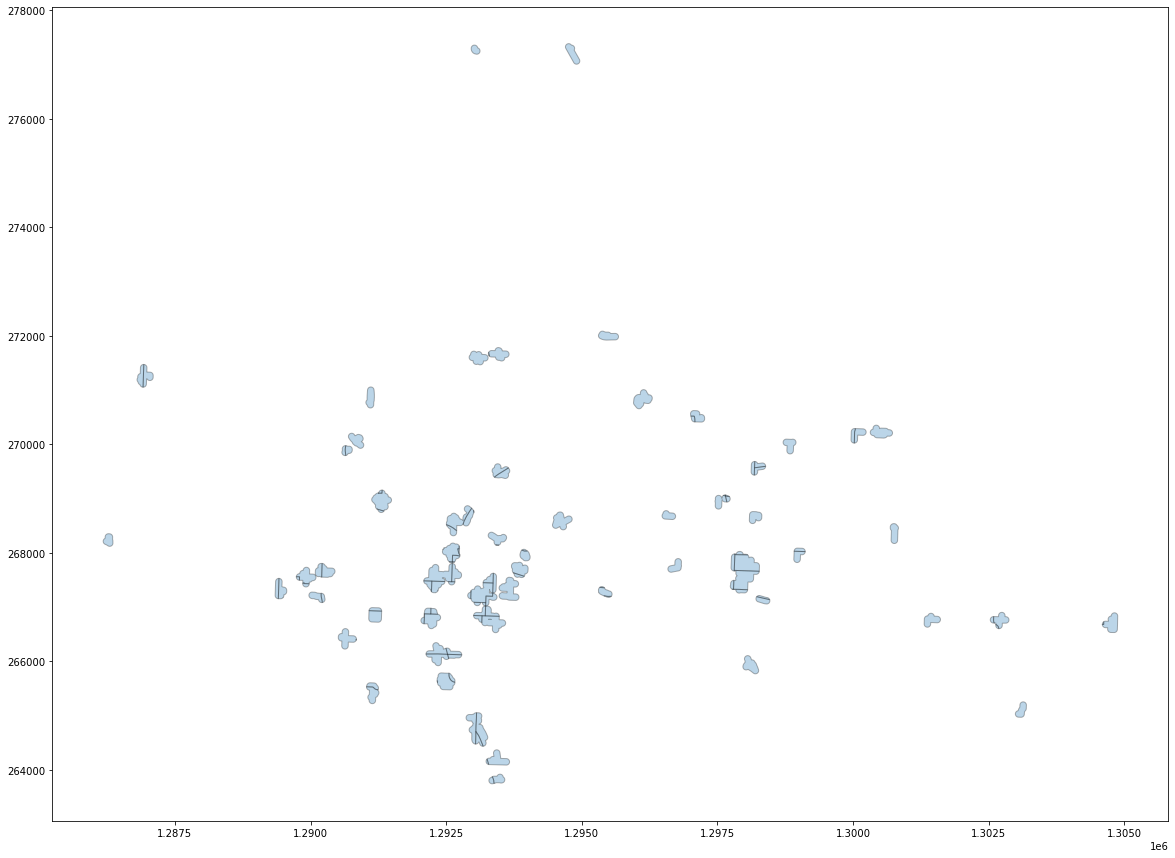

In [344]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [345]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHYQM041  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        58   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        58   
2             2.0   53.858767   0.684932   0.164384    438.0  ...        58   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        29   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        29   

   AHYQM042 AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047 AHYQM048 AHYQM049  \
0        26       12        12       21        12       12       12       12   
1        26       12        12       21        12       12       12       12   
2        26       12        12       21        12       12       12       12   
3        12       23        25       12        13       12       25       25   
4        12       23        25       12        13       12       25       25   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 168 columns]

In [346]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHYQM043  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        12   
2             2.0   53.858767   0.684932   0.164384    438.0  ...        12   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        23   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        23   

   AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048 AHYQM049  \
0        12       21        12       12        12       12   
1        12       21        12       12        12       12   
2        12       21        12       12        12       12   
3        25       12        13       12        25       25   
4        25       12        13       12        25       25   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 170 columns]

In [347]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'AHYQE001', 'AHYQE002', 'AHYQE026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHYQE001  AHYQE002  AHYQE026  area factor
0    123498508.0      2217      1067      1150     0.072155
1      5485965.0      2217      1067      1150     0.022607
2    116382793.0      2217      1067      1150     0.087377
3    123498508.0      1107       565       542     0.010930
4    216890849.0      1107       565       542     0.015887

In [348]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001   AHYQE002    AHYQE026
0    123498508.0  159.966570  76.988873   82.977698
1      5485965.0   50.120479  24.122035   25.998444
2    116382793.0  193.713943  93.230842  100.483101
3    123498508.0   12.100029   6.175715    5.924314
4    216890849.0   17.586676   8.976036    8.610640

In [349]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001    AHYQE002    AHYQE026
0      5453222.0  201.630773   82.912783  118.717990
1      5480007.0   65.659605   35.952637   29.706967
2      5482102.0  265.269426  157.414903  107.854524
3      5483853.0  213.538988   90.477047  123.061941
4      5485472.0  129.412479   65.225968   64.186511

In [350]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AHYQE002']/output_pct_gender['AHYQE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AHYQE026']/output_pct_gender['AHYQE001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001    AHYQE002    AHYQE026   pct_male  pct_female
0      5453222.0  201.630773   82.912783  118.717990  41.121096   58.878904
1      5480007.0   65.659605   35.952637   29.706967  54.756098   45.243902
2      5482102.0  265.269426  157.414903  107.854524  59.341517   40.658483
3      5483853.0  213.538988   90.477047  123.061941  42.370271   57.629729
4      5485472.0  129.412479   65.225968   64.186511  50.401606   49.598394

In [351]:
output_pct_gender1=output_pct_gender.drop(['AHYQE001', 'AHYQE002', 'AHYQE026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  5453222.0  41.121096   58.878904
1  5480007.0  54.756098   45.243902
2  5482102.0  59.341517   40.658483
3  5483853.0  42.370271   57.629729
4  5485472.0  50.401606   49.598394

# Number of Student (student access) and Education (pct of at least college education population)

In [352]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH04M016  AH04M017  AH04M018  \
0  Baker County        1      NaN     NaN  ...        21        57        17   
1  Baker County        1      NaN     NaN  ...        10        61        19   
2  Baker County        1      NaN     NaN  ...        23        45        41   
3  Baker County        1      NaN     NaN  ...        36        63        23   
4  Baker County        1      NaN     NaN  ...        12        98        34   

   AH04M019  AH04M020  AH04M021  AH04M022  AH04M023  AH04M024  AH04M025  
0        24        66        29        26        13        12         3  
1        35        53        38        23        41        11         2  
2        35        76        37        72        43        22        27  
3        58        30        92        90        36        30        22  
4        46        66        24        87        23        14        12  

[5 rows x 88 columns]

In [353]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
0        S  2.205986e+09  13837275.0  ...       21       57       17   
1        S  1.926901e+08     12317.0  ...       10       61       19   
2        S  4.723892e+08    639439.0  ...       23       45       41   
3        S  1.469016e+07         0.0  ...       36       63       23   
4        S  1.009492e+06         0.0  ...       12       98       34   

   AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
0        24        66       29        26       13        12         3  
1        35        53       38        23       41        11         2  
2        35        76       37        72       43        22        27  
3        58        30       92        90       36        30        22  
4        46        66       24        87       23        14        12  

[5 rows x 104 columns]

In [354]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
1036      41      039  001902        1  410390019021  Block Group 1  G5030   
1037      41      039  001902        2  410390019022  Block Group 2  G5030   
1042      41      039  001904        1  410390019041  Block Group 1  G5030   

     FUNCSTAT       ALAND     AWATER  ... AH04M016 AH04M017 AH04M018  \
951         S  89480046.0  1440549.0  ...       13       67       24   
952         S   8650347.0   128755.0  ...       37       83       32   
1036        S    578419.0        0.0  ...       12      168      133   
1037        S    587935.0        0.0  ...       12      141       48   
1042        S   1531804.0        0.0  ...       52      173       50   

      AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
951         39        54       39        48       12        42        12  
952         19        60       46        56       35        16        14  
1036       126       128      117        35        5        12        35  
1037        64        48       76        55       12        12        12  
1042        78       182       39       117       59        12        12  

[5 rows x 104 columns]

In [355]:
#ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [356]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH04M017  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...       109   
1             1.0   83.037733   4.890411   1.479452    778.0  ...       109   
2             2.0   53.858767   0.684932   0.164384    438.0  ...       109   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        32   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        32   

   AH04M018 AH04M019  AH04M020 AH04M021  AH04M022 AH04M023 AH04M024 AH04M025  \
0        12       98       139       73       131       65       19       12   
1        12       98       139       73       131       65       19       12   
2        12       98       139       73       131       65       19       12   
3        12       54       101       57        77       54       12       29   
4        12       54       101       57        77       54       12       29   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 120 columns]

In [357]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH04M019  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        98   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        98   
2             2.0   53.858767   0.684932   0.164384    438.0  ...        98   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        54   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        54   

   AH04M020 AH04M021  AH04M022 AH04M023  AH04M024 AH04M025  \
0       139       73       131       65        19       12   
1       139       73       131       65        19       12   
2       139       73       131       65        19       12   
3       101       57        77       54        12       29   
4       101       57        77       54        12       29   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 122 columns]

In [358]:
# AH04E001,=total, AH04E019:    Some college, less than 1 year
#AH04E020:    Some college, 1 or more years, no degree
#        AH04E021:    Associate's degree
#        AH04E022:    Bachelor's degree
#        AH04E023:    Master's degree
#        AH04E024:    Professional school degree
#        AH04E025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'AH04E001', 'AH04E019','AH04E020','AH04E021', 'AH04E022','AH04E023','AH04E024','AH04E025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH04E001  AH04E019  AH04E020  AH04E021  AH04E022  AH04E023  \
0    123498508.0      1116       136       334        57       331        63   
1      5485965.0      1116       136       334        57       331        63   
2    116382793.0      1116       136       334        57       331        63   
3    123498508.0       730        65       130        92       237        83   
4    216890849.0       730        65       130        92       237        83   

   AH04E024  AH04E025  area factor  
0        11         0     0.072155  
1        11         0     0.022607  
2        11         0     0.087377  
3         0        36     0.010930  
4         0        36     0.015887

In [359]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AH04E001   AH04E019   AH04E020  AH04E021   AH04E022  \
0    123498508.0  80.524444   9.813015  24.099610  4.112808  23.883146   
1      5485965.0  25.229794   3.074599   7.550852  1.288619   7.483030   
2    116382793.0  97.512296  11.883219  29.183788  4.980467  28.921658   
3    123498508.0   7.979242   0.710480   1.420961  1.005603   2.590521   
4    216890849.0  11.597356   1.032641   2.065283  1.461585   3.765169   

   AH04E023  AH04E024  AH04E025  
0  4.545735  0.793700  0.000000  
1  1.424263  0.248681  0.000000  
2  5.504726  0.961143  0.000000  
3  0.907229  0.000000  0.393497  
4  1.318604  0.000000  0.571924

In [360]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001   AH04E019   AH04E020   AH04E021   AH04E022  \
0      5453222.0  139.129531   6.208355  21.916413  23.985240  33.225206   
1      5480007.0   51.807030   4.323925   5.364870   8.727923   6.325742   
2      5482102.0  197.792702  10.204631  42.750395   6.402493  57.091886   
3      5483853.0  149.932652   6.325493  28.669836  24.364742  33.267443   
4      5485472.0   82.117155   8.575526  12.646735  11.867142  25.120227   

    AH04E023  AH04E024  AH04E025  
0   6.171789  0.000000  4.763047  
1   0.000000  0.000000  0.000000  
2  17.183241  7.817288  6.200426  
3   6.351620  0.000000  5.672942  
4  10.394577  3.291616  0.952836

# Number of students 

In [361]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  ALV5M012  \
0  Baker County        1      NaN  ...         4         5        18   
1  Baker County        1      NaN  ...        17        18         5   
2  Baker County        1      NaN  ...        16        21        11   
3  Baker County        1      NaN  ...         6        73        46   
4  Baker County        1      NaN  ...        12        18        12   

   ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  ALV5M019  
0        12        12        14        12         4        12       130  
1        12        12         7        12        12        10       116  
2        12         7        21         7        21        18       168  
3        22        23        12        11        30        37       153  
4        12        53        12        40        53        12       178  

[5 rows x 82 columns]

In [362]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
0        S  2.205986e+09  13837275.0  ...        4        5       18   
1        S  1.926901e+08     12317.0  ...       17       18        5   
2        S  4.723892e+08    639439.0  ...       16       21       11   
3        S  1.469016e+07         0.0  ...        6       73       46   
4        S  1.009492e+06         0.0  ...       12       18       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        12        12       14        12        4       12       130  
1        12        12        7        12       12       10       116  
2        12         7       21         7       21       18       168  
3        22        23       12        11       30       37       153  
4        12        53       12        40       53       12       178  

[5 rows x 98 columns]

In [363]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
1036      41      039  001902        1  410390019021  Block Group 1  G5030   
1037      41      039  001902        2  410390019022  Block Group 2  G5030   
1042      41      039  001904        1  410390019041  Block Group 1  G5030   

     FUNCSTAT       ALAND     AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
951         S  89480046.0  1440549.0  ...       12       23       15   
952         S   8650347.0   128755.0  ...       16        4       23   
1036        S    578419.0        0.0  ...       13       12       13   
1037        S    587935.0        0.0  ...       36       12       12   
1042        S   1531804.0        0.0  ...       30       12       40   

      ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
951         21        34       16        14       12       12       135  
952         12        12       22         6       23       13       174  
1036        12        12       12        50       97       12       415  
1037        39        12       36        38       54       12       182  
1042        37        19       19        99       93       12       341  

[5 rows x 98 columns]

In [364]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M011  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...       100   
1             1.0   83.037733   4.890411   1.479452    778.0  ...       100   
2             2.0   53.858767   0.684932   0.164384    438.0  ...       100   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        12   

   ALV5M012 ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0        20       84        12       12        12      165       28      216   
1        20       84        12       12        12      165       28      216   
2        20       84        12       12        12      165       28      216   
3        12       12        25       12        12      124       24      213   
4        12       12        25       12        12      124       24      213   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 114 columns]

In [365]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M013  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        84   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        84   
2             2.0   53.858767   0.684932   0.164384    438.0  ...        84   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        12   

   ALV5M014 ALV5M015  ALV5M016 ALV5M017  ALV5M018 ALV5M019  \
0        12       12        12      165        28      216   
1        12       12        12      165        28      216   
2        12       12        12      165        28      216   
3        25       12        12      124        24      213   
4        25       12        12      124        24      213   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 116 columns]

In [366]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0    123498508.0      1807       325        16     0.072155
1      5485965.0      1807       325        16     0.022607
2    116382793.0      1807       325        16     0.087377
3    123498508.0      1095       134        36     0.010930
4    216890849.0      1095       134        36     0.015887

In [367]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALV5E001   ALV5E017  ALV5E018
0    123498508.0  130.383217  23.450219  1.154472
1      5485965.0   40.851468   7.347386  0.361717
2    116382793.0  157.889533  28.397398  1.398026
3    123498508.0   11.968863   1.464683  0.393497
4    216890849.0   17.396035   2.128830  0.571924

In [368]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0    123498508.0      24.604691
1      5485965.0       7.709104
2    116382793.0      29.795424
3    123498508.0       1.858180
4    216890849.0       2.700754

In [369]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0      5453222.0      18.772843
1      5480007.0       3.683344
2      5482102.0      25.912032
3      5483853.0      18.875575
4      5485472.0       7.969175

In [370]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  5453222.0       18.772843
1  5480007.0        3.683344
2  5482102.0       25.912032
3  5483853.0       18.875575
4  5485472.0        7.969175

# Education ( pct of at least college population)

In [371]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001   AH04E019   AH04E020   AH04E021   AH04E022  \
0      5453222.0  139.129531   6.208355  21.916413  23.985240  33.225206   
1      5480007.0   51.807030   4.323925   5.364870   8.727923   6.325742   
2      5482102.0  197.792702  10.204631  42.750395   6.402493  57.091886   
3      5483853.0  149.932652   6.325493  28.669836  24.364742  33.267443   
4      5485472.0   82.117155   8.575526  12.646735  11.867142  25.120227   

    AH04E023  AH04E024  AH04E025  total_at_least_college_education  
0   6.171789  0.000000  4.763047                         96.270050  
1   0.000000  0.000000  0.000000                         24.742461  
2  17.183241  7.817288  6.200426                        147.650360  
3   6.351620  0.000000  5.672942                        104.652077  
4  10.394577  3.291616  0.952836                         72.848658

In [372]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['AH04E001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001   AH04E019   AH04E020   AH04E021   AH04E022  \
0      5453222.0  139.129531   6.208355  21.916413  23.985240  33.225206   
1      5480007.0   51.807030   4.323925   5.364870   8.727923   6.325742   
2      5482102.0  197.792702  10.204631  42.750395   6.402493  57.091886   
3      5483853.0  149.932652   6.325493  28.669836  24.364742  33.267443   
4      5485472.0   82.117155   8.575526  12.646735  11.867142  25.120227   

    AH04E023  AH04E024  AH04E025  total_at_least_college_education  \
0   6.171789  0.000000  4.763047                         96.270050   
1   0.000000  0.000000  0.000000                         24.742461   
2  17.183241  7.817288  6.200426                        147.650360   
3   6.351620  0.000000  5.672942                        104.652077   
4  10.394577  3.291616  0.952836                         72.848658   

   pct_at_least_college_education  
0                       69.194548  
1                       47.758887  
2                       74.649043  
3                       69.799390  
4                       88.713080

In [373]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  5453222.0                       69.194548
1  5480007.0                       47.758887
2  5482102.0                       74.649043
3  5483853.0                       69.799390
4  5485472.0                       88.713080

# Median Age

In [374]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  BTTRA  BTBGA  \
0  Baker County        1      NaN     NaN  ...    NaN    NaN   
1  Baker County        1      NaN     NaN  ...    NaN    NaN   
2  Baker County        1      NaN     NaN  ...    NaN    NaN   
3  Baker County        1      NaN     NaN  ...    NaN    NaN   
4  Baker County        1      NaN     NaN  ...    NaN    NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

   AHYRE003                                             NAME_M  AHYRM001  \
0      50.9  Block Group 1, Census Tract 9501, Baker County...       5.3   
1      45.7  Block Group 2, Census Tract 9501, Baker County...      13.5   
2      54.5  Block Group 3, Census Tract 9501, Baker County...       7.7   
3      48.0  Block Group 1, Census Tract 9502, Baker County...      10.5   
4      43.5  Block Group 2, Census Tract 9502, Baker County...      11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 44 columns]

In [375]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... BTTRA BTBGA  \
0        S  2.205986e+09  13837275.0  ...   NaN   NaN   
1        S  1.926901e+08     12317.0  ...   NaN   NaN   
2        S  4.723892e+08    639439.0  ...   NaN   NaN   
3        S  1.469016e+07         0.0  ...   NaN   NaN   
4        S  1.009492e+06         0.0  ...   NaN   NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

  AHYRE003                                             NAME_M AHYRM001  \
0     50.9  Block Group 1, Census Tract 9501, Baker County...      5.3   
1     45.7  Block Group 2, Census Tract 9501, Baker County...     13.5   
2     54.5  Block Group 3, Census Tract 9501, Baker County...      7.7   
3     48.0  Block Group 1, Census Tract 9502, Baker County...     10.5   
4     43.5  Block Group 2, Census Tract 9502, Baker County...     11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 60 columns]

In [376]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
1036      41      039  001902        1  410390019021  Block Group 1  G5030   
1037      41      039  001902        2  410390019022  Block Group 2  G5030   
1042      41      039  001904        1  410390019041  Block Group 1  G5030   

     FUNCSTAT       ALAND     AWATER  ... BTTRA BTBGA  \
951         S  89480046.0  1440549.0  ...   NaN   NaN   
952         S   8650347.0   128755.0  ...   NaN   NaN   
1036        S    578419.0        0.0  ...   NaN   NaN   
1037        S    587935.0        0.0  ...   NaN   NaN   
1042        S   1531804.0        0.0  ...   NaN   NaN   

                                                 NAME_E  AHYRE001  AHYRE002  \
951   Block Group 1, Census Tract 3, Lane County, Or...      53.0      58.6   
952   Block Group 2, Census Tract 3, Lane County, Or...      43.0      42.5   
1036  Block Group 1, Census Tract 19.02, Lane County...      33.0      29.3   
1037  Block Group 2, Census Tract 19.02, Lane County...      47.7      45.4   
1042  Block Group 1, Census Tract 19.04, Lane County...      37.1      37.9   

     AHYRE003                                             NAME_M AHYRM001  \
951      51.4  Block Group 1, Census Tract 3, Lane County, Or...      5.3   
952      44.3  Block Group 2, Census Tract 3, Lane County, Or...      4.1   
1036     37.2  Block Group 1, Census Tract 19.02, Lane County...      6.9   
1037     51.1  Block Group 2, Census Tract 19.02, Lane County...      6.6   
1042     33.1  Block Group 1, Census Tract 19.04, Lane County...      3.0   

      AHYRM002  AHYRM003  
951        7.1       5.4  
952        4.9       5.9  
1036       9.0      11.7  
1037      14.1       7.1  
1042       5.3       6.2  

[5 rows x 60 columns]

In [377]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  BTBGA  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             1.0   83.037733   4.890411   1.479452    778.0  ...    NaN   
2             2.0   53.858767   0.684932   0.164384    438.0  ...    NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
4             1.0  177.231087   2.150685   0.767123    519.0  ...    NaN   

                                              NAME_E AHYRE001  AHYRE002  \
0  Block Group 2, Census Tract 44.03, Lane County...     25.1      25.7   
1  Block Group 2, Census Tract 44.03, Lane County...     25.1      25.7   
2  Block Group 2, Census Tract 44.03, Lane County...     25.1      25.7   
3  Block Group 3, Census Tract 45.01, Lane County...     28.8      27.9   
4  Block Group 3, Census Tract 45.01, Lane County...     28.8      27.9   

  AHYRE003                                             NAME_M AHYRM001  \
0     24.5  Block Group 2, Census Tract 44.03, Lane County...      1.8   
1     24.5  Block Group 2, Census Tract 44.03, Lane County...      1.8   
2     24.5  Block Group 2, Census Tract 44.03, Lane County...      1.8   
3     29.1  Block Group 3, Census Tract 45.01, Lane County...      7.4   
4     29.1  Block Group 3, Census Tract 45.01, Lane County...      7.4   

  AHYRM002 AHYRM003                                           geometry  
0      2.7      2.5  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1      2.7      2.5  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2      2.7      2.5  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3      7.1     18.2  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4      7.1     18.2  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 76 columns]

In [378]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHYRE001  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...      25.1   
1             1.0   83.037733   4.890411   1.479452    778.0  ...      25.1   
2             2.0   53.858767   0.684932   0.164384    438.0  ...      25.1   
3             2.0  513.408379  12.575342   3.780822    985.0  ...      28.8   
4             1.0  177.231087   2.150685   0.767123    519.0  ...      28.8   

   AHYRE002 AHYRE003                                             NAME_M  \
0      25.7     24.5  Block Group 2, Census Tract 44.03, Lane County...   
1      25.7     24.5  Block Group 2, Census Tract 44.03, Lane County...   
2      25.7     24.5  Block Group 2, Census Tract 44.03, Lane County...   
3      27.9     29.1  Block Group 3, Census Tract 45.01, Lane County...   
4      27.9     29.1  Block Group 3, Census Tract 45.01, Lane County...   

  AHYRM001  AHYRM002 AHYRM003  \
0      1.8       2.7      2.5   
1      1.8       2.7      2.5   
2      1.8       2.7      2.5   
3      7.4       7.1     18.2   
4      7.4       7.1     18.2   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 78 columns]

In [379]:
#    Table 1:     Median Age by Sex
#    Universe:    Total population
#    Source code: B01002
#    NHGIS code:  ALT1
#        ALT1E001:    Median age: Total
#        ALT1E002:    Median age: Male
#        ALT1E003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID','AHYRE001']]
age_filter.columns=['osm_id_sensor','GEOID','AHYRE001']
age_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHYRE001
0    123498508.0  410390044032      25.1
1      5485965.0  410390044032      25.1
2    116382793.0  410390044032      25.1
3    123498508.0  410390045013      28.8
4    216890849.0  410390045013      28.8

In [380]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [381]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [382]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [383]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 9501, Baker County...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 9501, Baker County...   
2     NaN    NaN    NaN  Block Group 3, Census Tract 9501, Baker County...   
3     NaN    NaN    NaN  Block Group 1, Census Tract 9502, Baker County...   
4     NaN    NaN    NaN  Block Group 2, Census Tract 9502, Baker County...   

   AH1PE001                                             NAME_M  AH1PM001  
0   40156.0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1   34000.0  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2   62266.0  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3   78558.0  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4   43625.0  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 40 columns]

In [384]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
0        S  2.205986e+09  13837275.0  ...    NaN    NaN    NaN     NaN    NaN   
1        S  1.926901e+08     12317.0  ...    NaN    NaN    NaN     NaN    NaN   
2        S  4.723892e+08    639439.0  ...    NaN    NaN    NaN     NaN    NaN   
3        S  1.469016e+07         0.0  ...    NaN    NaN    NaN     NaN    NaN   
4        S  1.009492e+06         0.0  ...    NaN    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AH1PE001  \
0   NaN  Block Group 1, Census Tract 9501, Baker County...  40156.0   
1   NaN  Block Group 2, Census Tract 9501, Baker County...  34000.0   
2   NaN  Block Group 3, Census Tract 9501, Baker County...  62266.0   
3   NaN  Block Group 1, Census Tract 9502, Baker County...  78558.0   
4   NaN  Block Group 2, Census Tract 9502, Baker County...  43625.0   

                                              NAME_M  AH1PM001  
0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 56 columns]

In [385]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
1036      41      039  001902        1  410390019021  Block Group 1  G5030   
1037      41      039  001902        2  410390019022  Block Group 2  G5030   
1042      41      039  001904        1  410390019041  Block Group 1  G5030   

     FUNCSTAT       ALAND     AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
951         S  89480046.0  1440549.0  ...    NaN    NaN    NaN     NaN    NaN   
952         S   8650347.0   128755.0  ...    NaN    NaN    NaN     NaN    NaN   
1036        S    578419.0        0.0  ...    NaN    NaN    NaN     NaN    NaN   
1037        S    587935.0        0.0  ...    NaN    NaN    NaN     NaN    NaN   
1042        S   1531804.0        0.0  ...    NaN    NaN    NaN     NaN    NaN   

     BTBGA                                             NAME_E AH1PE001  \
951    NaN  Block Group 1, Census Tract 3, Lane County, Or...  84063.0   
952    NaN  Block Group 2, Census Tract 3, Lane County, Or...  57361.0   
1036   NaN  Block Group 1, Census Tract 19.02, Lane County...  24289.0   
1037   NaN  Block Group 2, Census Tract 19.02, Lane County...  71250.0   
1042   NaN  Block Group 1, Census Tract 19.04, Lane County...  41321.0   

                                                 NAME_M  AH1PM001  
951   Block Group 1, Census Tract 3, Lane County, Or...   35538.0  
952   Block Group 2, Census Tract 3, Lane County, Or...   14478.0  
1036  Block Group 1, Census Tract 19.02, Lane County...   14941.0  
1037  Block Group 2, Census Tract 19.02, Lane County...   29217.0  
1042  Block Group 1, Census Tract 19.04, Lane County...    8905.0  

[5 rows x 56 columns]

In [386]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
1             1.0   83.037733   4.890411   1.479452    778.0  ...     NaN   
2             2.0   53.858767   0.684932   0.164384    438.0  ...     NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
4             1.0  177.231087   2.150685   0.767123    519.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AH1PE001  \
0  Block Group 2, Census Tract 44.03, Lane County...  27974.0   
1  Block Group 2, Census Tract 44.03, Lane County...  27974.0   
2  Block Group 2, Census Tract 44.03, Lane County...  27974.0   
3  Block Group 3, Census Tract 45.01, Lane County...  43594.0   
4  Block Group 3, Census Tract 45.01, Lane County...  43594.0   

                                              NAME_M AH1PM001  \
0  Block Group 2, Census Tract 44.03, Lane County...   6589.0   
1  Block Group 2, Census Tract 44.03, Lane County...   6589.0   
2  Block Group 2, Census Tract 44.03, Lane County...   6589.0   
3  Block Group 3, Census Tract 45.01, Lane County...  10627.0   
4  Block Group 3, Census Tract 45.01, Lane County...  10627.0   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 72 columns]

In [387]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
1             1.0   83.037733   4.890411   1.479452    778.0  ...     NaN   
2             2.0   53.858767   0.684932   0.164384    438.0  ...     NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
4             1.0  177.231087   2.150685   0.767123    519.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AH1PE001  \
0    NaN   NaN  Block Group 2, Census Tract 44.03, Lane County...  27974.0   
1    NaN   NaN  Block Group 2, Census Tract 44.03, Lane County...  27974.0   
2    NaN   NaN  Block Group 2, Census Tract 44.03, Lane County...  27974.0   
3    NaN   NaN  Block Group 3, Census Tract 45.01, Lane County...  43594.0   
4    NaN   NaN  Block Group 3, Census Tract 45.01, Lane County...  43594.0   

                                              NAME_M AH1PM001  \
0  Block Group 2, Census Tract 44.03, Lane County...   6589.0   
1  Block Group 2, Census Tract 44.03, Lane County...   6589.0   
2  Block Group 2, Census Tract 44.03, Lane County...   6589.0   
3  Block Group 3, Census Tract 45.01, Lane County...  10627.0   
4  Block Group 3, Census Tract 45.01, Lane County...  10627.0   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 74 columns]

In [388]:
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID', 'AH1PE001','area factor']]
income_filter.columns=['osm_id_sensor','GEOID', 'AH1PE001','area factor']
income_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor
0    123498508.0  410390044032   27974.0     0.072155
1      5485965.0  410390044032   27974.0     0.022607
2    116382793.0  410390044032   27974.0     0.087377
3    123498508.0  410390045013   43594.0     0.010930
4    216890849.0  410390045013   43594.0     0.015887

# HH_density

In [389]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Baker County        1      NaN     NaN  ...   
1  Baker County        1      NaN     NaN  ...   
2  Baker County        1      NaN     NaN  ...   
3  Baker County        1      NaN     NaN  ...   
4  Baker County        1      NaN     NaN  ...   

                                              NAME_M  AHZZM001  AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...        70        65   
1  Block Group 2, Census Tract 9501, Baker County...        69        49   
2  Block Group 3, Census Tract 9501, Baker County...        61        63   
3  Block Group 1, Census Tract 9502, Baker County...        80        80   
4  Block Group 2, Census Tract 9502, Baker County...        85        69   

   AHZZM003  AHZZM004  AHZZM005  AHZZM006  AHZZM007  AHZZM008  AHZZM009  
0        67         7         2         7        53        47        19  
1        49        32        17        28        62        61        12  
2        63        37         8        37        36        29        23  
3        78        35        12        35        33        33        12  
4        69        38        38        24        82        78        21  

[5 rows x 56 columns]

In [390]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ...  \
0        S  2.205986e+09  13837275.0  ...   
1        S  1.926901e+08     12317.0  ...   
2        S  4.723892e+08    639439.0  ...   
3        S  1.469016e+07         0.0  ...   
4        S  1.009492e+06         0.0  ...   

                                              NAME_M AHZZM001 AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...       70       65   
1  Block Group 2, Census Tract 9501, Baker County...       69       49   
2  Block Group 3, Census Tract 9501, Baker County...       61       63   
3  Block Group 1, Census Tract 9502, Baker County...       80       80   
4  Block Group 2, Census Tract 9502, Baker County...       85       69   

   AHZZM003  AHZZM004 AHZZM005  AHZZM006 AHZZM007  AHZZM008  AHZZM009  
0        67         7        2         7       53        47        19  
1        49        32       17        28       62        61        12  
2        63        37        8        37       36        29        23  
3        78        35       12        35       33        33        12  
4        69        38       38        24       82        78        21  

[5 rows x 72 columns]

In [391]:
hhdensity1['Total Block HH']=hhdensity1.AHZZE001
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
0        S  2.205986e+09  13837275.0  ...       70       65       67   
1        S  1.926901e+08     12317.0  ...       69       49       49   
2        S  4.723892e+08    639439.0  ...       61       63       63   
3        S  1.469016e+07         0.0  ...       80       80       78   
4        S  1.009492e+06         0.0  ...       85       69       69   

   AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
0         7         2        7        53       47        19             448  
1        32        17       28        62       61        12             402  
2        37         8       37        36       29        23             448  
3        35        12       35        33       33        12             439  
4        38        38       24        82       78        21             447  

[5 rows x 73 columns]

In [392]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
951       41      039  000300        1  410390003001  Block Group 1  G5030   
952       41      039  000300        2  410390003002  Block Group 2  G5030   
1036      41      039  001902        1  410390019021  Block Group 1  G5030   
1037      41      039  001902        2  410390019022  Block Group 2  G5030   
1042      41      039  001904        1  410390019041  Block Group 1  G5030   

     FUNCSTAT       ALAND     AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
951         S  89480046.0  1440549.0  ...       54       44       41   
952         S   8650347.0   128755.0  ...       65       63       55   
1036        S    578419.0        0.0  ...      175      177      123   
1037        S    587935.0        0.0  ...       86       76       67   
1042        S   1531804.0        0.0  ...      124      149      146   

      AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
951         30        14       30        52       50        17             391  
952         41        24       32        30       28        14             511  
1036       145        86      148       162      145        69             823  
1037        50        28       50        55       50        16             279  
1042        91        12       91       119      106        51             934  

[5 rows x 73 columns]

In [393]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHZZM002  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...       118   
1             1.0   83.037733   4.890411   1.479452    778.0  ...       118   
2             2.0   53.858767   0.684932   0.164384    438.0  ...       118   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        74   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        74   

   AHZZM003 AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008 AHZZM009  \
0        71      103        46       89       137      128      140   
1        71      103        46       89       137      128      140   
2        71      103        46       89       137      128      140   
3        71       18        10       14        74       54       76   
4        71       18        10       14        74       54       76   

  Total Block HH                                           geometry  
0           1046  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1           1046  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2           1046  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3            488  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4            488  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 89 columns]

In [394]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHZZM004  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...       103   
1             1.0   83.037733   4.890411   1.479452    778.0  ...       103   
2             2.0   53.858767   0.684932   0.164384    438.0  ...       103   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        18   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        18   

   AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009 Total Block HH  \
0        46       89       137      128       140           1046   
1        46       89       137      128       140           1046   
2        46       89       137      128       140           1046   
3        10       14        74       54        76            488   
4        10       14        74       54        76            488   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 91 columns]

In [395]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID","Total Block HH",'buffered area']]
hh.columns=['osm_id_sensor',"GEOID","Total Block HH",'buffered area']
hh.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  Total Block HH  buffered area
0    123498508.0  410390044032            1046   29089.105819
1      5485965.0  410390044032            1046    9114.153722
2    116382793.0  410390044032            1046   35225.893650
3    123498508.0  410390045013             488    8464.760452
4    216890849.0  410390045013             488   12303.028430

In [396]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID','AHZZE001','area factor']]
hhdensity_filter.columns=['osm_id_sensor', 'GEOID','AHZZE001','area factor']
hh_factor=hhdensity_filter.copy()
hh_factor.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor
0    123498508.0  410390044032      1046     0.072155
1      5485965.0  410390044032      1046     0.022607
2    116382793.0  410390044032      1046     0.087377
3    123498508.0  410390045013       488     0.010930
4    216890849.0  410390045013       488     0.015887

In [397]:
hh_factor["buffered_hh"]=hh_factor['AHZZE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AHZZE001']
hh_factor.head() # factor is basically same

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor  buffered_hh  hh factor
0    123498508.0  410390044032      1046     0.072155    75.473628   0.072155
1      5485965.0  410390044032      1046     0.022607    23.647280   0.022607
2    116382793.0  410390044032      1046     0.087377    91.395934   0.087377
3    123498508.0  410390045013       488     0.010930     5.334069   0.010930
4    216890849.0  410390045013       488     0.015887     7.752753   0.015887

In [398]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  buffered_hh
0    123498508.0  410390044032    75.473628
1      5485965.0  410390044032    23.647280
2    116382793.0  410390044032    91.395934
3    123498508.0  410390045013     5.334069
4    216890849.0  410390045013     7.752753

In [399]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID   AHZZE001
0    123498508.0  410390044032  75.473628
1      5485965.0  410390044032  23.647280
2    116382793.0  410390044032  91.395934
3    123498508.0  410390045013   5.334069
4    216890849.0  410390045013   7.752753

In [400]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHZZE001
0      5453222.0   91.666834
1      5480007.0   22.340280
2      5482102.0  108.758990
3      5483853.0   95.812580
4      5485472.0   54.484906

In [401]:
# Aggregate by ID
output_hhdensity=pd.merge(output_hhdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_hhdensity=output_hhdensity.loc[:,['osm_id_sensor','AHZZE001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [402]:
output_hhdensity['HH_density']=output_hhdensity.AHZZE001/output_hhdensity.buffer_area
output_hhdensity.head()

osm_id_sensor    AHZZE001  buffer_area   HH_density
0      5453222.0   91.666834     0.033612  2727.241160
1      5480007.0   22.340280     0.018177  1229.035478
2      5482102.0  108.758990     0.035922  3027.618116
3      5483853.0   95.812580     0.032064  2988.201680
4      5485472.0   54.484906     0.023049  2363.825044

In [403]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id_sensor', 'HH_density']]
output_hhdensity1.columns=['osm_id', 'HH_density']
output_hhdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   HH_density
0  5453222.0  2727.241160
1  5480007.0  1229.035478
2  5482102.0  3027.618116
3  5483853.0  2988.201680
4  5485472.0  2363.825044

# Weighted HH_income

In [404]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh
0    123498508.0  410390044032   27974.0     0.072155    75.473628
1      5485965.0  410390044032   27974.0     0.022607    23.647280
2    116382793.0  410390044032   27974.0     0.087377    91.395934
3    123498508.0  410390045013   43594.0     0.010930     5.334069
4    216890849.0  410390045013   43594.0     0.015887     7.752753

In [405]:
whh_income['wt_incme']=whh_income['AH1PE001'].mul(whh_income['buffered_hh'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh  \
0    123498508.0  410390044032   27974.0     0.072155    75.473628   
1      5485965.0  410390044032   27974.0     0.022607    23.647280   
2    116382793.0  410390044032   27974.0     0.087377    91.395934   
3    123498508.0  410390045013   43594.0     0.010930     5.334069   
4    216890849.0  410390045013   43594.0     0.015887     7.752753   

       wt_incme  
0  2.111299e+06  
1  6.615090e+05  
2  2.556710e+06  
3  2.325334e+05  
4  3.379735e+05

In [406]:
income_filter=whh_income.drop(['GEOID','AH1PE001','area factor'],axis=1)
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0    123498508.0    75.473628  2.111299e+06
1      5485965.0    23.647280  6.615090e+05
2    116382793.0    91.395934  2.556710e+06
3    123498508.0     5.334069  2.325334e+05
4    216890849.0     7.752753  3.379735e+05

In [407]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0      5453222.0    91.666834  2.410977e+06
1      5480007.0    22.340280  1.591745e+06
2      5482102.0   108.758990  3.775832e+06
3      5483853.0    95.812580  2.801094e+06
4      5485472.0    54.484906  3.016720e+06

In [408]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme  HH weighted income
0      5453222.0    91.666834  2.410977e+06        26301.517553
1      5480007.0    22.340280  1.591745e+06        71250.000000
2      5482102.0   108.758990  3.775832e+06        34717.420475
3      5483853.0    95.812580  2.801094e+06        29235.139876
4      5485472.0    54.484906  3.016720e+06        55368.000000

In [409]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median_HH_income
0  5453222.0      26301.517553
1  5480007.0      71250.000000
2  5482102.0      34717.420475
3  5483853.0      29235.139876
4  5485472.0      55368.000000

# Population Density

In [410]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
1             1.0   83.037733   4.890411   1.479452    778.0  ...     NaN   
2             2.0   53.858767   0.684932   0.164384    438.0  ...     NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
4             1.0  177.231087   2.150685   0.767123    519.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AHY1E001  \
0  Block Group 2, Census Tract 44.03, Lane County...     2217   
1  Block Group 2, Census Tract 44.03, Lane County...     2217   
2  Block Group 2, Census Tract 44.03, Lane County...     2217   
3  Block Group 3, Census Tract 45.01, Lane County...     1107   
4  Block Group 3, Census Tract 45.01, Lane County...     1107   

                                              NAME_M AHY1M001  \
0  Block Group 2, Census Tract 44.03, Lane County...      439   
1  Block Group 2, Census Tract 44.03, Lane County...      439   
2  Block Group 2, Census Tract 44.03, Lane County...      439   
3  Block Group 3, Census Tract 45.01, Lane County...      285   
4  Block Group 3, Census Tract 45.01, Lane County...      285   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 72 columns]

In [411]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
1             1.0   83.037733   4.890411   1.479452    778.0  ...     NaN   
2             2.0   53.858767   0.684932   0.164384    438.0  ...     NaN   
3             2.0  513.408379  12.575342   3.780822    985.0  ...     NaN   
4             1.0  177.231087   2.150685   0.767123    519.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AHY1E001  \
0    NaN   NaN  Block Group 2, Census Tract 44.03, Lane County...     2217   
1    NaN   NaN  Block Group 2, Census Tract 44.03, Lane County...     2217   
2    NaN   NaN  Block Group 2, Census Tract 44.03, Lane County...     2217   
3    NaN   NaN  Block Group 3, Census Tract 45.01, Lane County...     1107   
4    NaN   NaN  Block Group 3, Census Tract 45.01, Lane County...     1107   

                                              NAME_M AHY1M001  \
0  Block Group 2, Census Tract 44.03, Lane County...      439   
1  Block Group 2, Census Tract 44.03, Lane County...      439   
2  Block Group 2, Census Tract 44.03, Lane County...      439   
3  Block Group 3, Census Tract 45.01, Lane County...      285   
4  Block Group 3, Census Tract 45.01, Lane County...      285   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 74 columns]

In [412]:
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'AHY1E001','area factor']]
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY1E001  area factor
0    123498508.0      2217     0.072155
1      5485965.0      2217     0.022607
2    116382793.0      2217     0.087377
3    123498508.0      1107     0.010930
4    216890849.0      1107     0.015887

In [413]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID','AHY1E001','area factor']]
age_pop.columns=['osm_id_sensor', 'GEOID','AHY1E001','area factor']
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor
0    123498508.0  410390044032  159.966570     0.072155
1      5485965.0  410390044032   50.120479     0.022607
2    116382793.0  410390044032  193.713943     0.087377
3    123498508.0  410390045013   12.100029     0.010930
4    216890849.0  410390045013   17.586676     0.015887

In [414]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID', 'AHY1E001','area factor']]
pp.columns=['osm_id_sensor','GEOID', 'AHY1E001','area factor']
pp.columns=['osm_id','GEOID', 'AHY1E001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         GEOID  pp factor
0  123498508.0  410390044032   0.072155
1    5485965.0  410390044032   0.022607
2  116382793.0  410390044032   0.087377
3  123498508.0  410390045013   0.010930
4  216890849.0  410390045013   0.015887

In [415]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001
0    123498508.0  159.966570
1      5485965.0   50.120479
2    116382793.0  193.713943
3    123498508.0   12.100029
4    216890849.0   17.586676

In [416]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity=pd.merge(output_pdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_pdensity=output_pdensity.loc[:,['osm_id_sensor','AHY1E001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [417]:
output_pdensity['population_density']=output_pdensity.AHY1E001/output_pdensity.buffer_area
output_pdensity.head()

osm_id_sensor    AHY1E001  buffer_area  population_density
0      5453222.0  201.630773     0.033612         5998.851675
1      5480007.0   65.659605     0.018177         3612.218967
2      5482102.0  265.269426     0.035922         7384.534541
3      5483853.0  213.538988     0.032064         6659.851549
4      5485472.0  129.412479     0.023049         5614.554237

In [418]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  population_density
0  5453222.0         5998.851675
1  5480007.0         3612.218967
2  5482102.0         7384.534541
3  5483853.0         6659.851549
4  5485472.0         5614.554237

# Weighted Median Age

In [419]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor  AHYRE001
0    123498508.0  410390044032  159.966570     0.072155      25.1
1      5485965.0  410390044032   50.120479     0.022607      25.1
2    116382793.0  410390044032  193.713943     0.087377      25.1
3    123498508.0  410390045013   12.100029     0.010930      28.8
4    216890849.0  410390045013   17.586676     0.015887      28.8

In [420]:
w_age['w_age']=(w_age['AHY1E001'].mul(w_age['AHYRE001'],axis=0))
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor  AHYRE001        w_age
0    123498508.0  410390044032  159.966570     0.072155      25.1  4015.160915
1      5485965.0  410390044032   50.120479     0.022607      25.1  1258.024018
2    116382793.0  410390044032  193.713943     0.087377      25.1  4862.219975
3    123498508.0  410390045013   12.100029     0.010930      28.8   348.480832
4    216890849.0  410390045013   17.586676     0.015887      28.8   506.496269

In [421]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AHYRE001','area factor'],axis=1)
age_filter1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001        w_age
0    123498508.0  159.966570  4015.160915
1      5485965.0   50.120479  1258.024018
2    116382793.0  193.713943  4862.219975
3    123498508.0   12.100029   348.480832
4    216890849.0   17.586676   506.496269

In [422]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001        w_age
0      5453222.0  201.630773  7994.562839
1      5480007.0   65.659605  3131.963143
2      5482102.0  265.269426  9093.013258
3      5483853.0  213.538988  8122.775074
4      5485472.0  129.412479  4684.731737

In [423]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AHY1E001']
output_median_age=output_median_age.drop(['AHY1E001','w_age'],axis=1)
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  median weighted age
0      5453222.0            39.649517
1      5480007.0            47.700000
2      5482102.0            34.278407
3      5483853.0            38.038839
4      5485472.0            36.200000

In [424]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median Age
0  5453222.0   39.649517
1  5480007.0   47.700000
2  5482102.0   34.278407
3  5483853.0   38.038839
4  5485472.0   36.200000

# Employment Density

In [425]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH3PE006  AH3PE007  \
0  Baker County        1      NaN     NaN  ...         0       444   
1  Baker County        1      NaN     NaN  ...         0       344   
2  Baker County        1      NaN     NaN  ...         0       469   
3  Baker County        1      NaN     NaN  ...         0       372   
4  Baker County        1      NaN     NaN  ...         0       289   

                                              NAME_M  AH3PM001  AH3PM002  \
0  Block Group 1, Census Tract 9501, Baker County...       138        91   
1  Block Group 2, Census Tract 9501, Baker County...       109        84   
2  Block Group 3, Census Tract 9501, Baker County...       129        80   
3  Block Group 1, Census Tract 9502, Baker County...       172       160   
4  Block Group 2, Census Tract 9502, Baker County...       170       161   

   AH3PM003  AH3PM004  AH3PM005  AH3PM006  AH3PM007  
0        91        94        25        12        96  
1        84        81        11        12        89  
2        80        80        22        12       107  
3       160       155        44        12        90  
4       161       120        90        12        76  

[5 rows x 52 columns]

In [426]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH3PE007  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...       442   
1             1.0   83.037733   4.890411   1.479452    778.0  ...       442   
2             2.0   53.858767   0.684932   0.164384    438.0  ...       442   
3             2.0  513.408379  12.575342   3.780822    985.0  ...       259   
4             1.0  177.231087   2.150685   0.767123    519.0  ...       259   

                                              NAME_M AH3PM001  AH3PM002  \
0  Block Group 2, Census Tract 44.03, Lane County...      252       245   
1  Block Group 2, Census Tract 44.03, Lane County...      252       245   
2  Block Group 2, Census Tract 44.03, Lane County...      252       245   
3  Block Group 3, Census Tract 45.01, Lane County...      249       223   
4  Block Group 3, Census Tract 45.01, Lane County...      249       223   

  AH3PM003  AH3PM004 AH3PM005 AH3PM006 AH3PM007  \
0      245       245       88       12      164   
1      245       245       88       12      164   
2      245       245       88       12      164   
3      223       223       20       12      132   
4      223       223       20       12      132   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 84 columns]

In [427]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH3PM001  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...       252   
1             1.0   83.037733   4.890411   1.479452    778.0  ...       252   
2             2.0   53.858767   0.684932   0.164384    438.0  ...       252   
3             2.0  513.408379  12.575342   3.780822    985.0  ...       249   
4             1.0  177.231087   2.150685   0.767123    519.0  ...       249   

   AH3PM002 AH3PM003  AH3PM004 AH3PM005  AH3PM006 AH3PM007  \
0       245      245       245       88        12      164   
1       245      245       245       88        12      164   
2       245      245       245       88        12      164   
3       223      223       223       20        12      132   
4       223      223       223       20        12      132   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 86 columns]

In [428]:
filtered_columns=['osm_id_sensor','AH3PE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH3PE001  area factor
0    123498508.0      1618     0.072155
1      5485965.0      1618     0.022607
2    116382793.0      1618     0.087377
3    123498508.0       953     0.010930
4    216890849.0       953     0.015887

In [429]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH3PE001
0    123498508.0  116.746013
1      5485965.0   36.578681
2    116382793.0  141.375354
3    123498508.0   10.416737
4    216890849.0   15.140110

In [430]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity=pd.merge(output_edensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_edensity=output_edensity.loc[:,['osm_id_sensor','AH3PE001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [431]:
output_edensity['employment_density']=output_edensity.AH3PE001/output_edensity.buffer_area
output_edensity.head()

osm_id_sensor    AH3PE001  buffer_area  employment_density
0      5453222.0  166.830955     0.033612         4963.499079
1      5480007.0   58.372990     0.018177         3211.350764
2      5482102.0  244.134668     0.035922         6796.187989
3      5483853.0  176.887178     0.032064         5516.755304
4      5485472.0  105.331710     0.023049         4569.811213

In [432]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  5453222.0         4963.499079
1  5480007.0         3211.350764
2  5482102.0         6796.187989
3  5483853.0         5516.755304
4  5485472.0         4569.811213

# Number of Jobs within the Buffer (LEHD data)

In [433]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  410019501001003     2     0     0     2     2     0     0      0      0   
1  410019501001160     2     2     0     0     1     1     0      0      0   
2  410019501001171     5     0     3     2     0     2     3      0      5   
3  410019501001198    14     2     5     7     6     8     0      0      0   
4  410019501001203     1     0     0     1     0     1     0      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [434]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [435]:
print(bg_lehd1.crs)

epsg:4269


In [436]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2839')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...

In [437]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...      1.413985e+06  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...      1.606883e+04  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...      1.694584e+03  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...      1.147454e+06  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...      1.944975e+04

In [438]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
100371        41        039    002904    1008  410390029041008       N   
100419        41        039    004600    3002  410390046003002       N   
100421        41        039    004600    3008  410390046003008       N   
100424        41        039    004600    3016  410390046003016       N   
100428        41        039    004000    2031  410390040002031       N   

        HOUSING10  POP10                                           geometry  \
100371          0      0  POLYGON ((1291104.977 270712.877, 1291106.886 ...   
100419         20     44  POLYGON ((1290641.038 266465.246, 1290639.440 ...   
100421         20     54  POLYGON ((1290730.613 266436.772, 1290729.816 ...   
100424         22     55  POLYGON ((1290728.268 266356.471, 1290728.121 ...   
100428          9     15  POLYGON ((1291291.930 268975.932, 1291311.552 ...   

        Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
100371     168542.845615  ...    0.0    0.0    0.0    0.0    0.0    0.0   
100419     281902.418035  ...    0.0    0.0    0.0    0.0    0.0    0.0   
100421      23159.567662  ...    0.0    0.0    0.0    0.0    0.0    0.0   
100424      24826.749996  ...    0.0    0.0    0.0    0.0    0.0    0.0   
100428       8701.480387  ...    0.0    0.0    0.0    0.0    0.0    0.0   

        CFS03  CFS04  CFS05  createdate  
100371    0.0    0.0    0.0  20201120.0  
100419    0.0    0.0    0.0  20201120.0  
100421    0.0    0.0    0.0  20201120.0  
100424    0.0    0.0    0.0  20201120.0  
100428    0.0    0.0    0.0  20201120.0  

[5 rows x 63 columns]

In [439]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA03  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   
2             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   
3             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   
4             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   

   CFA04 CFA05  CFS01 CFS02  CFS03 CFS04 CFS05  createdate  \
0    NaN   NaN    NaN   NaN    NaN   NaN   NaN         NaN   
1    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   
2    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   
3    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   
4    NaN   NaN    NaN   NaN    NaN   NaN   NaN         NaN   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
2  POLYGON ((1290212.164 267081.314, 1290206.277 ...  
3  POLYGON ((1290263.200 267167.607, 1290263.294 ...  
4  POLYGON ((1290040.472 267274.700, 1290046.223 ...  

[5 rows x 79 columns]

In [440]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
2  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA05  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   
1             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   
2             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   
3             2.0  513.408379  12.575342   3.780822    985.0  ...    0.0   
4             2.0  513.408379  12.575342   3.780822    985.0  ...    NaN   

   CFS01 CFS02  CFS03 CFS04  CFS05  createdate  \
0    NaN   NaN    NaN   NaN    NaN         NaN   
1    0.0   0.0    0.0   0.0    0.0  20201120.0   
2    0.0   0.0    0.0   0.0    0.0  20201120.0   
3    0.0   0.0    0.0   0.0    0.0  20201120.0   
4    NaN   NaN    NaN   NaN    NaN         NaN   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  16055.237777    0.558627  
1  POLYGON ((1290197.878 267252.685, 1290199.948 ...   4101.359735    0.042113  
2  POLYGON ((1290212.164 267081.314, 1290206.277 ...  10309.522130    0.159430  
3  POLYGON ((1290263.200 267167.607, 1290263.294 ...   4363.401360    0.052092  
4  POLYGON ((1290040.472 267274.700, 1290046.223 ...   2724.345269    0.430166  

[5 rows x 81 columns]

In [441]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   C000  area factor
0    123498508.0    NaN     0.558627
1    123498508.0   75.0     0.042113
2    123498508.0   88.0     0.159430
3    123498508.0  106.0     0.052092
4    123498508.0    NaN     0.430166

In [442]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor       C000
0    123498508.0        NaN
1    123498508.0   3.158455
2    123498508.0  14.029880
3    123498508.0   5.521782
4    123498508.0        NaN

In [443]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor        C000
0      5453222.0  220.747075
1      5480007.0    0.888886
2      5482102.0  229.942978
3      5483853.0  112.177147
4      5485472.0    7.548246

In [444]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  5453222.0      220.747075
1  5480007.0        0.888886
2  5482102.0      229.942978
3  5483853.0      112.177147
4  5485472.0        7.548246

# percentage of bike commute or Bike commute per Square miles

In [445]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Baker County        1      NaN  ...        12        12        12   
1  Baker County        1      NaN  ...        12        12        12   
2  Baker County        1      NaN  ...        12        12        12   
3  Baker County        1      NaN  ...        12        12        12   
4  Baker County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        12        12        21         4        21  
1        12        12        12        12         9        12        15  
2        12        12        12        12        12        20        13  
3        12        12        12        28        26        12        21  
4        12        13        12         8        75        21        24  

[5 rows x 86 columns]

In [446]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        12   
2             2.0   53.858767   0.684932   0.164384    438.0  ...        12   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        12   

   ALU1M014 ALU1M015  ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        12       12        78       12       12       12   
1        12       12        12       12        78       12       12       12   
2        12       12        12       12        78       12       12       12   
3        12       12        12       12        47       12       12       35   
4        12       12        12       12        47       12       12       35   

                                            geometry  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  

[5 rows x 118 columns]

In [447]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year  region  \
0  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
1  S009EUG         13th Ave West of Hayes St  short-term  2019  Eugene   
2  S043EUG    City View St North of 18th Ave  short-term  2019  Eugene   
3  P001EUG  Fern Ridge Path west of Chambers   permanent  2019  Eugene   
4  S068EUG     Friendly St South of 18th Ave  short-term  2019  Eugene   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  \
0             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
1             1.0   83.037733   4.890411   1.479452    778.0  ...        12   
2             2.0   53.858767   0.684932   0.164384    438.0  ...        12   
3             2.0  513.408379  12.575342   3.780822    985.0  ...        12   
4             1.0  177.231087   2.150685   0.767123    519.0  ...        12   

   ALU1M016 ALU1M017  ALU1M018 ALU1M019  ALU1M020 ALU1M021  \
0        12       12        78       12        12       12   
1        12       12        78       12        12       12   
2        12       12        78       12        12       12   
3        12       12        47       12        12       35   
4        12       12        47       12        12       35   

                                            geometry buffered area area factor  
0  POLYGON ((1290188.228 267251.765, 1290190.264 ...  29089.105819    0.072155  
1  MULTIPOLYGON (((1289970.995 267404.399, 128996...   9114.153722    0.022607  
2  POLYGON ((1289506.000 267193.161, 1289505.942 ...  35225.893650    0.087377  
3  POLYGON ((1290197.878 267252.685, 1290199.948 ...   8464.760452    0.010930  
4  POLYGON ((1291078.802 266936.478, 1291078.809 ...  12303.028430    0.015887  

[5 rows x 120 columns]

In [448]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0    123498508.0       965       119     0.072155
1      5485965.0       965       119     0.022607
2    116382793.0       965       119     0.087377
3    123498508.0       794        62     0.010930
4    216890849.0       794        62     0.015887

In [449]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALU1E001   ALU1E018
0    123498508.0  69.629112   8.586388
1      5485965.0  21.816086   2.690274
2    116382793.0  84.318428  10.397817
3    123498508.0   8.678792   0.677689
4    216890849.0  12.614111   0.984981

In [450]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom=pd.merge(output_bikecom,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_bikecom=output_bikecom.loc[:,['osm_id_sensor','ALU1E001','ALU1E018','buffer_area']]
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALU1E001   ALU1E018  buffer_area
0      5453222.0  109.199834   1.675264     0.033612
1      5480007.0   27.705150   0.000000     0.018177
2      5482102.0  144.624355  31.510574     0.035922
3      5483853.0  133.513277   2.525338     0.032064
4      5485472.0   59.249087   0.000000     0.023049

In [451]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [452]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom.ALU1E018/output_bikecom.buffer_area
output_bikecom=output_bikecom.drop(['buffer_area'],axis=1)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  5453222.0      109.199834       1.675264                     1.534126   
1  5480007.0       27.705150       0.000000                     0.000000   
2  5482102.0      144.624355      31.510574                    21.787875   
3  5483853.0      133.513277       2.525338                     1.891451   
4  5485472.0       59.249087       0.000000                     0.000000   

   bike commuter density  
0              49.841885  
1               0.000000  
2             877.187116  
3              78.760218  
4               0.000000

# Extract slope from raster file

In [453]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [454]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:2839")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

ID     OSM_ID          OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  \
0  55148.0  5230417.0  Jamestown Avenue     None  36756063.0  36756073.0   
1  55319.0  5230636.0              None     None  36759627.0  36759640.0   
2  55320.0  5230636.0              None     None  36759640.0  36759656.0   
3  55321.0  5230636.0              None     None  36759656.0  36759697.0   
4  55361.0  5230683.0              None     None  36760776.0  36760798.0   
5  55362.0  5230683.0              None     None  36760798.0  36760862.0   
6  55363.0  5230683.0              None     None  36760862.0  36760864.0   
7  55364.0  5230683.0              None     None  36760864.0  36760890.0   
8  55455.0  5230995.0              None     None  36765374.0  36765377.0   
9  55465.0  5231024.0              None     None  36765600.0  36765619.0   

   CLAZZ  FLAGS    SOURCE    TARGET        KM   KMH      COST  REVERSE_CO  \
0   51.0    3.0   43748.0   43749.0  0.086402   5.0  0.017280    0.017280   
1   71.0    6.0   43876.0  686987.0  0.600701  10.0  0.060070    0.060070   
2   71.0    6.0  686987.0   48131.0  0.609955  10.0  0.060996    0.060996   
3   71.0    6.0   48131.0   43877.0  0.571119  10.0  0.057112    0.057112   
4   32.0    3.0   43920.0   48008.0  0.229056  50.0  0.004581    0.004581   
5   32.0    3.0   48008.0   48012.0  0.276750  50.0  0.005535    0.005535   
6   32.0    3.0   48012.0   45551.0  0.039047  50.0  0.000781    0.000781   
7   32.0    3.0   45551.0   43921.0  1.828441  50.0  0.036569    0.036569   
8   32.0    3.0   44007.0   44008.0  0.090744  50.0  0.001815    0.001815   
9   51.0    3.0   44020.0   44435.0  0.898224   5.0  0.179645    0.179645   

           X1         Y1          X2         Y2  \
0 -123.407679  44.312296 -123.407959  44.313026   
1 -123.481924  44.313850 -123.486752  44.310035   
2 -123.486752  44.310035 -123.493838  44.310361   
3 -123.493838  44.310361 -123.498983  44.313493   
4 -123.455104  44.306211 -123.454365  44.307271   
5 -123.454365  44.307271 -123.456152  44.309179   
6 -123.456152  44.309179 -123.456438  44.309457   
7 -123.456438  44.309457 -123.454090  44.320527   
8 -123.538977  44.281453 -123.539395  44.282211   
9 -123.563171  44.281341 -123.556068  44.286023   

                                            geometry       length  
0  LINESTRING (-123.40767 44.31230, -123.40783 44...    86.384552  
1  LINESTRING (-123.48192 44.31385, -123.48262 44...   601.268445  
2  LINESTRING (-123.48675 44.31004, -123.48754 44...   611.410772  
3  LINESTRING (-123.49383 44.31036, -123.49396 44...   571.912363  
4  LINESTRING (-123.45510 44.30621, -123.45358 44...   229.435724  
5  LINESTRING (-123.45436 44.30727, -123.45454 44...   276.923299  
6  LINESTRING (-123.45615 44.30918, -123.45628 44...    39.072656  
7  LINESTRING (-123.45643 44.30946, -123.45667 44...  1829.270476  
8  LINESTRING (-123.53897 44.28145, -123.53907 44...    90.731357  
9  LINESTRING (-123.56317 44.28134, -123.56321 44...   899.360901

In [455]:
# get the slope for each link of the network
#strava_slope_new=GeoDataFrame.explode(strava_slope_new)
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [456]:
strava_slope_new.head(5)

ID     OSM_ID          OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  \
0  55148.0  5230417.0  Jamestown Avenue     None  36756063.0  36756073.0   
1  55319.0  5230636.0              None     None  36759627.0  36759640.0   
2  55320.0  5230636.0              None     None  36759640.0  36759656.0   
3  55321.0  5230636.0              None     None  36759656.0  36759697.0   
4  55361.0  5230683.0              None     None  36760776.0  36760798.0   

   CLAZZ  FLAGS    SOURCE    TARGET  ...      COST  REVERSE_CO          X1  \
0   51.0    3.0   43748.0   43749.0  ...  0.017280    0.017280 -123.407679   
1   71.0    6.0   43876.0  686987.0  ...  0.060070    0.060070 -123.481924   
2   71.0    6.0  686987.0   48131.0  ...  0.060996    0.060996 -123.486752   
3   71.0    6.0   48131.0   43877.0  ...  0.057112    0.057112 -123.493838   
4   32.0    3.0   43920.0   48008.0  ...  0.004581    0.004581 -123.455104   

          Y1          X2         Y2  \
0  44.312296 -123.407959  44.313026   
1  44.313850 -123.486752  44.310035   
2  44.310035 -123.493838  44.310361   
3  44.310361 -123.498983  44.313493   
4  44.306211 -123.454365  44.307271   

                                            geometry      length  \
0  LINESTRING (-123.40767 44.31230, -123.40783 44...   86.384552   
1  LINESTRING (-123.48192 44.31385, -123.48262 44...  601.268445   
2  LINESTRING (-123.48675 44.31004, -123.48754 44...  611.410772   
3  LINESTRING (-123.49383 44.31036, -123.49396 44...  571.912363   
4  LINESTRING (-123.45510 44.30621, -123.45358 44...  229.435724   

                                 starting point  \
0  POINT (-123.4076728782144 44.31229635796337)   
1  POINT (-123.4819181268069 44.31385059040208)   
2  POINT (-123.4867461753912 44.31003508180653)   
3  POINT (-123.4938326078637 44.31036140515113)   
4  POINT (-123.4550981422582 44.30621146240811)   

                                   ending point  
0  POINT (-123.4079532764111 44.31302586358332)  
1  POINT (-123.4867461753912 44.31003508180653)  
2  POINT (-123.4938326078637 44.31036140515113)  
3  POINT (-123.4989771109622 44.31349363934137)  
4  POINT (-123.4543591324984 44.30727146678423)  

[5 rows x 22 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

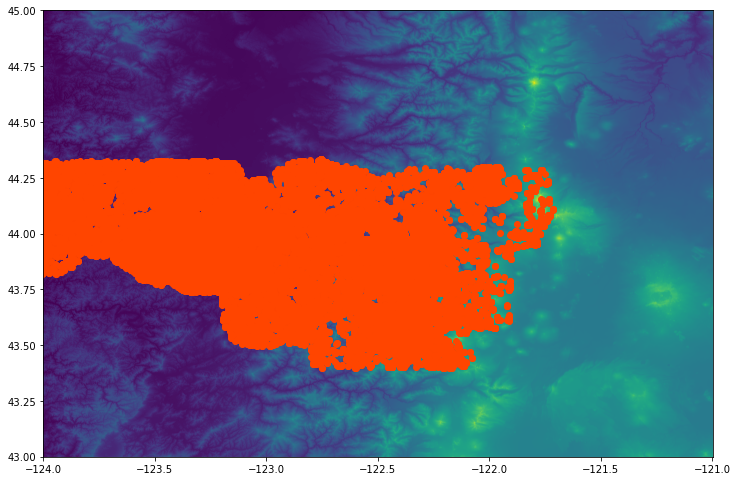

In [457]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
strava_slope_new.boundary.plot(ax=ax, color='orangered')
show(eu, ax=ax)

In [458]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry   start_lon  start_lat
0  5230417.0  POINT (-123.40767 44.31230) -123.407673  44.312296
1  5230636.0  POINT (-123.48192 44.31385) -123.481918  44.313851
2  5230636.0  POINT (-123.48675 44.31004) -123.486746  44.310035
3  5230636.0  POINT (-123.49383 44.31036) -123.493833  44.310361
4  5230683.0  POINT (-123.45510 44.30621) -123.455098  44.306211

In [459]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [460]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

OSM_ID                     geometry     end_lon    end_lat
0  5230417.0  POINT (-123.40795 44.31303) -123.407953  44.313026
1  5230636.0  POINT (-123.48675 44.31004) -123.486746  44.310035
2  5230636.0  POINT (-123.49383 44.31036) -123.493833  44.310361
3  5230636.0  POINT (-123.49898 44.31349) -123.498977  44.313494
4  5230683.0  POINT (-123.45436 44.30727) -123.454359  44.307271

In [461]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [462]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

OSM_ID   start_lon  start_lat  starting_ele
0  5230417.0 -123.407673  44.312296    118.542374
1  5230636.0 -123.481918  44.313851    261.173798
2  5230636.0 -123.486746  44.310035    285.294647
3  5230636.0 -123.493833  44.310361    329.101166
4  5230683.0 -123.455098  44.306211    311.390869

In [463]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID     end_lon    end_lat  ending_ele
0  5230417.0 -123.407953  44.313026  116.813477
1  5230636.0 -123.486746  44.310035  285.294647
2  5230636.0 -123.493833  44.310361  329.101166
3  5230636.0 -123.498977  44.313494  388.837860
4  5230683.0 -123.454359  44.307271  342.645752

In [464]:
strava_slope_new=strava_slope_new.loc[:, ['OSM_ID',"geometry","length"]]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [465]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')

In [466]:
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['OSM_ID'], keep='first')
strava_all1.head()

OSM_ID                                           geometry      length  \
0   5230417.0  LINESTRING (-123.40767 44.31230, -123.40783 44...   86.384552   
1   5230636.0  LINESTRING (-123.48192 44.31385, -123.48262 44...  601.268445   
28  5230683.0  LINESTRING (-123.45510 44.30621, -123.45358 44...  229.435724   
92  5230995.0  LINESTRING (-123.53897 44.28145, -123.53907 44...   90.731357   
93  5231024.0  LINESTRING (-123.56317 44.28134, -123.56321 44...  899.360901   

     start_lon  start_lat  starting_ele     end_lon    end_lat  ending_ele  \
0  -123.407673  44.312296    118.542374 -123.407953  44.313026  116.813477   
1  -123.481918  44.313851    261.173798 -123.486746  44.310035  285.294647   
28 -123.455098  44.306211    311.390869 -123.454359  44.307271  342.645752   
92 -123.538971  44.281453    788.072815 -123.539390  44.282212  784.888611   
93 -123.563166  44.281342    898.988831 -123.556063  44.286024  924.527893   

        slope  
0    2.001396  
1    4.011661  
28  13.622501  
92   3.509486  
93   2.839690

In [467]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [468]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=2839)
strava_all2_slope.head(10)

OSM_ID                                           geometry  \
0    5230417.0  LINESTRING (1268038.716 297932.673, 1268027.00...   
1    5230636.0  LINESTRING (1262124.390 298313.524, 1262068.32...   
28   5230683.0  LINESTRING (1264233.051 297389.304, 1264358.40...   
92   5230995.0  LINESTRING (1257444.504 294879.272, 1257437.34...   
93   5231024.0  LINESTRING (1255513.818 294937.197, 1255511.09...   
120  5231260.0  LINESTRING (1276931.301 297132.486, 1276980.72...   
128  5231304.0  LINESTRING (1256225.681 294906.961, 1256113.07...   
129  5231335.0  LINESTRING (1282267.785 299031.498, 1282267.60...   
130  5231464.0  LINESTRING (1270029.643 298738.812, 1270013.80...   
157  5231468.0  LINESTRING (1267225.419 298378.514, 1267197.43...   

          length   start_lon  start_lat  starting_ele     end_lon    end_lat  \
0      86.384552 -123.407673  44.312296    118.542374 -123.407953  44.313026   
1     601.268445 -123.481918  44.313851    261.173798 -123.486746  44.310035   
28    229.435724 -123.455098  44.306211    311.390869 -123.454359  44.307271   
92     90.731357 -123.538971  44.281453    788.072815 -123.539390  44.282212   
93    899.360901 -123.563166  44.281342    898.988831 -123.556063  44.286024   
120   614.315805 -123.295952  44.307824     90.051376 -123.289915  44.304404   
128   800.879395 -123.554241  44.281304    826.771667 -123.561206  44.281481   
129   259.953408 -123.229888  44.326487     86.116066 -123.229784  44.324149   
130  1477.761040 -123.383084  44.320165    103.305534 -123.386890  44.311475   
157  1459.806570 -123.418054  44.316051    141.171402 -123.431190  44.312779   

     ending_ele      slope  
0    116.813477   2.001396  
1    285.294647   4.011661  
28   342.645752  13.622501  
92   784.888611   3.509486  
93   924.527893   2.839690  
120   98.037376   1.299983  
128  803.648743   2.887192  
129   86.759888   0.247668  
130  125.151497   1.478315  
157  221.535873   5.505145

In [469]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=bridge_only, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge
0      5453222.0       0
1      5480007.0       0
2      5482102.0       0
3      5483853.0       0
4      5485472.0       0

In [470]:
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [471]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)

geometry     slope  \
283837   LINESTRING (1298113.708 267664.291, 1298115.48...  0.346132   
2186157  LINESTRING (1298000.967 267375.521, 1298003.59...  0.091084   
2367616  LINESTRING (1298000.967 267375.521, 1297998.42...  0.114830   
4299004  LINESTRING (1297911.581 267622.287, 1297982.58...  0.571697   
4316541  LINESTRING (1298009.214 267570.334, 1298109.58...  0.209109   

         index_right  osm_id_sensor  
283837           174      5490868.0  
2186157          174      5490868.0  
2367616          174      5490868.0  
4299004          174      5490868.0  
4316541          174      5490868.0

In [472]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0      5453222.0       0  LINESTRING (1298113.708 267664.291, 1298115.48...   
1      5453222.0       0  LINESTRING (1298020.410 267863.372, 1298112.85...   
2      5453222.0       0  LINESTRING (1297911.581 267622.287, 1297982.58...   
3      5453222.0       0  LINESTRING (1298009.214 267570.334, 1298109.58...   
4      5453222.0       0  LINESTRING (1298109.585 267566.712, 1298160.28...   

      slope  index_right  
0  0.346132          181  
1  0.261351          181  
2  0.571697          181  
3  0.209109          181  
4  0.206202          181

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

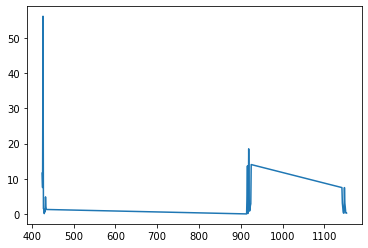

In [473]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

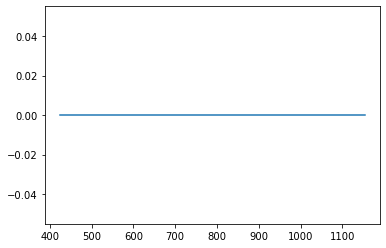

In [474]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [475]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0      5453222.0       0  LINESTRING (1298113.708 267664.291, 1298115.48...   
1      5453222.0       0  LINESTRING (1298020.410 267863.372, 1298112.85...   
2      5453222.0       0  LINESTRING (1297911.581 267622.287, 1297982.58...   
3      5453222.0       0  LINESTRING (1298009.214 267570.334, 1298109.58...   
4      5453222.0       0  LINESTRING (1298109.585 267566.712, 1298160.28...   

      slope  index_right  
0  0.346132          181  
1  0.261351          181  
2  0.571697          181  
3  0.209109          181  
4  0.206202          181

In [476]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
425     77347777.0       1  LINESTRING (1293936.156 267984.864, 1293943.68...   
426     77347777.0       1  LINESTRING (1293950.235 267987.744, 1293944.98...   
427     77347777.0       1  LINESTRING (1293936.217 268009.563, 1293934.40...   
428     77347777.0       1  LINESTRING (1294009.587 268202.541, 1293999.20...   
429     77347777.0       1  LINESTRING (1293939.008 267933.895, 1293950.36...   

     slope  index_right  
425    0.0           48  
426    0.0           48  
427    0.0           48  
428    0.0           48  
429    0.0           48

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

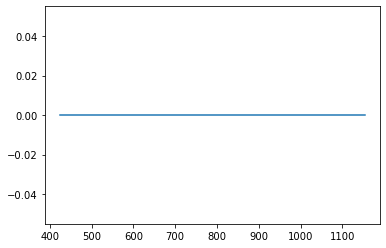

In [477]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [478]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0  5453222.0  0.318898
1  5480007.0  0.407798
2  5482102.0  0.641017
3  5483853.0  1.021927
4  5485472.0  0.666242

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [479]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [480]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [481]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [482]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [483]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [484]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [485]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [486]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/portland/KPDX/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [487]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/eugene_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        30.6        26       32     27.9       24       96     89.9       73   
1        30.4         0       38     26.3        0      100     76.8        0   
2        47.0        43       39     36.9       35       80     68.9       45   
3        45.4        41       44     41.3       38       97     86.0       68   
4        42.3        39       42     39.6       38       97     90.3       68   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      40.6        34       40     37.0       32       93     87.1       77   
361      37.8        32       42     35.7       30      100     92.6       74   
362      42.2        35       43     39.7       33      100     91.5       86   
363      43.8        40       41     39.3       37       93     84.2       68   
364      46.9        39       47     42.4       37       93     84.6       64   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0           6       2.6         0      30.1      30.0      29.9   
1          13       4.1         0      29.9      29.9      29.8   
2          10       7.5         5      29.8      29.6      29.5   
3          12       4.1         0      29.6      29.4      29.4   
4          28       4.7         0      29.4      29.1      28.8   
..        ...       ...       ...       ...       ...       ...   
360        13       6.8         0      29.9      29.8      29.7   
361         6       2.3         0      29.9      29.8      29.7   
362         8       4.6         0      29.8      29.7      29.6   
363         9       4.8         0      30.0      29.9      29.9   
364        18       9.6         0      29.9      29.8      29.6   

     Precipitation        Date  
0             0.00    2019-1-1  
1             0.00    2019-1-2  
2             0.00    2019-1-3  
3             0.00    2019-1-4  
4             0.01    2019-1-5  
..             ...         ...  
360           0.01  2019-12-27  
361           0.00  2019-12-28  
362           0.00  2019-12-29  
363           0.04  2019-12-30  
364           0.00  2019-12-31  

[365 rows x 16 columns]

In [488]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0        30.6     89.9           0.00
1        30.4     76.8           0.00
2        47.0     68.9           0.00
3        45.4     86.0           0.00
4        42.3     90.3           0.01
..        ...      ...            ...
360      40.6     87.1           0.01
361      37.8     92.6           0.00
362      42.2     91.5           0.00
363      43.8     84.2           0.04
364      46.9     84.6           0.00

[365 rows x 3 columns]

In [489]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [490]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [491]:
output_weather2.isnull().values.any()

False

In [492]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         52.194247
Hum_avg          75.815616
Precipitation     0.099863
dtype: float64

# Aggregate all output together in a dataframe

In [495]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_origin,output_destination,output_odl,output_bikecom,output_lane,output_intersection_density1a,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope,output_odl_gps]

In [496]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')

In [497]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

In [498]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822   
1   618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
65  106993273.0  P003EUG   permanent  330.297326  10.383562   4.863014   
66  107098076.0  P004EUG   permanent  429.732467  19.589041   7.342466   
67  680124010.0  P005EUG   permanent  410.282143   6.972603   4.479452   

    stl_raw  Bike Share Origin  Bike Share Destination  Bike Share Crossing  \
0     985.0                NaN                     2.0                 14.0   
1     203.0                NaN                     NaN                  4.0   
65   2766.0                1.0                     1.0                 30.0   
66   1233.0                4.0                     4.0                 13.0   
67   2154.0             1174.0                  1129.0              16966.0   

    ...  Median_HH_income   HH_density  population_density  \
0   ...      29005.067058  5573.089529        11866.970658   
1   ...      32432.011121  1169.450292         2537.498917   
65  ...      23558.525671  1053.636132         4676.108072   
66  ...      23526.000000   805.855181         1215.201087   
67  ...      11904.699650  5307.381943        13267.719362   

    employment_density Number of jobs     slope  Bike Share route   Temp_avg  \
0          8770.072904      22.710117  1.737349             134.0  52.194247   
1          2189.770563      29.699550  0.000000              38.0  52.194247   
65         4505.926451      10.844541  5.405463            1084.0  52.194247   
66         1139.607592     200.921896  1.003565            2999.0  52.194247   
67        12660.571302      33.622310  2.612067           31699.0  52.194247   

     Hum_avg   Precipitation  
0   75.815616       0.099863  
1   75.815616       0.099863  
65  75.815616       0.099863  
66  75.815616       0.099863  
67  75.815616       0.099863  

[5 rows x 89 columns]

In [499]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_2019_updated_Eugene_0.1_mile_network_buffer_data.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [500]:
# Make dynamic visualization
#!pip install keplergl

In [501]:
ecoshort.head(5)

site_id                                    site_name sensor_type  year  \
0   P001EUG             Fern Ridge Path west of Chambers   permanent  2019   
7   P002EUG                  Millrace Path @ Booth Kelly   permanent  2019   
14  P003EUG  Southbank Path west of Knickerbocker Bridge   permanent  2019   
21  P004EUG     North Bank Path south of Greenway Bridge   permanent  2019   
28  P005EUG                      Alder north of 18th Ave   permanent  2019   

    region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   Eugene             2.0  513.408379  12.575342   3.780822    985.0  ...   
7   Eugene             3.0  109.807738   7.780822   2.397260    203.0  ...   
14  Eugene             2.0  330.297326  10.383562   4.863014   2766.0  ...   
21  Eugene             3.0  429.732467  19.589041   7.342466   1233.0  ...   
28  Eugene             1.0  410.282143   6.972603   4.479452   2154.0  ...   

    osm_id_sensor  buff_dist                        geometry  \
0     123498508.0        2.0  POINT (1290079.275 267211.026)   
7     618082822.0        2.0  POINT (1298418.325 267111.279)   
14    106993273.0        2.0  POINT (1295432.562 267262.083)   
21    107098076.0        2.0  POINT (1290859.454 270021.192)   
28    680124010.0        2.0  POINT (1293225.340 266892.292)   

    min_dist_to_school min_dist_to_college min_dist_to_university  lanes  \
0           628.532553         6934.212066           10591.197533      2   
7           879.755548        20933.140361           13217.559590      2   
14         5010.229468        11170.247924            4992.440022      2   
21         2793.158332         8094.508350           10941.097886      2   
28         1869.438425         4950.178177            1647.205849      1   

    maxspeed  min_dist_to_polygon min_dist_to_CBD  
0       30.0          1071.746883     8356.878045  
7       30.0          2107.377509    19881.232680  
14      35.0          2848.313741    10214.560298  
21      25.0          3262.795673     8057.748919  
28      20.0           406.212518     4845.477002  

[5 rows x 23 columns]

In [502]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [503]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2839")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D.head()

osm_id_sensor                     geometry
0     123498508.0  POINT (-123.11953 44.04252)
7     618082822.0  POINT (-123.01550 44.04392)
14    106993273.0  POINT (-123.05279 44.04446)
21    107098076.0  POINT (-123.11090 44.06801)
28    680124010.0  POINT (-123.08018 44.04053)

In [504]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         Lon        Lat
0     123498508.0 -123.119532  44.042515
7     618082822.0 -123.015499  44.043919
14    106993273.0 -123.052792  44.044462
21    107098076.0 -123.110896  44.068013
28    680124010.0 -123.080176  44.040527

In [505]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [506]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2839")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:2839


osm_id_sensor         Lon        Lat  \
0    123498508.0 -123.119532  44.042515   
1    618082822.0 -123.015499  44.043919   
2    618082822.0 -123.015499  44.043919   
3    106993273.0 -123.052792  44.044462   
4    107098076.0 -123.110896  44.068013   

                                            geometry  
0  POLYGON ((-123.11821 44.04291, -123.11819 44.0...  
1  POLYGON ((-123.01617 44.04346, -123.01617 44.0...  
2  POLYGON ((-123.01617 44.04346, -123.01617 44.0...  
3  POLYGON ((-123.05165 44.04475, -123.05158 44.0...  
4  POLYGON ((-123.10946 44.06798, -123.10943 44.0...

In [507]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822   
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
2  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
3  618082822.0  S088EUG  short-term  111.398166   7.780822   2.397260   
4  618082822.0  S088EUG  short-term  111.398166   7.780822   2.397260   

   stl_raw  Bike Share Origin  Bike Share Destination  Bike Share Crossing  \
0    985.0                NaN                     2.0                 14.0   
1    203.0                NaN                     NaN                  4.0   
2    203.0                NaN                     NaN                  4.0   
3    203.0                NaN                     NaN                  4.0   
4    203.0                NaN                     NaN                  4.0   

   ...  Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0  ...       22.710117  1.737349             134.0  52.194247  75.815616   
1  ...       29.699550  0.000000              38.0  52.194247  75.815616   
2  ...       29.699550  0.000000              38.0  52.194247  75.815616   
3  ...       29.699550  0.000000              38.0  52.194247  75.815616   
4  ...       29.699550  0.000000              38.0  52.194247  75.815616   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.099863    123498508.0 -123.119532  44.042515   
1       0.099863    618082822.0 -123.015499  44.043919   
2       0.099863    618082822.0 -123.015499  44.043919   
3       0.099863    618082822.0 -123.015499  44.043919   
4       0.099863    618082822.0 -123.015499  44.043919   

                                            geometry  
0  POLYGON ((-123.11821 44.04291, -123.11819 44.0...  
1  POLYGON ((-123.01617 44.04346, -123.01617 44.0...  
2  POLYGON ((-123.01617 44.04346, -123.01617 44.0...  
3  POLYGON ((-123.01617 44.04346, -123.01617 44.0...  
4  POLYGON ((-123.01617 44.04346, -123.01617 44.0...  

[5 rows x 93 columns]

In [508]:
#buffer_vis=gdf1.loc[:,['osm_id_sensor','geometry']]
#buffer_vis.columns=['osm_id','geometry']
#buffer_vis

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [509]:
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_2019_Network_buffer_0.1_mile_eco_short_Eugene.csv', sep=',', na_rep='0', index=False)


In [510]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [511]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [512]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [513]:
#df_dynamic1.dtypes

In [514]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [515]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Eugene/Eugene Portland/keplergl_2019_Network_buffer_0.1_mile_eco_short_Eugene.csv")
data=data.fillna(0)
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   1234985…

In [516]:
data.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0  123498508.0  P001EUG   permanent  513.408379  12.575342   3.780822   
1  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
2  618082822.0  P002EUG   permanent  109.807738   7.780822   2.397260   
3  618082822.0  S088EUG  short-term  111.398166   7.780822   2.397260   
4  618082822.0  S088EUG  short-term  111.398166   7.780822   2.397260   

   stl_raw  Bike Share Origin  Bike Share Destination  Bike Share Crossing  \
0    985.0                0.0                     2.0                 14.0   
1    203.0                0.0                     0.0                  4.0   
2    203.0                0.0                     0.0                  4.0   
3    203.0                0.0                     0.0                  4.0   
4    203.0                0.0                     0.0                  4.0   

   ...  Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0  ...       22.710117  1.737349             134.0  52.194247  75.815616   
1  ...       29.699550  0.000000              38.0  52.194247  75.815616   
2  ...       29.699550  0.000000              38.0  52.194247  75.815616   
3  ...       29.699550  0.000000              38.0  52.194247  75.815616   
4  ...       29.699550  0.000000              38.0  52.194247  75.815616   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.099863    123498508.0 -123.119532  44.042515   
1       0.099863    618082822.0 -123.015499  44.043919   
2       0.099863    618082822.0 -123.015499  44.043919   
3       0.099863    618082822.0 -123.015499  44.043919   
4       0.099863    618082822.0 -123.015499  44.043919   

                                            geometry  
0  POLYGON ((-123.1182149742504 44.04290916085051...  
1  POLYGON ((-123.0161744671217 44.04345968725881...  
2  POLYGON ((-123.0161744671217 44.04345968725881...  
3  POLYGON ((-123.0161744671217 44.04345968725881...  
4  POLYGON ((-123.0161744671217 44.04345968725881...  

[5 rows x 93 columns]

In [517]:
# save as htm file
map_2.save_to_html(file_name="Eco_short_2019_Eugene_0.1_mile_network_buffer.html")

Map saved to Eco_short_2019_Eugene_0.1_mile_network_buffer.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [518]:
#conda list ipython

In [519]:
end = time.time()
print("Tune Fit Time:", end - start)

Tune Fit Time: 2297.6532583236694


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT